In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# display figure in notebook
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import math
#import sys
#import scipy.integrate
import scipy.optimize
import scipy.stats
import random
import pandas as pd

plt.style.use('ggplot') # use ggplot style for graps

In [4]:
# Define input data

# define generations
gen_number_WT = [0,0]
#gen_number_WT = [-0.0057,-0.0057]


WT_headings = ['wt_f3_1',
                'wt_f4_1']

met1_headings = ['met1_f3_1'] # no gen-number as this is steady state value

h1_headings = ['h1_f4_1']

gen_number_ddm1 = [1, 2, 3, 3, 4]
gen_number_WTddm1 = gen_number_WT + gen_number_ddm1
ddm1_headings = ['ddm1_f2_1',
                'ddm1_f3_1',
                'ddm1_f4_1',
                'ddm1_f4_2',
                'ddm1_f5_1']
WTddm1_headings = WT_headings + ddm1_headings

gen_number_h1ddm1cmt2 = [1,2,2,3,3,3,4,4,4,5,5,6,6]
gen_number_WTh1ddm1cmt2 = gen_number_WT + gen_number_h1ddm1cmt2
h1ddm1cmt2_headings = ['h1ddm1cmt2_f2_1',
                    'h1ddm1cmt2_f3_1',
                    'h1ddm1cmt2_f3_2',
                    'h1ddm1cmt2_f4_1',
                    'h1ddm1cmt2_f4_2',
                    'h1ddm1cmt2_f4_3',
                    'h1ddm1cmt2_f5_1',
                    'h1ddm1cmt2_f5_2',
                    'h1ddm1cmt2_f5_3',
                    'h1ddm1cmt2_f6_1',
                    'h1ddm1cmt2_f6_2',
                    'h1ddm1cmt2_f7_1',
                    'h1ddm1cmt2_f7_2']
WTh1ddm1cmt2_headings = WT_headings + h1ddm1cmt2_headings

gen_number_h1ddm1cmt3 = [2,3,3,3,4,4,5,5,6,6]
gen_number_WTh1ddm1cmt3 = gen_number_WT + gen_number_h1ddm1cmt3
h1ddm1cmt3_headings = ['h1ddm1cmt3_f3_1',
                'h1ddm1cmt3_f4_1',
                'h1ddm1cmt3_f4_2',
                'h1ddm1cmt3_f4_3',
                'h1ddm1cmt3_f5_1',
                'h1ddm1cmt3_f5_2',
                'h1ddm1cmt3_f6_1',
                'h1ddm1cmt3_f6_2',
                'h1ddm1cmt3_f7_1',
                'h1ddm1cmt3_f7_2']
WTh1ddm1cmt3_headings = WT_headings + h1ddm1cmt3_headings


gen_number_h1ddm1drm2 = [1,2,2,3,3,4,4,5,5,6,6]
gen_number_WTh1ddm1drm2 = gen_number_WT + gen_number_h1ddm1drm2
h1ddm1drm2_headings = ['h1ddm1drm2_f2_1',
                        'h1ddm1drm2_f3_1',
                        'h1ddm1drm2_f3_2',
                        'h1ddm1drm2_f4_1',
                        'h1ddm1drm2_f4_2',
                        'h1ddm1drm2_f5_1',
                        'h1ddm1drm2_f5_2',
                        'h1ddm1drm2_f6_1',
                        'h1ddm1drm2_f6_2',
                        'h1ddm1drm2_f7_1',
                        'h1ddm1drm2_f7_2']
WTh1ddm1drm2_headings = WT_headings + h1ddm1drm2_headings


gen_number_h1ddm1 = [1,1,2,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,10,10]
gen_number_WTh1ddm1 = gen_number_WT + gen_number_h1ddm1
h1ddm1_headings = ['h1ddm1_f2_1',
                    'h1ddm1_f2_2',
                    'h1ddm1_f3_1',
                    'h1ddm1_f3_2',
                    'h1ddm1_f3_3',
                    'h1ddm1_f4_1',
                    'h1ddm1_f4_2',
                    'h1ddm1_f5_1',
                    'h1ddm1_f5_2',
                    'h1ddm1_f6_1',
                    'h1ddm1_f6_2',
                    'h1ddm1_f7_1',
                    'h1ddm1_f7_2',
                    'h1ddm1_f8_1',
                    'h1ddm1_f8_2',
                    'h1ddm1_f9_1',
                    'h1ddm1_f9_2',
                    'h1ddm1_f10_1',
                    'h1ddm1_f11_1',
                    'h1ddm1_f11_2']
WTh1ddm1_headings = WT_headings + h1ddm1_headings

All_headings = ['ID'] + WT_headings + h1ddm1cmt2_headings + h1ddm1cmt3_headings + h1ddm1drm2_headings + h1ddm1_headings+met1_headings

#define number of cell cycles per generation
n_cc = 34

In [5]:
# check correct number of columns:
print(len(WT_headings + met1_headings + h1ddm1cmt2_headings + h1ddm1cmt3_headings +
          h1ddm1drm2_headings + h1ddm1_headings)+1)
print(len(All_headings))

58
58


In [6]:
# read in datafiles
# mcg_data.txt
# lenth_data.txt
# coverage_data.txt

data_type = 'TEs with length > 2000bp'

TE_mcg_data_df = pd.read_csv('mcg_gt2000bp_data.txt', sep='\t', engine='python',usecols=All_headings)
TE_mcg_data_df = TE_mcg_data_df.set_index('ID')

##TE_coverage_data_df = pd.read_csv('coverage_data.txt', sep='\t', engine='python',usecols=All_headings+['length'])
##TE_coverage_data_df = TE_coverage_data_df.set_index('ID')


#print(TE_mcg_data_df.head())
#print(TE_coverage_data_df.head())
print(len(TE_mcg_data_df))

1910


1910


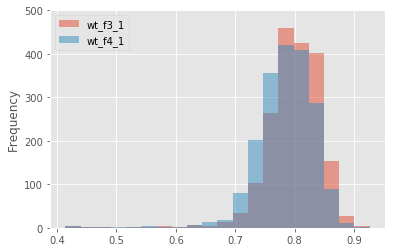

In [7]:
ax = TE_mcg_data_df.filter(["ID"]+WT_headings,axis=1).plot.hist(bins=20, alpha=0.5,ylim=(0,500))
print(len(TE_mcg_data_df.filter(["ID"]+WT_headings,axis=1)))

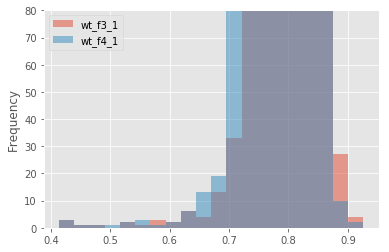

In [8]:
ax = TE_mcg_data_df.filter(["ID"]+WT_headings,axis=1).plot.hist(bins=20, alpha=0.5,ylim=(0,80))

In [9]:
WT_threshold = 0.65

#print(len(TE_mcg_data_df.loc[(TE_mcg_data_df['wt_f3_1'] > WT_threshold) &  (TE_mcg_data_df['wt_f4_1'] > WT_threshold)]))
#print(TE_mcg_data_df.loc[(TE_mcg_data_df['wt_f3_1'] < WT_threshold) |  (TE_mcg_data_df['wt_f4_1'] < WT_threshold)])

TE_mcg_data_df = TE_mcg_data_df.loc[(TE_mcg_data_df['wt_f3_1'] > WT_threshold) &  (TE_mcg_data_df['wt_f4_1'] > WT_threshold)]
print(len(TE_mcg_data_df))
print(1910 - len(TE_mcg_data_df))

1883
27


In [10]:
# make data frame of individual mutants 

TE_all_WT_df = TE_mcg_data_df.filter(["ID"]+WT_headings,axis=1)
Mean_WT_df = TE_all_WT_df.mean(axis=0).to_frame()
Mean_WT_df = Mean_WT_df.rename(columns={0:'mean_meth'})
Mean_WT_df = Mean_WT_df.T

TE_all_h1ddm1cmt2_df = TE_mcg_data_df.filter(["ID"]+h1ddm1cmt2_headings,axis=1)
TE_all_WTh1ddm1cmt2_df = TE_mcg_data_df.filter(["ID"]+WTh1ddm1cmt2_headings,axis=1)

TE_all_h1ddm1cmt3_df = TE_mcg_data_df.filter(["ID"]+h1ddm1cmt3_headings,axis=1)
TE_all_WTh1ddm1cmt3_df = TE_mcg_data_df.filter(["ID"]+WTh1ddm1cmt3_headings,axis=1)


TE_all_h1ddm1drm2_df = TE_mcg_data_df.filter(["ID"]+h1ddm1drm2_headings,axis=1)
TE_all_WTh1ddm1drm2_df = TE_mcg_data_df.filter(["ID"]+WTh1ddm1drm2_headings,axis=1)


TE_all_h1ddm1_df = TE_mcg_data_df.filter(["ID"]+h1ddm1_headings,axis=1)
TE_all_WTh1ddm1_df = TE_mcg_data_df.filter(["ID"]+WTh1ddm1_headings,axis=1)


TE_all_met1_df = TE_mcg_data_df.filter(["ID"]+met1_headings,axis=1)

#print(TE_all_h1ddm1_df.head())
#print(TE_all_WTh1ddm1_df.head())

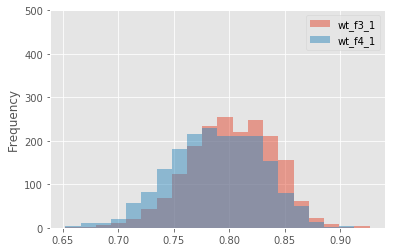

In [11]:
ax = TE_all_WT_df.plot.hist(bins=20, alpha=0.5,ylim=(0,500))

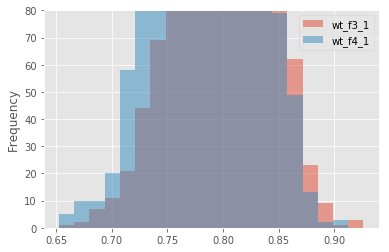

In [12]:
ax = TE_all_WT_df.plot.hist(bins=20, alpha=0.5,ylim=(0,80))

In [13]:
print(TE_all_met1_df.head())

            met1_f3_1
ID                   
AT1TE08240   0.021004
AT1TE09080   0.004603
AT1TE12295   0.003147
AT1TE14085   0.000000
AT1TE15170   0.013825


In [14]:
# define exponential function to fit to. 
def exp_func(x_, M_0_, B_, M_star_):
    return (M_0_ - M_star_ )* np.exp(-B_ * x_) + M_star_

# function to perform fit for an individual TE
# asume initial guesses of
# M_0 = 0.8
# B = 1
# M_star = 0.3
# Constrain 0 < M_0 < 1
# Constrain B > 0
# Constrain 0 < M_star < 1
def func_exp_fit(gen_number_, M_x_):

    fit_params_, fit_cov_ = scipy.optimize.curve_fit(exp_func,gen_number_,M_x_, p0 = [0.8,1.0,0.3],
                                                     bounds=([0.,0.,0.], [1., np.inf, 1.]))
    
    
    fit_params_err_ = np.sqrt(np.diag(fit_cov_))
    fit_params_cov_ = [fit_cov_[0,1], fit_cov_[0,2], fit_cov_[1,2] ] # sigma_{M_0 B}, sigma_{M_0 M_star}, sigma_{B M_star}
    
    M_0_fit_ = fit_params_[0]
    B_fit_ = fit_params_[1]
    M_star_fit_ = fit_params_[2]
    M_0_fit_err_ = fit_params_err_[0]
    B_fit_err_ = fit_params_err_[1]
    M_star_fit_err_ = fit_params_err_[2]
    B_M_star_cov_ = fit_params_cov_[2]
    
    return M_0_fit_, B_fit_, M_star_fit_, M_0_fit_err_, B_fit_err_, M_star_fit_err_, B_M_star_cov_, fit_cov_


In [15]:
# Estimate overal error of fit
def tot_err_est(M_0_, M_0_err_, B_, B_err_, M_star_, M_star_err_):
    val_out_ = (M_0_err_)**2 + (B_err_)**2 + (M_star_err_)**2
    return val_out_ 

# Function to catogorise TE fits according to overall error size
def assign_err_size(row_):
    if row_['B_fit'] > n_cc:
        print(row_)
        return np.inf
    elif row_['tot_err_est'] >= 1000:
        return 1000
    elif row_['tot_err_est'] >= 100:
        return 100
    elif row_['tot_err_est'] >= 10:
        return 10
    elif row_['tot_err_est'] >= 1:
        return 1
    elif row_['tot_err_est'] < 1 and row_['tot_err_est'] > 0:
        return 0
    else:
        return 'assign_err_size ERROR'

In [16]:
#function to cal error in \delta and \epsilon fits

def delta_epsilon_errors(n_cc_, B_, M_star_, B_err_, M_star_err_, B_M_star_cov_):
    
    delta_err_ = (2.*B_*M_star_/n_cc_)*np.sqrt( (B_err_/B_)**2 + (M_star_err_/M_star_)**2 
                                                       + 2.*B_M_star_cov_/(B_*M_star_) )
    
    epsilon_err_ = (2.*B_*(1.-M_star_)/n_cc_)*np.sqrt( (B_err_/B_)**2 + (M_star_err_/(1.-M_star_))**2 
                                                       - 2.*B_M_star_cov_/(B_*(1.-M_star_)) )
    
    d_plus_e_err_ = (2./n_cc_)*B_err_
    
    
    return delta_err_, epsilon_err_ , d_plus_e_err_

In [17]:
# function to infer effective timepoint for WT samples, 
# using observed WT methylaiton level (M_WT_), 
# and fitted values of M_0_ and M_star_ using average over all TEs 
def cacl_Mean_WT_xval(M_WT_, M_0_, B_, M_star_, Mean_mutant_fit_cov_matrix_, n_cc_):
    
    M_0_ = np.float64(M_0_); B_ = np.float64(B_); M_star_ = np.float64(M_star_)
    
    M_WT_ = np.float64(M_WT_); n_cc_ = np.float64(n_cc_)
    
    Mean_WT_mutant_xval_ = (1./B_)*np.log( (M_0_ - M_star_)/(M_WT_ - M_star_) )
    
    Mean_WT_mutant_ncc_val_ = n_cc_*Mean_WT_mutant_xval_
    
    df_dM_0_ = (1./B_)*(1/(M_0_ - M_star_))
    
    df_dB_ = (1./B_**2)*np.log( (M_WT_-M_star_)/(M_0_-M_star_) )
    
    df_dM_star_ = (1./B_)*(M_0_-M_WT_)/((M_WT_-M_star_)*(M_0_-M_star_))
    
    df_vector_ = np.array([df_dM_0_, df_dB_, df_dM_star_])
    
    f_err_sq_ = np.dot(df_vector_, np.dot( Mean_mutant_fit_cov_matrix_, np.transpose(df_vector_) ) )
    
    Mean_WT_mutant_xval_err_ = np.sqrt(f_err_sq_)
    
    Mean_WT_mutant_ncc_val_err_ = n_cc_*Mean_WT_mutant_xval_err_
        
    return Mean_WT_mutant_xval_, Mean_WT_mutant_ncc_val_, Mean_WT_mutant_xval_err_, Mean_WT_mutant_ncc_val_err_

In [18]:
# function to infer effective timepoint for WT samples, 
# for inidividual TE fits,
# using observed WT methylaiton level (M_WT_) from wt_f3_1 sample  
# and fitted values of M_0_ and M_star_ 
def cacl_IndividualTE_WT1_xval(row_):
    
    M_0_ = np.float64(row_['M_0_fit']); B_ = np.float64(row_['B_fit']); M_star_ = np.float64(row_['M_star_fit'])

    M_WT_ = np.float64( TE_all_WT_df.loc[ row_.name, 'wt_f3_1' ] )

    n_cc_ = np.float64(n_cc)
    
    WT_mutant_xval_ = (1./B_)*np.log( (M_0_ - M_star_)/(M_WT_ - M_star_) )
    
    if ((M_0_ - M_star_)/(M_WT_ - M_star_) < 0) or WT_mutant_xval_ == np.nan:
        print(row_.name, M_0_, M_star_, M_WT_, M_star_, (M_0_ - M_star_),  (M_WT_ - M_star_))
        
    return WT_mutant_xval_

In [19]:
# function to infer effective timepoint for WT samples, 
# for inidividual TE fits,
# using observed WT methylaiton level (M_WT_) from wt_f4_1 sample  
# and fitted values of M_0_ and M_star_ 
def cacl_IndividualTE_WT2_xval(row_):
    M_0_ = np.float64(row_['M_0_fit']); B_ = np.float64(row_['B_fit']); M_star_ = np.float64(row_['M_star_fit'])
    
    M_WT_ = np.float64( TE_all_WT_df.loc[ row_.name, 'wt_f4_1' ] )

    n_cc_ = np.float64(n_cc)
    
    WT_mutant_xval_ = (1./B_)*np.log( (M_0_ - M_star_)/(M_WT_ - M_star_) )
    
    if ((M_0_ - M_star_)/(M_WT_ - M_star_) < 0) or WT_mutant_xval_ == np.nan:
        print(row_.name, M_0_, M_star_, M_WT_, M_star_, (M_0_ - M_star_),  (M_WT_ - M_star_))
        
    return WT_mutant_xval_

In [20]:
# estimate expected error in infered effectivie WT timepoint, from wt_f3_1 sample,
# for inidividual TE fits
def cacl_IndividualTE_WT1_xval_err(row_):
    M_0_ = np.float64(row_['M_0_fit']); B_ = np.float64(row_['B_fit']); M_star_ = np.float64(row_['M_star_fit'])

    M_WT_ = np.float64( TE_all_WT_df.loc[ row_.name, 'wt_f3_1' ] )

    mutant_fit_cov_matrix_ = [[row_['M_0_fit_err']**2,row_['M_0_B_cov'],row_['M_star_M_0_cov']],
                              [row_['M_0_B_cov'],row_['B_fit_err']**2,row_['B_M_star_cov']],
                              [row_['M_star_M_0_cov'],row_['B_M_star_cov'],row_['M_star_fit_err']**2]]
    
    n_cc_ = np.float64(n_cc)
    
    df_dM_0_ = (1./B_)*(1/(M_0_ - M_star_))
    
    df_dB_ = (1./B_**2)*np.log( (M_WT_-M_star_)/(M_0_-M_star_) )
    
    df_dM_star_ = (1./B_)*(M_0_-M_WT_)/((M_WT_-M_star_)*(M_0_-M_star_))
    
    df_vector_ = np.array([df_dM_0_, df_dB_, df_dM_star_])
    
    f_err_sq_ = np.dot(df_vector_, np.dot( mutant_fit_cov_matrix_, np.transpose(df_vector_) ) )
    
    WT_mutant_xval_err_ = np.sqrt(f_err_sq_)
    
        
    return WT_mutant_xval_err_

In [21]:
# estimate expected error in infered effectivie WT timepoint, from wt_f4_1 sample,
# for inidividual TE fits
def cacl_IndividualTE_WT2_xval_err(row_):
    M_0_ = np.float64(row_['M_0_fit']); B_ = np.float64(row_['B_fit']); M_star_ = np.float64(row_['M_star_fit'])
    
    M_WT_ = np.float64( TE_all_WT_df.loc[ row_.name, 'wt_f4_1' ] )

    mutant_fit_cov_matrix_ = [[row_['M_0_fit_err']**2,row_['M_0_B_cov'],row_['M_star_M_0_cov']],
                              [row_['M_0_B_cov'],row_['B_fit_err']**2,row_['B_M_star_cov']],
                              [row_['M_star_M_0_cov'],row_['B_M_star_cov'],row_['M_star_fit_err']**2]]
    
    n_cc_ = np.float64(n_cc)
    
    df_dM_0_ = (1./B_)*(1/(M_0_ - M_star_))
    
    df_dB_ = (1./B_**2)*np.log( (M_WT_-M_star_)/(M_0_-M_star_) )
    
    df_dM_star_ = (1./B_)*(M_0_-M_WT_)/((M_WT_-M_star_)*(M_0_-M_star_))
    
    df_vector_ = np.array([df_dM_0_, df_dB_, df_dM_star_])
    
    f_err_sq_ = np.dot(df_vector_, np.dot( mutant_fit_cov_matrix_, np.transpose(df_vector_) ) )
    
    WT_mutant_xval_err_ = np.sqrt(f_err_sq_)
    
        
    return WT_mutant_xval_err_

In [22]:
# function to run fits for a specified mutant
def mutant_analysis(TE_all_mutant_df,  gen_number_mutant, tot_err_thresh):
    
    
    # find mean TE methylation levels of each dataset. 
    Mean_mutant_fits_N = len(TE_all_mutant_df) # length of dataframe

    Mean_mutant_df = TE_all_mutant_df.mean(axis=0).to_frame()
    Mean_mutant_df = Mean_mutant_df.rename(columns={0:'mean_meth'})
    Mean_mutant_df = Mean_mutant_df.T
    #print(Mean_mutant_df)
    #print()
    #print()

    
    # Individual_TE_fits
    # TE_all_mutant_df 
    # gen_number_mutant

    fits_list_mutant = []
    fits_IDs_mutant = []

    no_fits_IDs_mutant = []

    for i_ in range(0,len(TE_all_mutant_df)):

        #print(i_, TE_all_mutant_df.index[i_])
        M_in_temp = np.array(TE_all_mutant_df.iloc[i_,0:len(gen_number_mutant)].tolist())

        try:
            M_0_fit_temp, B_fit_temp, M_star_fit_temp, M_0_fit_err_temp, B_fit_err_temp, \
            M_star_fit_err_temp, B_M_star_cov_temp, fit_cov_matrix_temp = func_exp_fit(np.array(gen_number_mutant), 
                                                                                       M_in_temp)

        except RuntimeError:
            no_fits_IDs_mutant.append(TE_all_mutant_df.index[i_])

        else:
            M_star_M_0_cov_temp = fit_cov_matrix_temp[2,0]
            M_0_B_cov_temp = fit_cov_matrix_temp[0,1]
            fits_list_mutant.append( [M_0_fit_temp, M_0_fit_err_temp, B_fit_temp, B_fit_err_temp, \
                               M_star_fit_temp, M_star_fit_err_temp, B_M_star_cov_temp,M_star_M_0_cov_temp,M_0_B_cov_temp] )
            fits_IDs_mutant.append( TE_all_mutant_df.index[i_] )

    print(len(TE_all_mutant_df),len(fits_list_mutant),len(no_fits_IDs_mutant),
            len(fits_list_mutant)+len(no_fits_IDs_mutant))

    TE_mutant_fits_df = pd.DataFrame(fits_list_mutant, columns=['M_0_fit','M_0_fit_err', 'B_fit','B_fit_err', 
                                                                     'M_star_fit','M_star_fit_err', 'B_M_star_cov',
                                                                       'M_star_M_0_cov','M_0_B_cov'],
                                      index=fits_IDs_mutant)
    TE_mutant_fits_df = TE_mutant_fits_df.rename_axis("ID")

    print(len(TE_mutant_fits_df))
    
    
    
    
    # find fit for mean values all
    # variables: 
    # fits_list_mutant
    # fits_IDs_mutant
    # no_fits_IDs_mutant
    # Mean_mutant_df
    # gen_number_mutant
    # Mean_mutant_fits_df

    fits_list_mutant = []
    fits_IDs_mutant = []

    no_fits_IDs_mutant = []

    for i_ in range(0,len(Mean_mutant_df)):

        #print(i_, Mean_mutant_df.index[i_])
        M_in_temp = np.array(Mean_mutant_df.iloc[i_,0:len(gen_number_mutant)].tolist())

        try:
            M_0_fit_temp, B_fit_temp, M_star_fit_temp, M_0_fit_err_temp, B_fit_err_temp, \
            M_star_fit_err_temp, B_M_star_cov_temp, Mean_mutant_fit_cov_matrix = func_exp_fit(np.array(gen_number_mutant), 
                                                                  M_in_temp)

        except RuntimeError:
            no_fits_IDs_mutant.append(Mean_mutant_df.index[i_])

        else:
            M_star_M_0_cov_temp = Mean_mutant_fit_cov_matrix[2,0]
            M_0_B_cov_temp = Mean_mutant_fit_cov_matrix[0,1]
            fits_list_mutant.append( [M_0_fit_temp, M_0_fit_err_temp, B_fit_temp, B_fit_err_temp, \
                               M_star_fit_temp, M_star_fit_err_temp, B_M_star_cov_temp,M_star_M_0_cov_temp,M_0_B_cov_temp] )
            fits_IDs_mutant.append( Mean_mutant_df.index[i_] )
            
    print(len(Mean_mutant_df),len(fits_list_mutant),len(no_fits_IDs_mutant),
            len(fits_list_mutant)+len(no_fits_IDs_mutant))

    Mean_mutant_fits_df = pd.DataFrame(fits_list_mutant, columns=['M_0_fit','M_0_fit_err', 'B_fit','B_fit_err', 
                                                                     'M_star_fit','M_star_fit_err', 'B_M_star_cov',
                                                                       'M_star_M_0_cov','M_0_B_cov'],
                                      index=fits_IDs_mutant)
    Mean_mutant_fits_df = Mean_mutant_fits_df.rename_axis("ID")

    
    
    
    # filter into tot_err_est windows
    TE_mutant_fits_df['tot_err_est'] = \
        TE_mutant_fits_df.apply(lambda i_: tot_err_est(i_.M_0_fit, i_.M_0_fit_err, 
        i_.B_fit, i_.B_fit_err, i_.M_star_fit, i_.M_star_fit_err), axis=1)

    TE_mutant_fits_df['err_min_size'] = TE_mutant_fits_df.apply(assign_err_size, axis=1)

    #print(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1000].head(10))

    print(len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size > 1000]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1000]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 100]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 10]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 0]),
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size > 1000])+
          len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1000])+
        len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 100])+len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 10])
         +len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1])+len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 0]))
    #print(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 0].head(10))
    
    
    Mean_mutant_fits_df['tot_err_est'] = \
        Mean_mutant_fits_df.apply(lambda i_: tot_err_est(i_.M_0_fit, i_.M_0_fit_err, 
        i_.B_fit, i_.B_fit_err, i_.M_star_fit, i_.M_star_fit_err), axis=1)

    Mean_mutant_fits_df['err_min_size'] = Mean_mutant_fits_df.apply(assign_err_size, axis=1)

    #print(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 1000].head(10))

    print(len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size > 1000]),
        len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 1000]),
          len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 100]),
          len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 10]),
          len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 1]),
          len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 0]),
          len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size > 1000])+
            len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 1000])+
    len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 100])+len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 10])
     +len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 1])+len(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 0]))
    #print(Mean_mutant_fits_df[Mean_mutant_fits_df.err_min_size == 0].head(10))
    
    # find epsilon and delta values

    # delta = 2*B_fit*C_fit/n_cc
    # epsilon + delta = 2*B_fit/n_cc

    delta_list_temp = []
    epsilon_list_temp = []
    delta_err_list_temp = []
    epsilon_err_list_temp = []
    d_plus_e_err_list_temp = []

    df_index_B_fit = TE_mutant_fits_df.columns.get_loc("B_fit")
    df_index_M_star_fit = TE_mutant_fits_df.columns.get_loc("M_star_fit")

    df_index_B_fit_err = TE_mutant_fits_df.columns.get_loc("B_fit_err")
    df_index_M_star_fit_err = TE_mutant_fits_df.columns.get_loc("M_star_fit_err")
    df_index_B_M_star_cov = TE_mutant_fits_df.columns.get_loc("B_M_star_cov")


    for i_ in range(0,len(TE_mutant_fits_df)):
        delta_list_temp.append(2.*TE_mutant_fits_df.iloc[i_,df_index_B_fit]*
                          TE_mutant_fits_df.iloc[i_,df_index_M_star_fit]/n_cc)
        epsilon_list_temp.append(2.*TE_mutant_fits_df.iloc[i_,df_index_B_fit]/
                                          n_cc - delta_list_temp[-1])

        delta_err_temp, epsilon_err_temp, d_plus_e_err_temp = delta_epsilon_errors(n_cc, TE_mutant_fits_df.iloc[i_,df_index_B_fit], 
                    TE_mutant_fits_df.iloc[i_,df_index_M_star_fit], TE_mutant_fits_df.iloc[i_,df_index_B_fit_err], 
                    TE_mutant_fits_df.iloc[i_,df_index_M_star_fit_err], TE_mutant_fits_df.iloc[i_,df_index_B_M_star_cov])

        delta_err_list_temp.append(delta_err_temp)
        epsilon_err_list_temp.append(epsilon_err_temp)
        d_plus_e_err_list_temp.append(d_plus_e_err_temp)

        #if epsilon_list_temp[-1] < 0 and TE_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon', epsilon_list_temp[-1], i_, TE_mutant_fits_df.iloc[i_,8], TE_mutant_fits_df.iloc[i_,7])
        #if epsilon_err_temp < 0 and TE_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon_err', epsilon_err_temp, i_, TE_mutant_fits_df.iloc[i_,8], TE_mutant_fits_df.iloc[i_,7])

        #if delta_list_temp[-1] < 0 and TE_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta', delta_list_temp[-1], i_, TE_mutant_fits_df.iloc[i_,8], TE_mutant_fits_df.iloc[i_,7])
        #if delta_err_temp < 0 and TE_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta_err', delta_err_temp, i_, TE_mutant_fits_df.iloc[i_,8], TE_mutant_fits_df.iloc[i_,7])

    TE_mutant_fits_df = TE_mutant_fits_df.assign(
        delta=delta_list_temp, delta_err=delta_err_list_temp, 
        epsilon = epsilon_list_temp, epsilon_err=epsilon_err_list_temp)



    # Calculate delta + epsilon
    TE_mutant_fits_df['d_plus_e'] = TE_mutant_fits_df[
        'delta'].add(TE_mutant_fits_df['epsilon'], axis = 0) 

    TE_mutant_fits_df = TE_mutant_fits_df.assign(d_plus_e_err=d_plus_e_err_list_temp)

    #print(TE_mutant_fits_df.head())
    
    
    
    
    # find epsilon and delta values
    # for Mean df

    # delta = 2*B_fit*C_fit/n_cc
    # epsilon + delta = 2*B_fit/n_cc

    delta_list_Meanmp = []
    epsilon_list_Meanmp = []
    delta_err_list_Meanmp = []
    epsilon_err_list_Meanmp = []
    d_plus_e_err_list_Meanmp = []

    df_index_B_fit = Mean_mutant_fits_df.columns.get_loc("B_fit")
    df_index_M_star_fit = Mean_mutant_fits_df.columns.get_loc("M_star_fit")

    df_index_B_fit_err = Mean_mutant_fits_df.columns.get_loc("B_fit_err")
    df_index_M_star_fit_err = Mean_mutant_fits_df.columns.get_loc("M_star_fit_err")
    df_index_B_M_star_cov = Mean_mutant_fits_df.columns.get_loc("B_M_star_cov")


    for i_ in range(0,len(Mean_mutant_fits_df)):
        delta_list_Meanmp.append(2.*Mean_mutant_fits_df.iloc[i_,df_index_B_fit]*
                          Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit]/n_cc)
        epsilon_list_Meanmp.append(2.*Mean_mutant_fits_df.iloc[i_,df_index_B_fit]/
                                          n_cc - delta_list_Meanmp[-1])

        delta_err_Meanmp, epsilon_err_Meanmp, d_plus_e_err_Meanmp = delta_epsilon_errors(n_cc, Mean_mutant_fits_df.iloc[i_,df_index_B_fit], 
                    Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit], Mean_mutant_fits_df.iloc[i_,df_index_B_fit_err], 
                    Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit_err], Mean_mutant_fits_df.iloc[i_,df_index_B_M_star_cov])

        delta_err_list_Meanmp.append(delta_err_Meanmp)
        epsilon_err_list_Meanmp.append(epsilon_err_Meanmp)
        d_plus_e_err_list_Meanmp.append(d_plus_e_err_Meanmp)

        #if epsilon_list_Meanmp[-1] < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon', epsilon_list_Meanmp[-1], i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])
        #if epsilon_err_Meanmp < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon_err', epsilon_err_Meanmp, i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])

        #if delta_list_Meanmp[-1] < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta', delta_list_Meanmp[-1], i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])
        #if delta_err_Meanmp < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta_err', delta_err_Meanmp, i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])

    Mean_mutant_fits_df = Mean_mutant_fits_df.assign(
        delta=delta_list_Meanmp, delta_err=delta_err_list_Meanmp, 
        epsilon = epsilon_list_Meanmp, epsilon_err=epsilon_err_list_Meanmp)



    # CalculaMean delta + epsilon
    Mean_mutant_fits_df['d_plus_e'] = Mean_mutant_fits_df[
        'delta'].add(Mean_mutant_fits_df['epsilon'], axis = 0) 

    Mean_mutant_fits_df = Mean_mutant_fits_df.assign(d_plus_e_err=d_plus_e_err_list_Meanmp)

    #print(Mean_mutant_fits_df.head())
    
    
    # filter using tot_err_thresh
    TE_mutant_fits_errthresh_df = TE_mutant_fits_df.loc[TE_mutant_fits_df['err_min_size'] <= tot_err_thresh ]
    
    
    

    
    
    
    # bar height vaules for bar-graph of error groups 
    tot_err_est_mutant_dat = TE_mutant_fits_df.loc[:,'tot_err_est'].tolist()
    N_1000_mutant_dat = len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1000])
    N_100_mutant_dat = len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 100])
    N_10_mutant_dat = len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 10])
    N_1_mutant_dat = len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 1])
    N_0_mutant_dat = len(TE_mutant_fits_df[TE_mutant_fits_df.err_min_size == 0])
    
    N_err_mutant_dat = [N_0_mutant_dat, N_1_mutant_dat, N_10_mutant_dat, N_100_mutant_dat, N_1000_mutant_dat]
    
    
    
    # create data points to plot the exp. fits. for the mean of TEs

    x_gens = np.linspace(0., 12.5, num=141, endpoint=True)

    Mean_mutant_fit_curve = [exp_func(i_, Mean_mutant_fits_df.loc['mean_meth','M_0_fit'], 
                                      Mean_mutant_fits_df.loc['mean_meth','B_fit'], 
                                        Mean_mutant_fits_df.loc['mean_meth','M_star_fit']) for i_ in x_gens]


    M_0_temp = Mean_mutant_fits_df.loc['mean_meth','M_0_fit']
    B_temp = Mean_mutant_fits_df.loc['mean_meth','B_fit']
    M_star_temp = Mean_mutant_fits_df.loc['mean_meth','M_star_fit']
    Mean_mutant_fit_cov_matrix_temp = Mean_mutant_fit_cov_matrix
    
    M_WT_temp = Mean_WT_df.loc['mean_meth','wt_f3_1']
    Mean_WT_mutant_xval_1, Mean_WT_mutant_ncc_val_1, Mean_WT_mutant_xval_err_1, Mean_WT_mutant_ncc_val_err_1 = \
    cacl_Mean_WT_xval(M_WT_temp, M_0_temp, B_temp, M_star_temp, Mean_mutant_fit_cov_matrix_temp, n_cc)
    
    M_WT_temp = Mean_WT_df.loc['mean_meth','wt_f4_1']
    Mean_WT_mutant_xval_2, Mean_WT_mutant_ncc_val_2, Mean_WT_mutant_xval_err_2, Mean_WT_mutant_ncc_val_err_2 = \
    cacl_Mean_WT_xval(M_WT_temp, M_0_temp, B_temp, M_star_temp, Mean_mutant_fit_cov_matrix_temp, n_cc)
    
    return Mean_mutant_df, TE_mutant_fits_df, Mean_mutant_fits_df, \
\
    tot_err_est_mutant_dat, N_err_mutant_dat, Mean_mutant_fit_cov_matrix, \
\
    x_gens, Mean_mutant_fit_curve, \
\
    Mean_WT_mutant_xval_1, Mean_WT_mutant_ncc_val_1, Mean_WT_mutant_xval_err_1, Mean_WT_mutant_ncc_val_err_1, \
    Mean_WT_mutant_xval_2, Mean_WT_mutant_ncc_val_2, Mean_WT_mutant_xval_err_2, Mean_WT_mutant_ncc_val_err_2 


In [23]:
# set threshold for fit uncertanty. 
# tot_err_thresh_value = 0 excludes fits with uncertanty > 1 
tot_err_thresh_value = 0

In [24]:
# h1ddm1 analysis

Mean_h1ddm1_df, TE_h1ddm1_fits_df, Mean_h1ddm1_fits_df, \
\
    tot_err_est_h1ddm1_dat, N_err_h1ddm1_dat, Mean_h1ddm1_fit_cov_matrix,\
\
    x_gens, Mean_h1ddm1_fit_curve, \
\
    Mean_WT_h1ddm1_xval_1, Mean_WT_h1ddm1_ncc_val_1, Mean_WT_h1ddm1_xval_err_1, Mean_WT_h1ddm1_ncc_val_err_1, \
    Mean_WT_h1ddm1_xval_2, Mean_WT_h1ddm1_ncc_val_2, Mean_WT_h1ddm1_xval_err_2, Mean_WT_h1ddm1_ncc_val_err_2 \
    = mutant_analysis(TE_all_h1ddm1_df,  gen_number_h1ddm1, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 16 18 49 203 1597 1883
0 0 0 0 0 1 1


In [25]:
# WTh1ddm1 analysis

Mean_WTh1ddm1_df, TE_WTh1ddm1_fits_df, Mean_WTh1ddm1_fits_df, \
\
    tot_err_est_WTh1ddm1_dat, N_err_WTh1ddm1_dat, Mean_WTh1ddm1_fit_cov_matrix,\
\
    x_gens, Mean_WTh1ddm1_fit_curve, \
\
    Mean_WT_WTh1ddm1_xval_1, Mean_WT_WTh1ddm1_ncc_val_1, Mean_WT_WTh1ddm1_xval_err_1, Mean_WT_WTh1ddm1_ncc_val_err_1, \
    Mean_WT_WTh1ddm1_xval_2, Mean_WT_WTh1ddm1_ncc_val_2, Mean_WT_WTh1ddm1_xval_err_2, Mean_WT_WTh1ddm1_ncc_val_err_2 \
    = mutant_analysis(TE_all_WTh1ddm1_df,  gen_number_WTh1ddm1, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
M_0_fit            0.832254
M_0_fit_err        0.070693
B_fit             45.872894
B_fit_err          0.000000
M_star_fit         0.165565
M_star_fit_err     0.022355
B_M_star_cov       0.000000
M_star_M_0_cov     0.000000
M_0_B_cov          0.000000
tot_err_est        0.005497
Name: AT4TE16390, dtype: float64
1 25 2 4 28 1823 1883
0 0 0 0 0 1 1


In [26]:
# h1ddm1cmt2 analysis

Mean_h1ddm1cmt2_df, TE_h1ddm1cmt2_fits_df, Mean_h1ddm1cmt2_fits_df, \
\
    tot_err_est_h1ddm1cmt2_dat, N_err_h1ddm1cmt2_dat, Mean_h1ddm1cmt2_all_fit_cov_matrix, \
\
    x_gens, Mean_h1ddm1cmt2_fit_curve, \
\
    Mean_WT_h1ddm1cmt2_xval_1, Mean_WT_h1ddm1cmt2_ncc_val_1, Mean_WT_h1ddm1cmt2_xval_err_1, Mean_WT_h1ddm1cmt2_ncc_val_err_1, \
    Mean_WT_h1ddm1cmt2_xval_2, Mean_WT_h1ddm1cmt2_ncc_val_2, Mean_WT_h1ddm1cmt2_xval_err_2, Mean_WT_h1ddm1cmt2_ncc_val_err_2 \
    = mutant_analysis(TE_all_h1ddm1cmt2_df,  gen_number_h1ddm1cmt2, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 11 13 36 152 1671 1883
0 0 0 0 0 1 1


In [27]:
# WTh1ddm1cmt2 analysis

Mean_WTh1ddm1cmt2_df, TE_WTh1ddm1cmt2_fits_df, Mean_WTh1ddm1cmt2_fits_df, \
\
    tot_err_est_WTh1ddm1cmt2_dat, N_err_WTh1ddm1cmt2_dat,  Mean_WTh1ddm1cmt2_fit_cov_matrix,\
\
    x_gens, Mean_WTh1ddm1cmt2_fit_curve, \
\
    Mean_WT_WTh1ddm1cmt2_xval_1, Mean_WT_WTh1ddm1cmt2_ncc_val_1, Mean_WT_WTh1ddm1cmt2_xval_err_1, Mean_WT_WTh1ddm1cmt2_ncc_val_err_1, \
    Mean_WT_WTh1ddm1cmt2_xval_2, Mean_WT_WTh1ddm1cmt2_ncc_val_2, Mean_WT_WTh1ddm1cmt2_xval_err_2, Mean_WT_WTh1ddm1cmt2_ncc_val_err_2 \
    = mutant_analysis(TE_all_WTh1ddm1cmt2_df,  gen_number_WTh1ddm1cmt2, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 9 3 6 24 1841 1883
0 0 0 0 0 1 1


In [28]:
# h1ddm1cmt3 analysis

Mean_h1ddm1cmt3_df, TE_h1ddm1cmt3_fits_df, Mean_h1ddm1cmt3_fits_df, \
\
    tot_err_est_h1ddm1cmt3_dat, N_err_h1ddm1cmt3_dat,Mean_h1ddm1cmt3_fit_cov_matrix,\
\
    x_gens, Mean_h1ddm1cmt3_fit_curve, \
\
    Mean_WT_h1ddm1cmt3_xval_1, Mean_WT_h1ddm1cmt3_ncc_val_1, Mean_WT_h1ddm1cmt3_xval_err_1, Mean_WT_h1ddm1cmt3_ncc_val_err_1, \
    Mean_WT_h1ddm1cmt3_xval_2, Mean_WT_h1ddm1cmt3_ncc_val_2, Mean_WT_h1ddm1cmt3_xval_err_2, Mean_WT_h1ddm1cmt3_ncc_val_err_2 \
    = mutant_analysis(TE_all_h1ddm1cmt3_df,  gen_number_h1ddm1cmt3, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 39 67 210 893 674 1883
0 0 0 0 0 1 1


In [29]:
# WTh1ddm1cmt3 analysis

Mean_WTh1ddm1cmt3_df, TE_WTh1ddm1cmt3_fits_df, Mean_WTh1ddm1cmt3_fits_df, \
\
    tot_err_est_WTh1ddm1cmt3_dat, N_err_WTh1ddm1cmt3_dat,Mean_WTh1ddm1cmt3_fit_cov_matrix,\
\
    x_gens, Mean_WTh1ddm1cmt3_fit_curve, \
\
    Mean_WT_WTh1ddm1cmt3_xval_1, Mean_WT_WTh1ddm1cmt3_ncc_val_1, Mean_WT_WTh1ddm1cmt3_xval_err_1, Mean_WT_WTh1ddm1cmt3_ncc_val_err_1, \
    Mean_WT_WTh1ddm1cmt3_xval_2, Mean_WT_WTh1ddm1cmt3_ncc_val_2, Mean_WT_WTh1ddm1cmt3_xval_err_2, Mean_WT_WTh1ddm1cmt3_ncc_val_err_2 \
    = mutant_analysis(TE_all_WTh1ddm1cmt3_df,  gen_number_WTh1ddm1cmt3, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 64 3 11 50 1755 1883
0 0 0 0 0 1 1


In [30]:
# h1ddm1drm2 analysis

Mean_h1ddm1drm2_df, TE_h1ddm1drm2_fits_df, Mean_h1ddm1drm2_fits_df, \
\
    tot_err_est_h1ddm1drm2_dat, N_err_h1ddm1drm2_dat, Mean_h1ddm1drm2_fit_cov_matrix,\
\
    x_gens, Mean_h1ddm1drm2_fit_curve, \
\
    Mean_WT_h1ddm1drm2_xval_1, Mean_WT_h1ddm1drm2_ncc_val_1, Mean_WT_h1ddm1drm2_xval_err_1, Mean_WT_h1ddm1drm2_ncc_val_err_1, \
    Mean_WT_h1ddm1drm2_xval_2, Mean_WT_h1ddm1drm2_ncc_val_2, Mean_WT_h1ddm1drm2_xval_err_2, Mean_WT_h1ddm1drm2_ncc_val_err_2 \
    = mutant_analysis(TE_all_h1ddm1drm2_df,  gen_number_h1ddm1drm2, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 1 1 1 16 1864 1883
0 0 0 0 0 1 1


In [31]:
# WTh1ddm1drm2 analysis

Mean_WTh1ddm1drm2_df, TE_WTh1ddm1drm2_fits_df, Mean_WTh1ddm1drm2_fits_df, \
\
    tot_err_est_WTh1ddm1drm2_dat, N_err_WTh1ddm1drm2_dat, Mean_WTh1ddm1drm2_fit_cov_matrix,\
\
    x_gens, Mean_WTh1ddm1drm2_fit_curve, \
\
    Mean_WT_WTh1ddm1drm2_xval_1, Mean_WT_WTh1ddm1drm2_ncc_val_1, Mean_WT_WTh1ddm1drm2_xval_err_1, Mean_WT_WTh1ddm1drm2_ncc_val_err_1, \
    Mean_WT_WTh1ddm1drm2_xval_2, Mean_WT_WTh1ddm1drm2_ncc_val_2, Mean_WT_WTh1ddm1drm2_xval_err_2, Mean_WT_WTh1ddm1drm2_ncc_val_err_2 \
    = mutant_analysis(TE_all_WTh1ddm1drm2_df,  gen_number_WTh1ddm1drm2, tot_err_thresh_value)

1883 1883 0 1883
1883
1 1 0 1
0 1 0 0 0 1882 1883
0 0 0 0 0 1 1


In [32]:
print('h1ddm1')
TE_h1ddm1_fits_df['WT1_xval'] = TE_h1ddm1_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_h1ddm1_fits_df['WT1_xval_err'] = TE_h1ddm1_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_h1ddm1_fits_df['WT2_xval'] = TE_h1ddm1_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_h1ddm1_fits_df['WT2_xval_err'] = TE_h1ddm1_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
TE_WTh1ddm1_fits_df['WT1_xval'] = TE_WTh1ddm1_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_WTh1ddm1_fits_df['WT1_xval_err'] = TE_WTh1ddm1_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_WTh1ddm1_fits_df['WT2_xval'] = TE_WTh1ddm1_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_WTh1ddm1_fits_df['WT2_xval_err'] = TE_WTh1ddm1_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
print('cmt2')
TE_h1ddm1cmt2_fits_df['WT1_xval'] = TE_h1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_h1ddm1cmt2_fits_df['WT1_xval_err'] = TE_h1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_h1ddm1cmt2_fits_df['WT2_xval'] = TE_h1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_h1ddm1cmt2_fits_df['WT2_xval_err'] = TE_h1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
TE_WTh1ddm1cmt2_fits_df['WT1_xval'] = TE_WTh1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_WTh1ddm1cmt2_fits_df['WT1_xval_err'] = TE_WTh1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_WTh1ddm1cmt2_fits_df['WT2_xval'] = TE_WTh1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_WTh1ddm1cmt2_fits_df['WT2_xval_err'] = TE_WTh1ddm1cmt2_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
print('cmt3')
TE_h1ddm1cmt3_fits_df['WT1_xval'] = TE_h1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_h1ddm1cmt3_fits_df['WT1_xval_err'] = TE_h1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_h1ddm1cmt3_fits_df['WT2_xval'] = TE_h1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_h1ddm1cmt3_fits_df['WT2_xval_err'] = TE_h1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
TE_WTh1ddm1cmt3_fits_df['WT1_xval'] = TE_WTh1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_WTh1ddm1cmt3_fits_df['WT1_xval_err'] = TE_WTh1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_WTh1ddm1cmt3_fits_df['WT2_xval'] = TE_WTh1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_WTh1ddm1cmt3_fits_df['WT2_xval_err'] = TE_WTh1ddm1cmt3_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
print('drm2')
TE_h1ddm1drm2_fits_df['WT1_xval'] = TE_h1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_h1ddm1drm2_fits_df['WT1_xval_err'] = TE_h1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_h1ddm1drm2_fits_df['WT2_xval'] = TE_h1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_h1ddm1drm2_fits_df['WT2_xval_err'] = TE_h1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )
TE_WTh1ddm1drm2_fits_df['WT1_xval'] = TE_WTh1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT1_xval, axis=1 )
TE_WTh1ddm1drm2_fits_df['WT1_xval_err'] = TE_WTh1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT1_xval_err, axis=1 )
TE_WTh1ddm1drm2_fits_df['WT2_xval'] = TE_WTh1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT2_xval, axis=1 )
TE_WTh1ddm1drm2_fits_df['WT2_xval_err'] = TE_WTh1ddm1drm2_fits_df.apply(cacl_IndividualTE_WT2_xval_err, axis=1 )

h1ddm1
AT1TE51120 0.480373010798 0.62982995961 0.807387863 0.62982995961 -0.149456948812 0.17755790339


C:\Users\briffaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
C:\Users\briffaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
C:\Users\briffaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


AT1TE51125 0.480164091784 0.644136931552 0.816015253 0.644136931552 -0.163972839768 0.171878321448
AT2TE18445 0.59857187823 0.68399647954 0.765454545 0.68399647954 -0.0854246013092 0.0814580654603
AT3TE50670 0.380377353728 0.680939153322 0.736713001 0.680939153322 -0.300561799595 0.0557738476775
AT4TE14490 0.49938875635 0.563949794246 0.76242236 0.563949794246 -0.0645610378964 0.198472565754
AT4TE14520 9.89643299817e-13 0.494863849368 0.82537101 0.494863849368 -0.494863849367 0.330507160632
AT4TE16380 1.48250530792e-23 0.263392760722 0.834877668 0.263392760722 -0.263392760722 0.571484907278
AT4TE16385 2.16665722058e-11 0.300388980818 0.856739306 0.300388980818 -0.300388980796 0.556350325182
AT4TE16390 6.83238728428e-09 0.173890533209 0.837895778 0.173890533209 -0.173890526377 0.664005244791
AT4TE17100 0.230501278138 0.348448254181 0.785024155 0.348448254181 -0.117946976043 0.436575900819
AT4TE18365 0.229745533926 0.325919586882 0.824087591 0.325919586882 -0.0961740529563 0.498168004118

In [33]:
# save index order
index_order_whole_list = TE_WTh1ddm1_fits_df.index.tolist()

In [34]:
# check data frames in same order
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.reindex(index_order_whole_list)
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.reindex(index_order_whole_list)
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df.reindex(index_order_whole_list)

In [35]:
TE_h1ddm1cmt2_fits_df['relative_delta'] = (TE_h1ddm1cmt2_fits_df['delta']/TE_h1ddm1_fits_df['delta'])
TE_h1ddm1cmt2_fits_df['relative_epsilon'] = (TE_h1ddm1cmt2_fits_df['delta']/TE_h1ddm1_fits_df['epsilon'])
TE_h1ddm1cmt2_fits_df['relative_B_fit'] = (TE_h1ddm1cmt2_fits_df['B_fit']/TE_h1ddm1_fits_df['B_fit'])
TE_h1ddm1cmt2_fits_df['relative_M_star_fit'] = (TE_h1ddm1cmt2_fits_df['M_star_fit']/TE_h1ddm1_fits_df['M_star_fit'])

In [36]:
TE_h1ddm1cmt3_fits_df['relative_delta'] = (TE_h1ddm1cmt3_fits_df['delta']/TE_h1ddm1_fits_df['delta'])
TE_h1ddm1cmt3_fits_df['relative_epsilon'] = (TE_h1ddm1cmt3_fits_df['delta']/TE_h1ddm1_fits_df['epsilon'])
TE_h1ddm1cmt3_fits_df['relative_B_fit'] = (TE_h1ddm1cmt3_fits_df['B_fit']/TE_h1ddm1_fits_df['B_fit'])
TE_h1ddm1cmt3_fits_df['relative_M_star_fit'] = (TE_h1ddm1cmt3_fits_df['M_star_fit']/TE_h1ddm1_fits_df['M_star_fit'])

In [37]:
TE_h1ddm1drm2_fits_df['relative_delta'] = (TE_h1ddm1drm2_fits_df['delta']/TE_h1ddm1_fits_df['delta'])
TE_h1ddm1drm2_fits_df['relative_epsilon'] = (TE_h1ddm1drm2_fits_df['delta']/TE_h1ddm1_fits_df['epsilon'])
TE_h1ddm1drm2_fits_df['relative_B_fit'] = (TE_h1ddm1drm2_fits_df['B_fit']/TE_h1ddm1_fits_df['B_fit'])
TE_h1ddm1drm2_fits_df['relative_M_star_fit'] = (TE_h1ddm1drm2_fits_df['M_star_fit']/TE_h1ddm1_fits_df['M_star_fit'])

In [38]:
TE_WTh1ddm1cmt2_fits_df['relative_delta'] = (TE_WTh1ddm1cmt2_fits_df['delta']/TE_WTh1ddm1_fits_df['delta'])
TE_WTh1ddm1cmt2_fits_df['relative_epsilon'] = (TE_WTh1ddm1cmt2_fits_df['delta']/TE_WTh1ddm1_fits_df['epsilon'])
TE_WTh1ddm1cmt2_fits_df['relative_B_fit'] = (TE_WTh1ddm1cmt2_fits_df['B_fit']/TE_WTh1ddm1_fits_df['B_fit'])
TE_WTh1ddm1cmt2_fits_df['relative_M_star_fit'] = (TE_WTh1ddm1cmt2_fits_df['M_star_fit']/TE_WTh1ddm1_fits_df['M_star_fit'])

In [39]:
TE_WTh1ddm1cmt3_fits_df['relative_delta'] = (TE_WTh1ddm1cmt3_fits_df['delta']/TE_WTh1ddm1_fits_df['delta'])
TE_WTh1ddm1cmt3_fits_df['relative_epsilon'] = (TE_WTh1ddm1cmt3_fits_df['delta']/TE_WTh1ddm1_fits_df['epsilon'])
TE_WTh1ddm1cmt3_fits_df['relative_B_fit'] = (TE_WTh1ddm1cmt3_fits_df['B_fit']/TE_WTh1ddm1_fits_df['B_fit'])
TE_WTh1ddm1cmt3_fits_df['relative_M_star_fit'] = (TE_WTh1ddm1cmt3_fits_df['M_star_fit']/TE_WTh1ddm1_fits_df['M_star_fit'])

In [40]:
TE_WTh1ddm1drm2_fits_df['relative_delta'] = (TE_WTh1ddm1drm2_fits_df['delta']/TE_WTh1ddm1_fits_df['delta'])
TE_WTh1ddm1drm2_fits_df['relative_epsilon'] = (TE_WTh1ddm1drm2_fits_df['delta']/TE_WTh1ddm1_fits_df['epsilon'])
TE_WTh1ddm1drm2_fits_df['relative_B_fit'] = (TE_WTh1ddm1drm2_fits_df['B_fit']/TE_WTh1ddm1_fits_df['B_fit'])
TE_WTh1ddm1drm2_fits_df['relative_M_star_fit'] = (TE_WTh1ddm1drm2_fits_df['M_star_fit']/TE_WTh1ddm1_fits_df['M_star_fit'])

In [41]:
print(TE_WTh1ddm1cmt2_fits_df.head())

             M_0_fit  M_0_fit_err     B_fit  B_fit_err  M_star_fit  \
ID                                                                   
AT1TE08240  0.867146     0.030504  0.329985   0.143429    0.491034   
AT1TE09080  0.844812     0.038501  0.851083   0.274450    0.451965   
AT1TE12295  0.829606     0.028952  0.462777   0.161307    0.498745   
AT1TE14085  0.838995     0.028808  0.579508   0.098976    0.246349   
AT1TE15170  0.797618     0.031697  0.511088   0.218249    0.520002   

            M_star_fit_err  B_M_star_cov  M_star_M_0_cov  M_0_B_cov  \
ID                                                                    
AT1TE08240        0.073306      0.010060        0.000677   0.002006   
AT1TE09080        0.025920      0.005401        0.000095   0.002895   
AT1TE12295        0.040564      0.006002        0.000263   0.001880   
AT1TE14085        0.029558      0.002558        0.000146   0.001022   
AT1TE15170        0.038498      0.007564        0.000245   0.002654   

           

In [42]:
# save 'whole' copy of the fits dataframes before manual filtering and subsetting
TE_h1ddm1_fits_whole_df = TE_h1ddm1_fits_df.copy()
TE_h1ddm1cmt2_fits_whole_df = TE_h1ddm1cmt2_fits_df.copy()
TE_h1ddm1cmt3_fits_whole_df = TE_h1ddm1cmt3_fits_df.copy()
TE_h1ddm1drm2_fits_whole_df = TE_h1ddm1drm2_fits_df.copy()
TE_WTh1ddm1_fits_whole_df = TE_WTh1ddm1_fits_df.copy()
TE_WTh1ddm1cmt2_fits_whole_df = TE_WTh1ddm1cmt2_fits_df.copy()
TE_WTh1ddm1cmt3_fits_whole_df = TE_WTh1ddm1cmt3_fits_df.copy()
TE_WTh1ddm1drm2_fits_whole_df = TE_WTh1ddm1drm2_fits_df.copy()

In [43]:
# filter out unreliable fits
steadystate_thresh = 1.05

TE_WTh1ddm1_fits_df = TE_WTh1ddm1_fits_df.loc[ ((TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2','h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1) > 
                                            TE_WTh1ddm1_fits_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1_fits_df['err_min_size'] < 1)]
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.loc[ ((TE_all_WTh1ddm1cmt2_df[['h1ddm1cmt2_f2_1','h1ddm1cmt2_f3_1','h1ddm1cmt2_f3_2']].mean(axis=1) > 
                                            TE_WTh1ddm1cmt2_fits_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1cmt2_fits_df['err_min_size'] < 1)]
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.loc[ ((TE_all_WTh1ddm1cmt3_df[['h1ddm1cmt3_f3_1','h1ddm1cmt3_f4_1','h1ddm1cmt3_f4_2','h1ddm1cmt3_f4_3']].mean(axis=1) > 
                                            TE_WTh1ddm1cmt3_fits_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1cmt3_fits_df['err_min_size'] < 1)]
TE_WTh1ddm1drm2_fits_df  =TE_WTh1ddm1drm2_fits_df.loc[ ((TE_all_WTh1ddm1drm2_df[['h1ddm1drm2_f2_1','h1ddm1drm2_f3_1','h1ddm1drm2_f3_2']].mean(axis=1) > 
                                            TE_WTh1ddm1drm2_fits_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1drm2_fits_df['err_min_size'] < 1)]

print( len(TE_WTh1ddm1_fits_df), len(TE_WTh1ddm1_fits_whole_df))
print( len(TE_WTh1ddm1cmt2_fits_df), len(TE_WTh1ddm1cmt2_fits_whole_df))
print( len(TE_WTh1ddm1cmt3_fits_df), len(TE_WTh1ddm1cmt3_fits_whole_df))
print( len(TE_WTh1ddm1drm2_fits_df), len(TE_WTh1ddm1drm2_fits_whole_df))

1792 1883
1838 1883
1692 1883
1881 1883


In [44]:
# Lists of TEs to manually remove
# Code to manually plot TEs included below

ManualInspection_IDs_WTh1ddm1_list = []
ManualInspection_IDs_WTh1ddm1cmt2_list = ['AT4TE24680']
ManualInspection_IDs_WTh1ddm1cmt3_list = ['AT1TE54400', 'AT5TE60290', 'AT1TE66380', 'AT3TE52665', 'AT3TE57360']
ManualInspection_IDs_WTh1ddm1drm2_list = ['AT4TE16390', 'AT4TE28870', 'AT4TE16380']

#ManualInspection_IDs_WTh1ddm1_list = []
#ManualInspection_IDs_WTh1ddm1cmt2_list = []
#ManualInspection_IDs_WTh1ddm1cmt3_list = []
#ManualInspection_IDs_WTh1ddm1drm2_list = ['AT4TE28870', 'AT4TE16380']

TE_WTh1ddm1_fits_df = TE_WTh1ddm1_fits_df.drop(ManualInspection_IDs_WTh1ddm1_list)
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.drop(ManualInspection_IDs_WTh1ddm1cmt2_list)
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.drop(ManualInspection_IDs_WTh1ddm1cmt3_list)
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df.drop(ManualInspection_IDs_WTh1ddm1drm2_list)

print( len(TE_WTh1ddm1_fits_df))
print( len(TE_WTh1ddm1cmt2_fits_df))
print( len(TE_WTh1ddm1cmt3_fits_df))
print( len(TE_WTh1ddm1drm2_fits_df))

1792
1837
1687
1878


In [45]:
# select subset of TEs that have acceptable fit for all genotypes

TE_WTh1ddm1_fits_df = TE_WTh1ddm1_fits_df[TE_WTh1ddm1_fits_df.index.isin( np.array(TE_WTh1ddm1cmt2_fits_df.index.tolist()) )  ]
TE_WTh1ddm1_fits_df = TE_WTh1ddm1_fits_df[TE_WTh1ddm1_fits_df.index.isin( np.array(TE_WTh1ddm1cmt3_fits_df.index.tolist()) )  ]
TE_WTh1ddm1_fits_df = TE_WTh1ddm1_fits_df[TE_WTh1ddm1_fits_df.index.isin( np.array(TE_WTh1ddm1drm2_fits_df.index.tolist()) )  ]

TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df[TE_WTh1ddm1cmt2_fits_df.index.isin( np.array(TE_WTh1ddm1cmt3_fits_df.index.tolist()) )  ]
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df[TE_WTh1ddm1cmt2_fits_df.index.isin( np.array(TE_WTh1ddm1drm2_fits_df.index.tolist()) )  ]
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df[TE_WTh1ddm1cmt2_fits_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )  ]

TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df[TE_WTh1ddm1cmt3_fits_df.index.isin( np.array(TE_WTh1ddm1drm2_fits_df.index.tolist()) )  ]
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df[TE_WTh1ddm1cmt3_fits_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )  ]
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df[TE_WTh1ddm1cmt3_fits_df.index.isin( np.array(TE_WTh1ddm1cmt2_fits_df.index.tolist()) )  ]

TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df[TE_WTh1ddm1drm2_fits_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )  ]
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df[TE_WTh1ddm1drm2_fits_df.index.isin( np.array(TE_WTh1ddm1cmt2_fits_df.index.tolist()) )  ]
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df[TE_WTh1ddm1drm2_fits_df.index.isin( np.array(TE_WTh1ddm1cmt3_fits_df.index.tolist()) )  ]

print(len(TE_WTh1ddm1_fits_df))
print(len(TE_WTh1ddm1cmt2_fits_df))
print(len(TE_WTh1ddm1cmt3_fits_df))
print(len(TE_WTh1ddm1drm2_fits_df))

1617
1617
1617
1617


In [46]:
# save index order
index_order_list = TE_WTh1ddm1_fits_df.index.tolist()


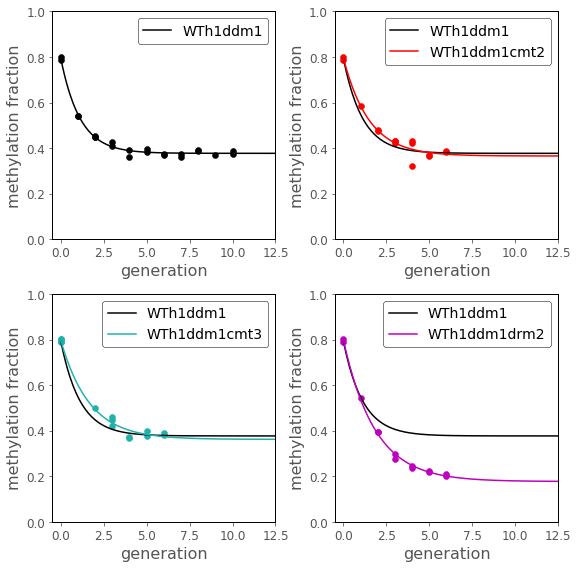

In [47]:
# plot the fits

fig1, ax1 = plt.subplots(2,2,figsize=(8,8))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')




ax1[0,0].scatter(gen_number_WTh1ddm1,Mean_WTh1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k')
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', 
                 label = 'WTh1ddm1' )


ax1[0,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[0,1].scatter(gen_number_WTh1ddm1cmt2,Mean_WTh1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r')
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, color='r', 
                 label = 'WTh1ddm1cmt2' )

ax1[1,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[1,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].scatter(gen_number_WTh1ddm1cmt3,Mean_WTh1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, color='lightseagreen',
              label = 'WTh1ddm1cmt3' )

ax1[1,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[1,1].scatter(gen_number_WTh1ddm1drm2,Mean_WTh1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m')
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, color='m', 
                         label = 'WTh1ddm1drm2' )




leg00 = ax1[0,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg01 = ax1[0,1].legend(fontsize=14,facecolor='white', framealpha=1)
leg02 = ax1[1,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg10 = ax1[1,1].legend(fontsize=14,facecolor='white', framealpha=1)

leg00.get_frame().set_edgecolor('k')
leg01.get_frame().set_edgecolor('k')
leg02.get_frame().set_edgecolor('k')
leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=16)
ax1[0,1].set_xlabel("generation", fontsize=16)
ax1[1,0].set_xlabel("generation", fontsize=16)
ax1[1,1].set_xlabel("generation", fontsize=16)

ax1[0,0].set_ylabel("methylation fraction", fontsize=16)
ax1[0,1].set_ylabel("methylation fraction", fontsize=16)
ax1[1,0].set_ylabel("methylation fraction", fontsize=16)
ax1[1,1].set_ylabel("methylation fraction", fontsize=16)


ax1[0,0].tick_params(axis='both', which='major', labelsize=12)
ax1[0,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,0].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)

ax1[0,0].set_xlim(-0.5,12.5)
ax1[0,1].set_xlim(-0.5,12.5)
ax1[1,0].set_xlim(-0.5,12.5)
ax1[1,1].set_xlim(-0.5,12.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.92)
plt.show()
fig1.savefig("Fig1.png")

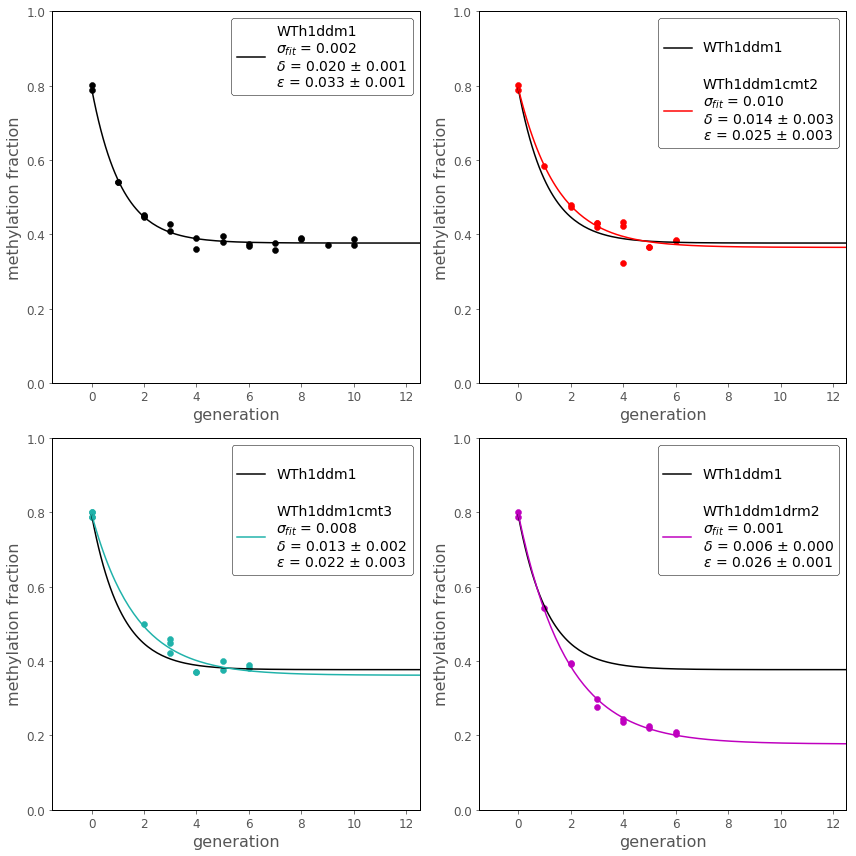

In [48]:
# plot the fits
# includes fitted epsilon and delta values

fig1, ax1 = plt.subplots(2,2,figsize=(12,12))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')

ax1[0,0].scatter(gen_number_WTh1ddm1,Mean_WTh1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k')
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', 
                 label = 'WTh1ddm1\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              %(Mean_WTh1ddm1_fits_df.loc['mean_meth','tot_err_est'],
               Mean_WTh1ddm1_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','epsilon_err']) )


ax1[0,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='\nWTh1ddm1\n')
ax1[0,1].scatter(gen_number_WTh1ddm1cmt2,Mean_WTh1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r')
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, color='r', 
                 label = 'WTh1ddm1cmt2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              %(Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','tot_err_est'],
               Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','epsilon_err']) )

ax1[1,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='\nWTh1ddm1\n')
ax1[1,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].scatter(gen_number_WTh1ddm1cmt3,Mean_WTh1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, label='WTh1ddm1cmt3\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              % (Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','tot_err_est'],
                Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','epsilon_err']), color='lightseagreen')

ax1[1,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='\nWTh1ddm1\n')
ax1[1,1].scatter(gen_number_WTh1ddm1drm2,Mean_WTh1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m')
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, color='m', 
                 label = 'WTh1ddm1drm2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              %(Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','tot_err_est'],
               Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','epsilon_err']) )




leg00 = ax1[0,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg01 = ax1[0,1].legend(fontsize=14,facecolor='white', framealpha=1)
leg02 = ax1[1,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg10 = ax1[1,1].legend(fontsize=14,facecolor='white', framealpha=1)

leg00.get_frame().set_edgecolor('k')
leg01.get_frame().set_edgecolor('k')
leg02.get_frame().set_edgecolor('k')
leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=16)
ax1[0,1].set_xlabel("generation", fontsize=16)
ax1[1,0].set_xlabel("generation", fontsize=16)
ax1[1,1].set_xlabel("generation", fontsize=16)

ax1[0,0].set_ylabel("methylation fraction", fontsize=16)
ax1[0,1].set_ylabel("methylation fraction", fontsize=16)
ax1[1,0].set_ylabel("methylation fraction", fontsize=16)
ax1[1,1].set_ylabel("methylation fraction", fontsize=16)


ax1[0,0].tick_params(axis='both', which='major', labelsize=12)
ax1[0,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,0].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)

ax1[0,0].set_xlim(-1.5,12.5)
ax1[0,1].set_xlim(-1.5,12.5)
ax1[1,0].set_xlim(-1.5,12.5)
ax1[1,1].set_xlim(-1.5,12.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.92)
plt.show()
fig1.savefig("Fig1a.png")

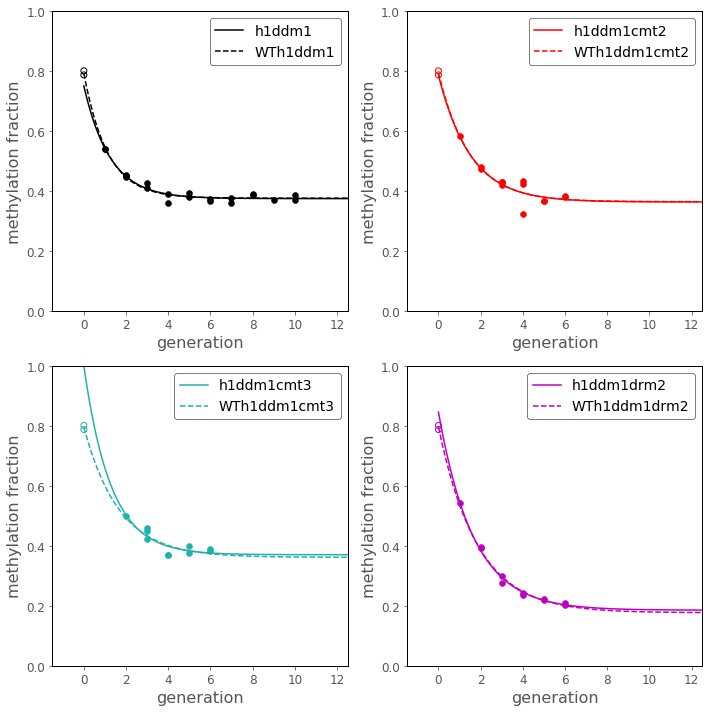

In [49]:
# plot the fits
# compares including and excluding WT data point

fig1, ax1 = plt.subplots(2,2,figsize=(10,10))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')

#ax1[0,0].errorbar([Mean_WT_h1ddm1_xval_1, Mean_WT_h1ddm1_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1_xval_err_1,Mean_WT_h1ddm1_xval_err_2] ,color='k' , capsize=4, elinewidth=2)
ax1[0,0].scatter(gen_number_h1ddm1,Mean_h1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k')
ax1[0,0].plot(x_gens, Mean_h1ddm1_fit_curve, color='k', 
                 label = 'h1ddm1')
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, label='WTh1ddm1', color='k', linestyle='--')
ax1[0,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='k',linewidth=1)


#ax1[0,1].errorbar([Mean_WT_h1ddm1cmt2_xval_1, Mean_WT_h1ddm1cmt2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1cmt2_xval_err_1,Mean_WT_h1ddm1cmt2_xval_err_2] ,color='r' , capsize=4, elinewidth=2)
ax1[0,1].scatter(gen_number_h1ddm1cmt2,Mean_h1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r')
ax1[0,1].plot(x_gens, Mean_h1ddm1cmt2_fit_curve, color='r', 
                 label = 'h1ddm1cmt2' )
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, label='WTh1ddm1cmt2', color='r', linestyle='--')
ax1[0,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='r',linewidth=1)

#ax1[1,0].errorbar([Mean_WT_h1ddm1cmt3_xval_1, Mean_WT_h1ddm1cmt3_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1cmt3_xval_err_1,Mean_WT_h1ddm1cmt3_xval_err_2] ,color='lightseagreen' , capsize=4, elinewidth=2)
ax1[1,0].scatter(gen_number_h1ddm1cmt3,Mean_h1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].plot(x_gens, Mean_h1ddm1cmt3_fit_curve, color='lightseagreen', 
                 label = 'h1ddm1cmt3' )
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, label='WTh1ddm1cmt3', color='lightseagreen', linestyle='--')
ax1[1,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='lightseagreen',linewidth=1)


#ax1[1,1].errorbar([Mean_WT_h1ddm1drm2_xval_1, Mean_WT_h1ddm1drm2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1drm2_xval_err_1,Mean_WT_h1ddm1drm2_xval_err_2] ,color='m' , capsize=4, elinewidth=2)
ax1[1,1].scatter(gen_number_h1ddm1drm2,Mean_h1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m')
ax1[1,1].plot(x_gens, Mean_h1ddm1drm2_fit_curve, color='m', 
                 label = 'h1ddm1drm2' )
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, label='WTh1ddm1drm2', color='m', linestyle='--')
ax1[1,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='m',linewidth=1)


leg00 = ax1[0,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg01 = ax1[0,1].legend(fontsize=14,facecolor='white', framealpha=1)
leg02 = ax1[1,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg10 = ax1[1,1].legend(fontsize=14,facecolor='white', framealpha=1)

leg00.get_frame().set_edgecolor('k')
leg01.get_frame().set_edgecolor('k')
leg02.get_frame().set_edgecolor('k')
leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=16)
ax1[0,1].set_xlabel("generation", fontsize=16)
ax1[1,0].set_xlabel("generation", fontsize=16)
ax1[1,1].set_xlabel("generation", fontsize=16)

ax1[0,0].set_ylabel("methylation fraction", fontsize=16)
ax1[0,1].set_ylabel("methylation fraction", fontsize=16)
ax1[1,0].set_ylabel("methylation fraction", fontsize=16)
ax1[1,1].set_ylabel("methylation fraction", fontsize=16)


ax1[0,0].tick_params(axis='both', which='major', labelsize=12)
ax1[0,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,0].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)

ax1[0,0].set_xlim(-1.5,12.5)
ax1[0,1].set_xlim(-1.5,12.5)
ax1[1,0].set_xlim(-1.5,12.5)
ax1[1,1].set_xlim(-1.5,12.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.82)
plt.show()
#fig1.savefig("FigS1.png")

In [50]:
print(Mean_WT_h1ddm1_xval_1,Mean_WT_h1ddm1_xval_2)
print(Mean_WT_WTh1ddm1_xval_1,Mean_WT_WTh1ddm1_xval_2)

print(Mean_WT_h1ddm1cmt2_xval_1,Mean_WT_h1ddm1cmt2_xval_2)
print(Mean_WT_WTh1ddm1cmt2_xval_1,Mean_WT_WTh1ddm1cmt2_xval_2)

print(Mean_WT_h1ddm1cmt3_xval_1,Mean_WT_h1ddm1cmt3_xval_2)
print(Mean_WT_WTh1ddm1cmt3_xval_1,Mean_WT_WTh1ddm1cmt3_xval_2)

print(Mean_WT_h1ddm1drm2_xval_1,Mean_WT_h1ddm1drm2_xval_2)
print(Mean_WT_WTh1ddm1drm2_xval_1,Mean_WT_WTh1ddm1drm2_xval_2)
print()
print( np.mean([Mean_WT_h1ddm1_xval_1,Mean_WT_h1ddm1_xval_2,
               Mean_WT_h1ddm1cmt2_xval_1,Mean_WT_h1ddm1cmt2_xval_2,
               Mean_WT_h1ddm1drm2_xval_1,Mean_WT_h1ddm1drm2_xval_2]))
print(-9.5E-3)

-0.156075058706 -0.115729064278
-0.0217199902989 0.0151073926773
-0.0522101227632 -0.0037658098921
-0.0244355197283 0.0231651178682
0.485595132834 0.527068058693
-0.0230794281411 0.0297714254844
0.116538309995 0.154041963405
-0.0143288673234 0.0264922106566

-0.00953329703995
-0.0095


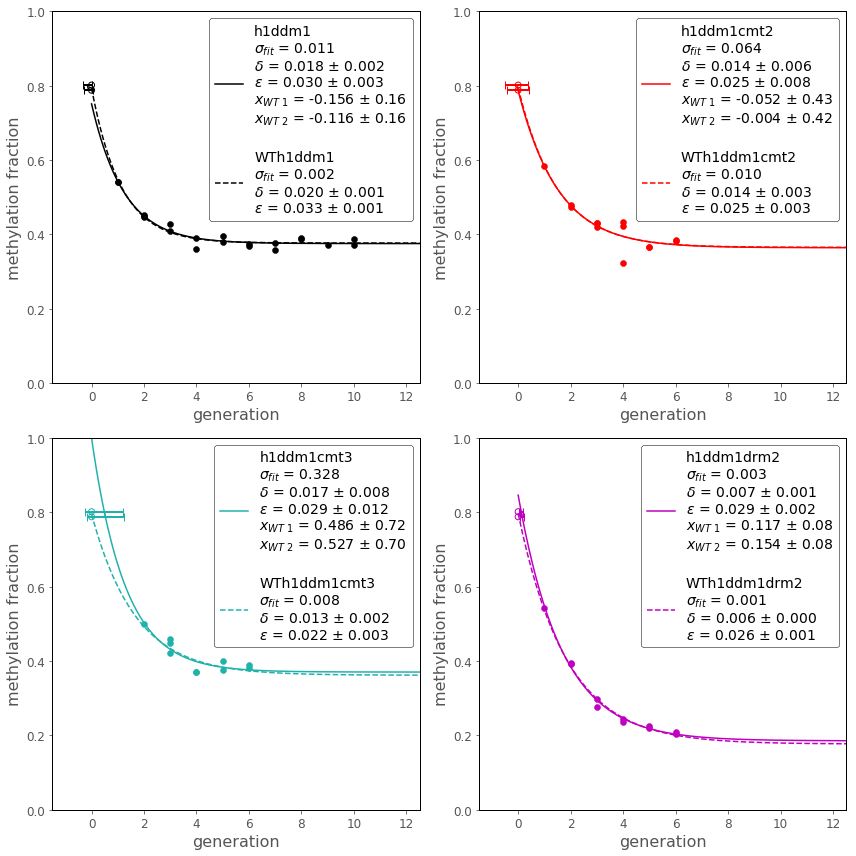

In [51]:
# plot the fits

fig1, ax1 = plt.subplots(2,2,figsize=(12,12))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')

ax1[0,0].errorbar([Mean_WT_h1ddm1_xval_1, Mean_WT_h1ddm1_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
xerr = [Mean_WT_h1ddm1_xval_err_1,Mean_WT_h1ddm1_xval_err_2] ,color='k' , capsize=4, elinewidth=2)
ax1[0,0].scatter(gen_number_h1ddm1,Mean_h1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k')
ax1[0,0].plot(x_gens, Mean_h1ddm1_fit_curve, color='k', 
                 label = 'h1ddm1\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f\n$x_{WT\ 1}$ = %.3f $\pm$ %.2f\n$x_{WT\ 2}$ = %.3f $\pm$ %.2f\n' 
              %(Mean_h1ddm1_fits_df.loc['mean_meth','tot_err_est'], 
                Mean_h1ddm1_fits_df.loc['mean_meth','delta'],
    Mean_h1ddm1_fits_df.loc['mean_meth','delta_err'],
    Mean_h1ddm1_fits_df.loc['mean_meth','epsilon'],
    Mean_h1ddm1_fits_df.loc['mean_meth','epsilon_err'],
                Mean_WT_h1ddm1_xval_1,Mean_WT_h1ddm1_xval_err_1, 
                Mean_WT_h1ddm1_xval_2,Mean_WT_h1ddm1_xval_err_2) )
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, label='WTh1ddm1\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              % (Mean_WTh1ddm1_fits_df.loc['mean_meth','tot_err_est'],
                 Mean_WTh1ddm1_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1_fits_df.loc['mean_meth','epsilon_err']), color='k', linestyle='--')
ax1[0,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='k',linewidth=1)


ax1[0,1].errorbar([Mean_WT_h1ddm1cmt2_xval_1, Mean_WT_h1ddm1cmt2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
xerr = [Mean_WT_h1ddm1cmt2_xval_err_1,Mean_WT_h1ddm1cmt2_xval_err_2] ,color='r' , capsize=4, elinewidth=2)
ax1[0,1].scatter(gen_number_h1ddm1cmt2,Mean_h1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r')
ax1[0,1].plot(x_gens, Mean_h1ddm1cmt2_fit_curve, color='r', 
                 label = 'h1ddm1cmt2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f\n$x_{WT\ 1}$ = %.3f $\pm$ %.2f\n$x_{WT\ 2}$ = %.3f $\pm$ %.2f\n' 
              %(Mean_h1ddm1cmt2_fits_df.loc['mean_meth','tot_err_est'],
                Mean_h1ddm1cmt2_fits_df.loc['mean_meth','delta'],
    Mean_h1ddm1cmt2_fits_df.loc['mean_meth','delta_err'],
    Mean_h1ddm1cmt2_fits_df.loc['mean_meth','epsilon'],
    Mean_h1ddm1cmt2_fits_df.loc['mean_meth','epsilon_err'],
                Mean_WT_h1ddm1cmt2_xval_1,Mean_WT_h1ddm1cmt2_xval_err_1, 
                Mean_WT_h1ddm1cmt2_xval_2,Mean_WT_h1ddm1cmt2_xval_err_2) )
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, label='WTh1ddm1cmt2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              % (Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','tot_err_est'],
                 Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1cmt2_fits_df.loc['mean_meth','epsilon_err']), color='r', linestyle='--')
ax1[0,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='r',linewidth=1)

ax1[1,0].errorbar([Mean_WT_h1ddm1cmt3_xval_1, Mean_WT_h1ddm1cmt3_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
xerr = [Mean_WT_h1ddm1cmt3_xval_err_1,Mean_WT_h1ddm1cmt3_xval_err_2] ,color='lightseagreen' , capsize=4, elinewidth=2)
ax1[1,0].scatter(gen_number_h1ddm1cmt3,Mean_h1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen')
ax1[1,0].plot(x_gens, Mean_h1ddm1cmt3_fit_curve, color='lightseagreen', 
                 label = 'h1ddm1cmt3\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f\n$x_{WT\ 1}$ = %.3f $\pm$ %.2f\n$x_{WT\ 2}$ = %.3f $\pm$ %.2f\n' 
              %(Mean_h1ddm1cmt3_fits_df.loc['mean_meth','tot_err_est'],
                Mean_h1ddm1cmt3_fits_df.loc['mean_meth','delta'],
    Mean_h1ddm1cmt3_fits_df.loc['mean_meth','delta_err'],
    Mean_h1ddm1cmt3_fits_df.loc['mean_meth','epsilon'],
    Mean_h1ddm1cmt3_fits_df.loc['mean_meth','epsilon_err'],
                Mean_WT_h1ddm1cmt3_xval_1,Mean_WT_h1ddm1cmt3_xval_err_1, 
                Mean_WT_h1ddm1cmt3_xval_2,Mean_WT_h1ddm1cmt3_xval_err_2) )
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, label='WTh1ddm1cmt3\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              % (Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','tot_err_est'],
                 Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1cmt3_fits_df.loc['mean_meth','epsilon_err']), color='lightseagreen', linestyle='--')
ax1[1,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='lightseagreen',linewidth=1)


ax1[1,1].errorbar([Mean_WT_h1ddm1drm2_xval_1, Mean_WT_h1ddm1drm2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
xerr = [Mean_WT_h1ddm1drm2_xval_err_1,Mean_WT_h1ddm1drm2_xval_err_2] ,color='m' , capsize=4, elinewidth=2)
ax1[1,1].scatter(gen_number_h1ddm1drm2,Mean_h1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m')
ax1[1,1].plot(x_gens, Mean_h1ddm1drm2_fit_curve, color='m', 
                 label = 'h1ddm1drm2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f\n$x_{WT\ 1}$ = %.3f $\pm$ %.2f\n$x_{WT\ 2}$ = %.3f $\pm$ %.2f\n' 
              %(Mean_h1ddm1drm2_fits_df.loc['mean_meth','tot_err_est'],
                Mean_h1ddm1drm2_fits_df.loc['mean_meth','delta'],
    Mean_h1ddm1drm2_fits_df.loc['mean_meth','delta_err'],
    Mean_h1ddm1drm2_fits_df.loc['mean_meth','epsilon'],
    Mean_h1ddm1drm2_fits_df.loc['mean_meth','epsilon_err'],
                Mean_WT_h1ddm1drm2_xval_1,Mean_WT_h1ddm1drm2_xval_err_1, 
                Mean_WT_h1ddm1drm2_xval_2,Mean_WT_h1ddm1drm2_xval_err_2) )
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, label='WTh1ddm1drm2\n$\sigma_{fit}$ = %.3f\n$\delta$ = %.3f $\pm$ %.3f\n$\epsilon$ = %.3f $\pm$ %.3f' 
              % (Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','tot_err_est'],
                 Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','delta'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','delta_err'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','epsilon'],
    Mean_WTh1ddm1drm2_fits_df.loc['mean_meth','epsilon_err']), color='m', linestyle='--')
ax1[1,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='m',linewidth=1)


leg00 = ax1[0,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg01 = ax1[0,1].legend(fontsize=14,facecolor='white', framealpha=1)
leg02 = ax1[1,0].legend(fontsize=14,facecolor='white', framealpha=1)
leg10 = ax1[1,1].legend(fontsize=14,facecolor='white', framealpha=1)

leg00.get_frame().set_edgecolor('k')
leg01.get_frame().set_edgecolor('k')
leg02.get_frame().set_edgecolor('k')
leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=16)
ax1[0,1].set_xlabel("generation", fontsize=16)
ax1[1,0].set_xlabel("generation", fontsize=16)
ax1[1,1].set_xlabel("generation", fontsize=16)

ax1[0,0].set_ylabel("methylation fraction", fontsize=16)
ax1[0,1].set_ylabel("methylation fraction", fontsize=16)
ax1[1,0].set_ylabel("methylation fraction", fontsize=16)
ax1[1,1].set_ylabel("methylation fraction", fontsize=16)


ax1[0,0].tick_params(axis='both', which='major', labelsize=12)
ax1[0,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,0].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)
ax1[1,1].tick_params(axis='both', which='major', labelsize=12)

ax1[0,0].set_xlim(-1.5,12.5)
ax1[0,1].set_xlim(-1.5,12.5)
ax1[1,0].set_xlim(-1.5,12.5)
ax1[1,1].set_xlim(-1.5,12.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.82)
plt.show()
fig1.savefig("FigS1a.png")

In [52]:
print( np.mean([Mean_WT_h1ddm1_xval_1,Mean_WT_h1ddm1_xval_2] ))
print( np.mean([Mean_WT_h1ddm1cmt2_xval_1,Mean_WT_h1ddm1cmt2_xval_2] ))
print( np.mean([Mean_WT_h1ddm1drm2_xval_1,Mean_WT_h1ddm1drm2_xval_2] ))
print()
print( np.mean([Mean_WT_h1ddm1_xval_1,Mean_WT_h1ddm1_xval_2, Mean_WT_h1ddm1cmt2_xval_1,
                Mean_WT_h1ddm1cmt2_xval_2, 
                Mean_WT_h1ddm1drm2_xval_1,Mean_WT_h1ddm1drm2_xval_2] ))

-0.135902061492
-0.0279879663277
0.1352901367

-0.00953329703995


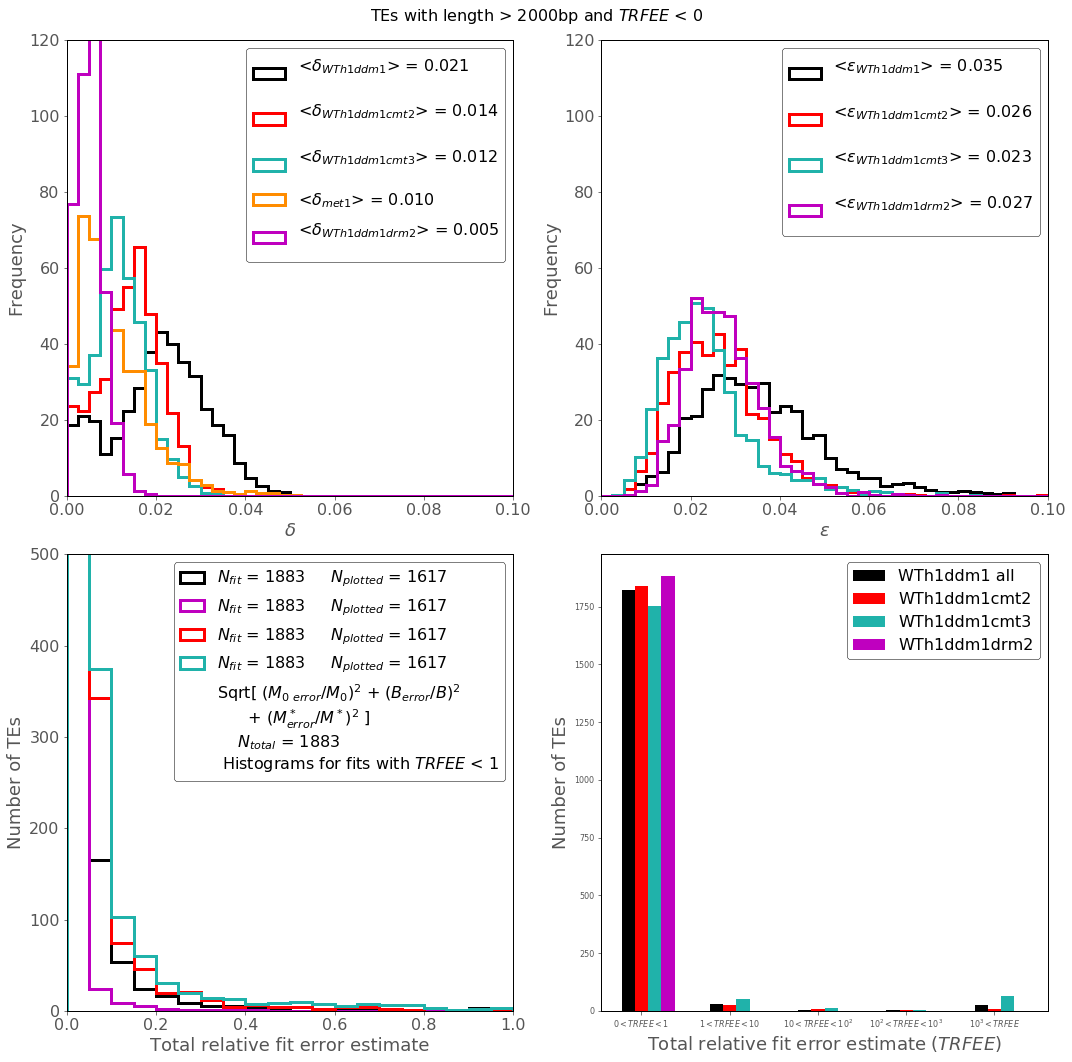

In [53]:
Mean_WTh1ddm1_fits_N = len(TE_mcg_data_df)

fig, ax = plt.subplots(2,2,figsize=(15,15))

for spine in ['left','right','top','bottom']:
    ax[0,0].spines[spine].set_color('k')
    ax[1,0].spines[spine].set_color('k')
    ax[0,1].spines[spine].set_color('k')
    ax[1,1].spines[spine].set_color('k')
ax[0,0].set_facecolor('white')
ax[1,0].set_facecolor('white')
ax[0,1].set_facecolor('white')
ax[1,1].set_facecolor('white')



ax[0,0].hist(TE_WTh1ddm1_fits_df['delta'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='k',
               label='<$\delta_{WTh1ddm1}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1_fits_df['delta'].tolist())))
ax[0,1].hist(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='k',
               label='<$\epsilon_{WTh1ddm1}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1_fits_df['epsilon'].tolist())))


ax[0,0].hist(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='r',
               label='<$\delta_{WTh1ddm1cmt2}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['delta'].tolist())))
ax[0,1].hist(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='r',
               label='<$\epsilon_{WTh1ddm1cmt2}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist())))

ax[0,0].hist(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='lightseagreen',
               label='<$\delta_{WTh1ddm1cmt3}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['delta'].tolist())))
ax[0,1].hist(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='lightseagreen',
               label='<$\epsilon_{WTh1ddm1cmt3}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist())))

ax[0,0].hist(TE_all_met1_df.met1_f3_1.tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='darkorange',
               label='<$\delta_{met1}$> = %.3f' 
                % (np.mean(TE_all_met1_df.met1_f3_1.tolist()) ))


ax[0,0].hist(TE_WTh1ddm1drm2_fits_df['delta'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='m',
               label='<$\delta_{WTh1ddm1drm2}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['delta'].tolist())))
ax[0,1].hist(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(), 40, normed=True, range=(0,0.1), histtype='step',
              linewidth=3, color='m',
               label='<$\epsilon_{WTh1ddm1drm2}$> = %.3f\n' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist())))

if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (0.5)


fig.suptitle(data_type+TRFEE_label, fontsize=16)

if tot_err_thresh_value > 0:
    ax[1,0].scatter(-1,-1, label = 'Sqrt[ $(M_{0\ error}/M_0)^2$ + $(B_{error}/B)^2$ \n      + $(M^*_{error}/M^*)^2$ ] \n\
    $N_{total}$ = %d \n Histograms for fits with $TRFEE$ < %d' % (Mean_WTh1ddm1_fits_N, tot_err_thresh_value*10) )
elif tot_err_thresh_value == 0:
    ax[1,0].scatter(-1,-1, label = 'Sqrt[ $(M_{0\ error}/M_0)^2$ + $(B_{error}/B)^2$ \n      + $(M^*_{error}/M^*)^2$ ] \n\
    $N_{total}$ = %d \n Histograms for fits with $TRFEE$ < %d' % (Mean_WTh1ddm1_fits_N, 1) )

ax[1,0].hist(tot_err_est_WTh1ddm1_dat, 20, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='k', 
             label='$N_{fit}$ = %d     $N_{plotted}$ = %d' % (len(tot_err_est_WTh1ddm1_dat), len(TE_WTh1ddm1_fits_df['delta'].tolist())))
ax[1,0].hist(tot_err_est_WTh1ddm1drm2_dat, 20, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='m', 
             label='$N_{fit}$ = %d     $N_{plotted}$ = %d' % (len(tot_err_est_WTh1ddm1drm2_dat), len(TE_WTh1ddm1drm2_fits_df['delta'].tolist())))
ax[1,0].hist(tot_err_est_WTh1ddm1cmt2_dat, 20, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='r', 
             label='$N_{fit}$ = %d     $N_{plotted}$ = %d' % (len(tot_err_est_WTh1ddm1cmt2_dat), len(TE_WTh1ddm1cmt2_fits_df['delta'].tolist())))
ax[1,0].hist(tot_err_est_WTh1ddm1cmt3_dat, 20, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='lightseagreen', 
             label='$N_{fit}$ = %d     $N_{plotted}$ = %d' % (len(tot_err_est_WTh1ddm1cmt3_dat), len(TE_WTh1ddm1cmt3_fits_df['delta'].tolist())))



bar_labels = ['$0<TRFEE<1$', '$1<TRFEE<10$', '$10<TRFEE<10^2$', '$10^2<TRFEE<10^3$', '$10^3<TRFEE$']
x_bar_labels = np.arange(len(bar_labels))  # the label locations
bar_width = 0.15  # the width of the bars
ax[1,1].set_xticks(x_bar_labels)
ax[1,1].set_xticklabels(bar_labels)

ax[1,1].bar(x_bar_labels - (1)*bar_width, N_err_WTh1ddm1_dat, bar_width, label='WTh1ddm1 all', color='k')
ax[1,1].bar(x_bar_labels - (0)*bar_width, N_err_WTh1ddm1cmt2_dat, bar_width, label='WTh1ddm1cmt2', color='r')
ax[1,1].bar(x_bar_labels + (1)*bar_width, N_err_WTh1ddm1cmt3_dat, bar_width, label='WTh1ddm1cmt3', color='lightseagreen')
ax[1,1].bar(x_bar_labels + (2)*bar_width, N_err_WTh1ddm1drm2_dat, bar_width, label='WTh1ddm1drm2', color='m')





ax[0,0].set_xlabel("$\delta$", fontsize=18)
ax[0,1].set_xlabel("$\epsilon$", fontsize=18)
ax[1,0].set_xlabel("Total relative fit error estimate", fontsize=18)
ax[1,1].set_xlabel("Total relative fit error estimate ($TRFEE$)", fontsize=18)
    
    
ax[1,0].set_xlim([0, 1])

ax[1,0].set_ylim([0, 500])



ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(6))

ax[0,0].set_ylabel("Frequency", fontsize=18)
ax[0,1].set_ylabel("Frequency", fontsize=18)

ax[1,0].set_ylabel("Number of TEs", fontsize=18)
ax[1,1].set_ylabel("Number of TEs", fontsize=18)

ax[0,0].set_xlim([0, 0.1])
ax[0,0].set_ylim([0., 120])
ax[0,1].set_xlim([0, 0.1])
ax[0,1].set_ylim([0., 120])

for i_ax in range(0,2):
    for j_ax in range(0,2):
        ax[i_ax,j_ax].tick_params(axis='both', which='major', labelsize=16)

ax[1,1].tick_params(axis='both', which='major', labelsize=8)


leg_00 = ax[0,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

leg_01 = ax[0,1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_01.get_frame().set_edgecolor('k')

leg_10 = ax[1,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,handlelength=1.5,facecolor='white', framealpha=1)
leg_10.get_frame().set_edgecolor('k')

leg_11 = ax[1,1].legend(fontsize=16, markerscale=0, loc='upper right',facecolor='white', framealpha=1)
leg_11.get_frame().set_edgecolor('k')


plt.tight_layout()
fig.subplots_adjust(top=0.95)
#fig.savefig("Fig2a_TRFEE_"+str(tot_err_thresh_value)+".png")

In [54]:
print(len(TE_WTh1ddm1_fits_df['epsilon'].tolist()))
print(len(TE_all_met1_df[TE_all_met1_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )].met1_f3_1.tolist()))

1617
1617


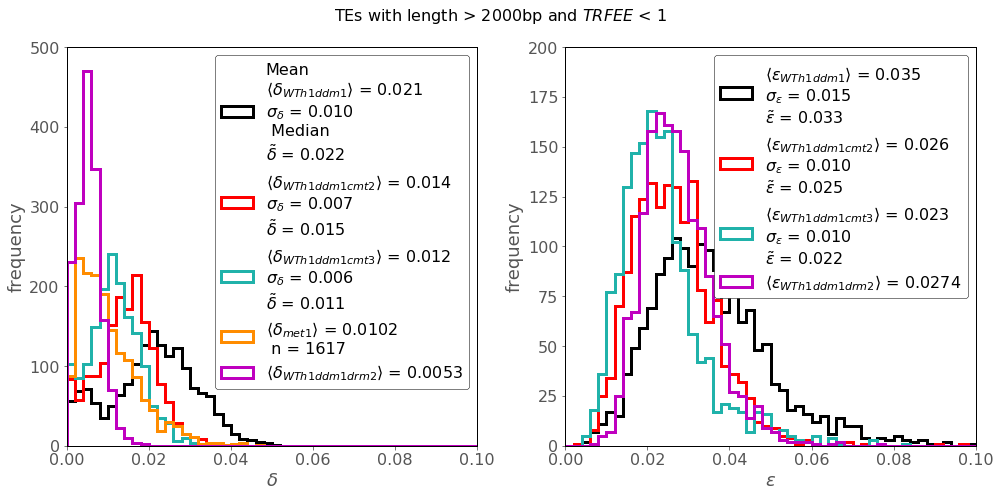

In [55]:

fig, ax = plt.subplots(1,2,figsize=(14,7))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')



ax[0].hist(TE_WTh1ddm1_fits_df['delta'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='k',
               label='Mean\n$\langle\delta_{WTh1ddm1}\\rangle$ = %.3f\n$\sigma_{\delta}$ = %.3f\n Median\n$\\tilde{\delta}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['delta'].tolist()),
                   np.std(TE_WTh1ddm1_fits_df['delta'].tolist()),
                  np.median(TE_WTh1ddm1_fits_df['delta'].tolist()) ))
ax[1].hist(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='k',
               label='$\langle\epsilon_{WTh1ddm1}\\rangle$ = %.3f\n$\sigma_{\epsilon}$ = %.3f\n$\\tilde{\epsilon}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['epsilon'].tolist()),
                   np.std(TE_WTh1ddm1_fits_df['epsilon'].tolist()),
                  np.median(TE_WTh1ddm1_fits_df['epsilon'].tolist()) ))


ax[0].hist(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='r',
               label='$\langle\delta_{WTh1ddm1cmt2}\\rangle$ = %.3f\n$\sigma_{\delta}$ = %.3f\n$\\tilde{\delta}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['delta'].tolist()),
                   np.std(TE_WTh1ddm1cmt2_fits_df['delta'].tolist()),
                  np.median(TE_WTh1ddm1cmt2_fits_df['delta'].tolist())))
ax[1].hist(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='r',
               label='$\langle\epsilon_{WTh1ddm1cmt2}\\rangle$ = %.3f\n$\sigma_{\epsilon}$ = %.3f\n$\\tilde{\epsilon}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist()),
                   np.std(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist()),
                  np.median(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist())))

ax[0].hist(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='lightseagreen',
               label='$\langle\delta_{WTh1ddm1cmt3}\\rangle$ = %.3f\n$\sigma_{\delta}$ = %.3f\n$\\tilde{\delta}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['delta'].tolist()), 
                   np.std(TE_WTh1ddm1cmt3_fits_df['delta'].tolist()), 
                  np.median(TE_WTh1ddm1cmt3_fits_df['delta'].tolist())))
ax[1].hist(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='lightseagreen',
               label='$\langle\epsilon_{WTh1ddm1cmt3}\\rangle$ = %.3f\n$\sigma_{\epsilon}$ = %.3f\n$\\tilde{\epsilon}$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist()), 
                   np.std(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist()), 
                  np.median(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist())))



ax[0].hist(TE_all_met1_df[TE_all_met1_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )].met1_f3_1.tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='darkorange',
               label='$\langle\delta_{met1}\\rangle$ = %.4f\n n = %d' 
                % (np.mean(TE_all_met1_df[TE_all_met1_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )].met1_f3_1.tolist()),
                  len(TE_all_met1_df[TE_all_met1_df.index.isin( np.array(TE_WTh1ddm1_fits_df.index.tolist()) )].met1_f3_1.tolist()) ))


ax[0].hist(TE_WTh1ddm1drm2_fits_df['delta'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle\delta_{WTh1ddm1drm2}\rangle$ = %.4f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['delta'].tolist())))
ax[1].hist(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(), 50, normed=False, range=(0,0.1), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle\epsilon_{WTh1ddm1drm2}\rangle$ = %.4f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist())))

if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (1)


fig.suptitle(data_type+TRFEE_label, fontsize=16)







ax[0].set_xlabel("$\delta$", fontsize=18)
ax[1].set_xlabel("$\epsilon$", fontsize=18)

    




ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(6))


ax[0].set_ylabel("frequency", fontsize=18)
ax[1].set_ylabel("frequency", fontsize=18)


ax[0].set_xlim([0, 0.1])
ax[0].set_ylim([0., 500])
ax[1].set_xlim([0, 0.1])
ax[1].set_ylim([0., 200])


ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)


leg_00 = ax[0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

leg_01 = ax[1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_01.get_frame().set_edgecolor('k')



plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("Fig2_TRFEE_"+str(tot_err_thresh_value)+".png")

In [56]:
# function to smooth histograms using a moving average

def calc_moving_average(N_window_, list_in_):


    list_out_ = np.convolve( list_in_, np.ones((N_window_,))/N_window_, mode='same')


    # If N_window_ = odd
    # start and end edges are both of length (N_window_-1.)/2.
    # range (0, (N_window_-1.)/2.)
    # range (-(N_window_-1.)/2.,0)

    #If N_window_ = even 
    # start edge of length = N_window_/2.
    # end window_ of length = (N_window_/2.-1.)
    # range (0, N_window_/2.)
    # range (-(N_window_/2.-1.),0)

    # normalisation corrections to ends: 
    # If N_window_ = odd (eg. 5)
    # (3,4) and (4,3)
    # ((N_window_+1.)/2. , (N_window_+1.)/2. +1) and ((N_window_+1.)/2. +1 , (N_window_+1.)/2)
    # If N_window_ = even (eg. 6)
    # (3,4,5) and (5,4)
    # (N_window_/2. , N_window_/2.+1 , N_window_/2.+2) and (N_window_/2.+2 , N_window_/2.+1)


    if (N_window_%2) == 0:
        #print('N_window_ even')
        for i_temp in range(0, int(N_window_/2.)):
            #print(i_temp, i_temp + N_window_/2.)
            list_out_[i_temp] = list_out_[i_temp]*N_window_/(i_temp + N_window_/2.)
        for i_temp in range(int(-(N_window_/2.-1.)),0):
            #print(i_temp, N_window_/2. - i_temp)
            list_out_[i_temp] = list_out_[i_temp]*N_window_/(N_window_/2. - i_temp)
    if (N_window_%2) ==1:
        #print('N_window_ odd')
        for i_temp in range(0, int((N_window_-1.)/2.)):
            #print(i_temp, i_temp + (N_window_+1.)/2.)
            list_out_[i_temp] = list_out_[i_temp]*N_window_/(i_temp + (N_window_+1.)/2.)
        for i_temp in range(int(-(N_window_-1.)/2.),0):
            #print(i_temp,  (N_window_-1.)/2. -i_temp)
            list_out_[i_temp] = list_out_[i_temp]*N_window_/((N_window_-1.)/2. -i_temp)
            
    return list_out_

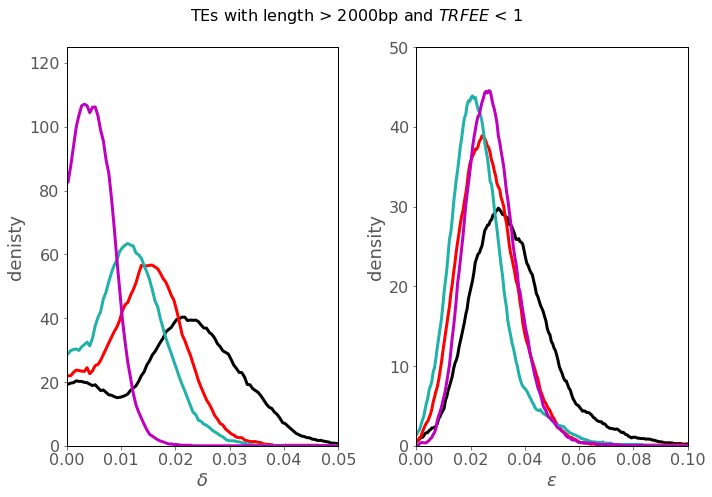

In [57]:

fig, ax = plt.subplots(1,2,figsize=(10,7))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')


n_bin = 200

hist_range_delta = (0,0.1)
hist_step_delta = (hist_range_delta[1]-hist_range_delta[0])/n_bin
x_hist_vals_delta = np.arange(hist_range_delta[0],hist_range_delta[1],hist_step_delta)
x_hist_vals_delta = x_hist_vals_delta+hist_step_delta/2.

hist_range_epsilon = (0,0.1)
hist_step_epsilon = (hist_range_epsilon[1]-hist_range_epsilon[0])/n_bin
x_hist_vals_epsilon = np.arange(hist_range_epsilon[0],hist_range_epsilon[1],hist_step_epsilon)
x_hist_vals_epsilon = x_hist_vals_epsilon+hist_step_epsilon/2.


hist_delta_WTh1ddm1, bins_vals_delta = np.histogram(TE_WTh1ddm1_fits_df['delta'].tolist(), 
                                                    bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1, bins_vals_epsilon = np.histogram(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 
                                                        bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1cmt2, bins_vals_delta = np.histogram(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1cmt2, bins_vals_epsilon = np.histogram(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1cmt3, bins_vals_delta = np.histogram(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1cmt3, bins_vals_epsilon = np.histogram(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1drm2, bins_vals_delta = np.histogram(TE_WTh1ddm1drm2_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1drm2, bins_vals_epsilon = np.histogram(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

N_window_delta = 15
N_window_epsilon = N_window_delta*2

hist_delta_WTh1ddm1_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1)
hist_epsilon_WTh1ddm1_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1)

hist_delta_WTh1ddm1cmt2_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1cmt2)
hist_epsilon_WTh1ddm1cmt2_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1cmt2)

hist_delta_WTh1ddm1cmt3_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1cmt3)
hist_epsilon_WTh1ddm1cmt3_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1cmt3)

hist_delta_WTh1ddm1drm2_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1drm2)
hist_epsilon_WTh1ddm1drm2_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1drm2)



ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1_smooth, 
              linewidth=3, color='k',
               label=r'$\langle\delta_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1_smooth, 
              linewidth=3, color='k',
               label=r'$\langle\epsilon_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1cmt2_smooth, 
              linewidth=3, color='r',
               label=r'$\langle\delta_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1cmt2_smooth, 
              linewidth=3, color='r',
               label=r'$\langle\epsilon_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1cmt3_smooth, 
              linewidth=3, color='lightseagreen',
               label=r'$\langle\delta_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1cmt3_smooth, 
              linewidth=3, color='lightseagreen',
               label=r'$\langle\epsilon_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1drm2_smooth, 
              linewidth=3, color='m',
               label=r'$\langle\delta_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1drm2_smooth, 
              linewidth=3, color='m',
               label=r'$\langle\epsilon_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist())))

ax[0].set_xlim([0, 0.05])
ax[0].set_ylim([0., 125])
ax[1].set_xlim([0, 0.1])
ax[1].set_ylim([0., 50])



if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (1)


fig.suptitle(data_type+TRFEE_label, fontsize=16)

ax[0].set_xlabel("$\delta$", fontsize=18)
ax[1].set_xlabel("$\epsilon$", fontsize=18)

ax[0].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(6))


ax[0].set_ylabel("denisty", fontsize=18)
ax[1].set_ylabel("density", fontsize=18)




ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)


#leg_00 = ax[0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
#leg_00.get_frame().set_edgecolor('k')

#leg_01 = ax[1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
#leg_01.get_frame().set_edgecolor('k')



plt.tight_layout()
fig.subplots_adjust(top=0.9)
#fig.savefig("Fig2_TRFEE_"+str(tot_err_thresh_value)+".png")

In [58]:
print(TE_WTh1ddm1_fits_df.head())

             M_0_fit  M_0_fit_err     B_fit  B_fit_err  M_star_fit  \
ID                                                                   
AT1TE08240  0.867240     0.021443  0.788985   0.122600    0.546217   
AT1TE09080  0.845935     0.015500  1.340958   0.155723    0.474721   
AT1TE12295  0.821972     0.018419  0.984006   0.140728    0.509544   
AT1TE14085  0.833958     0.030480  0.919860   0.115323    0.254534   
AT1TE15170  0.798507     0.025482  0.792128   0.185987    0.545937   

            M_star_fit_err  B_M_star_cov  M_star_M_0_cov  M_0_B_cov  \
ID                                                                    
AT1TE08240        0.009557      0.000696        0.000018   0.001039   
AT1TE09080        0.005819      0.000431        0.000003   0.000574   
AT1TE12295        0.007516      0.000571        0.000008   0.000859   
AT1TE14085        0.012737      0.000815        0.000025   0.001235   
AT1TE15170        0.011336      0.001250        0.000025   0.001869   

           

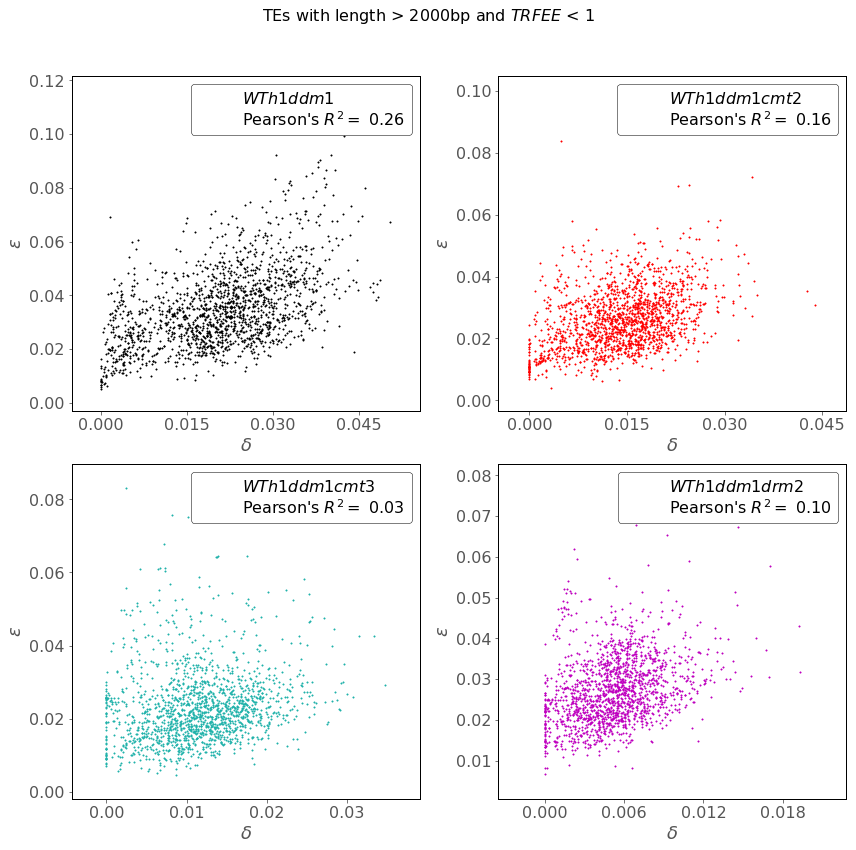

In [59]:


# check data frames in same order
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.reindex(index_order_list)
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.reindex(index_order_list)
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df.reindex(index_order_list)


Mean_WTh1ddm1_fits_N = len(TE_mcg_data_df)

fig, ax = plt.subplots(2,2,figsize=(12,12))

for spine in ['left','right','top','bottom']:
    ax[0,0].spines[spine].set_color('k')
    ax[0,1].spines[spine].set_color('k')
    ax[1,0].spines[spine].set_color('k')
    ax[1,1].spines[spine].set_color('k')
ax[0,0].set_facecolor('white')
ax[0,1].set_facecolor('white')
ax[1,0].set_facecolor('white')
ax[1,1].set_facecolor('white')


ax[0,0].scatter(TE_WTh1ddm1_fits_df['delta'].tolist(), TE_WTh1ddm1_fits_df['epsilon'].tolist(),s=2, 
        color='k', label= "$WTh1ddm1$\nPearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1_fits_df['delta'].tolist(),
                                         TE_WTh1ddm1_fits_df['epsilon'].tolist())[0])**2))

ax[0,1].scatter(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(),s=2, 
        color='r', label= "$WTh1ddm1cmt2$\nPearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(),
                                         TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist())[0])**2))

ax[1,0].scatter(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(),s=2, 
        color='lightseagreen', label= "$WTh1ddm1cmt3$\nPearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(),
                                         TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist())[0])**2))

ax[1,1].scatter(TE_WTh1ddm1drm2_fits_df['delta'].tolist(), TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(),s=2, 
        color='m', label= "$WTh1ddm1drm2$\nPearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1drm2_fits_df['delta'].tolist(),
                                         TE_WTh1ddm1drm2_fits_df['epsilon'].tolist())[0])**2))




if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (1)


fig.suptitle(data_type+TRFEE_label, fontsize=16)







ax[0,0].set_xlabel("$\delta$", fontsize=18)
ax[0,0].set_ylabel("$\epsilon$", fontsize=18)

ax[0,1].set_xlabel("$\delta$", fontsize=18)
ax[0,1].set_ylabel("$\epsilon$", fontsize=18)

ax[1,0].set_xlabel("$\delta$", fontsize=18)
ax[1,0].set_ylabel("$\epsilon$", fontsize=18)

ax[1,1].set_xlabel("$\delta$", fontsize=18)
ax[1,1].set_ylabel("$\epsilon$", fontsize=18)




ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))


#ax[0,0].set_xlim([0, 0.08])
#ax[0,0].set_ylim([0, 0.08])
#ax[0,1].set_xlim([0, 0.08])
#ax[0,1].set_ylim([0, 0.08])
#ax[1,0].set_xlim([0, 0.08])
#ax[1,0].set_ylim([0, 0.08])
#ax[1,1].set_xlim([0, 0.08])
#ax[1,1].set_ylim([0, 0.08])



ax[0,0].tick_params(axis='both', which='major', labelsize=16)
ax[0,1].tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax[0,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

leg_01 = ax[0,1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_01.get_frame().set_edgecolor('k')



ax[1,0].tick_params(axis='both', which='major', labelsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=16)

leg_10 = ax[1,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_10.get_frame().set_edgecolor('k')

leg_11 = ax[1,1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_11.get_frame().set_edgecolor('k')



plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("delta_epsilon_corln.png")

In [60]:
print(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1drm2_fits_df['delta']).head())
print(TE_WTh1ddm1_fits_df['delta'].head())
print(TE_WTh1ddm1drm2_fits_df['delta'].head())

ID
AT1TE08240    0.018893
AT1TE09080    0.035880
AT1TE12295    0.023121
AT1TE14085    0.010733
AT1TE15170    0.021183
Name: delta, dtype: float64
ID
AT1TE08240    0.025350
AT1TE09080    0.037446
AT1TE12295    0.029494
AT1TE14085    0.013773
AT1TE15170    0.025438
Name: delta, dtype: float64
ID
AT1TE08240    0.006457
AT1TE09080    0.001566
AT1TE12295    0.006373
AT1TE14085    0.003039
AT1TE15170    0.004255
Name: delta, dtype: float64


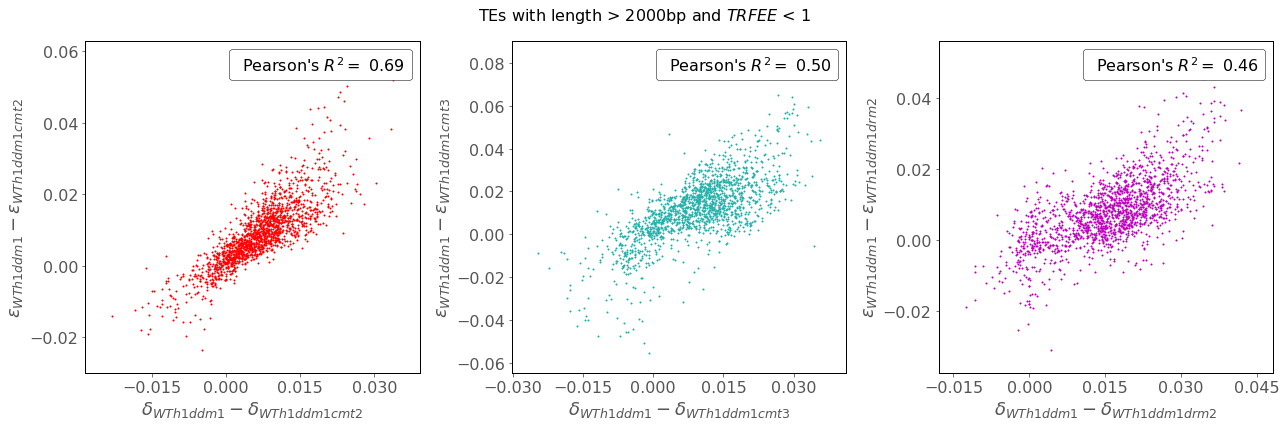

In [61]:
# check data frames in same order
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.reindex(index_order_list)
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.reindex(index_order_list)
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df.reindex(index_order_list)


Mean_WTh1ddm1_fits_N = len(TE_mcg_data_df)

fig, ax = plt.subplots(1,3,figsize=(18,6))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[2].spines[spine].set_color('k')
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
ax[2].set_facecolor('white')


ax[0].scatter(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1cmt2_fits_df['delta']).tolist(), 
                TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1cmt2_fits_df['epsilon']).tolist(),s=2, 
        color='r', label= "Pearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1cmt2_fits_df['delta']).tolist(),
                                         TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1cmt2_fits_df['epsilon']).tolist())[0])**2))

ax[1].scatter(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1cmt3_fits_df['delta']).tolist(), 
                TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1cmt3_fits_df['epsilon']).tolist(),s=2, 
        color='lightseagreen', label= "Pearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1cmt3_fits_df['delta']).tolist(),
                                         TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1cmt3_fits_df['epsilon']).tolist())[0])**2))

ax[2].scatter(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1drm2_fits_df['delta']).tolist(), 
                TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1drm2_fits_df['epsilon']).tolist(),s=2, 
        color='m', label= "Pearson's $R^2 =$ %.2f" % ((scipy.stats.pearsonr(TE_WTh1ddm1_fits_df['delta'].sub(TE_WTh1ddm1drm2_fits_df['delta']).tolist(),
                                         TE_WTh1ddm1_fits_df['epsilon'].sub(TE_WTh1ddm1drm2_fits_df['epsilon']).tolist())[0])**2))


if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (1)


fig.suptitle(data_type+TRFEE_label, fontsize=16)







ax[0].set_xlabel("$\delta_{WTh1ddm1}-\delta_{WTh1ddm1cmt2}$", fontsize=18)
ax[0].set_ylabel("$\epsilon_{WTh1ddm1}-\epsilon_{WTh1ddm1cmt2}$", fontsize=18)

ax[1].set_xlabel("$\delta_{WTh1ddm1}-\delta_{WTh1ddm1cmt3}$", fontsize=18)
ax[1].set_ylabel("$\epsilon_{WTh1ddm1}-\epsilon_{WTh1ddm1cmt3}$", fontsize=18)

ax[2].set_xlabel("$\delta_{WTh1ddm1}-\delta_{WTh1ddm1drm2}$", fontsize=18)
ax[2].set_ylabel("$\epsilon_{WTh1ddm1}-\epsilon_{WTh1ddm1drm2}$", fontsize=18)




ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[2].xaxis.set_major_locator(plt.MaxNLocator(5))


#ax[0].set_xlim([0, 0.08])
#ax[0].set_ylim([0, 0.08])
#ax[1].set_xlim([0, 0.08])
#ax[1].set_ylim([0, 0.08])
#ax[2].set_xlim([0, 0.08])
#ax[2].set_ylim([0, 0.08])



ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax[0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1,handlelength=-0.4)
leg_00.get_frame().set_edgecolor('k')

leg_01 = ax[1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1,handlelength=-0.4)
leg_01.get_frame().set_edgecolor('k')

leg_02 = ax[2].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1,handlelength=-0.4)
leg_02.get_frame().set_edgecolor('k')


plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("deltaChange_epsilonChange_corln.png")

In [62]:
print((TE_WTh1ddm1cmt2_fits_df['epsilon']/TE_WTh1ddm1_fits_df['epsilon']).mean())

0.7868442712245114


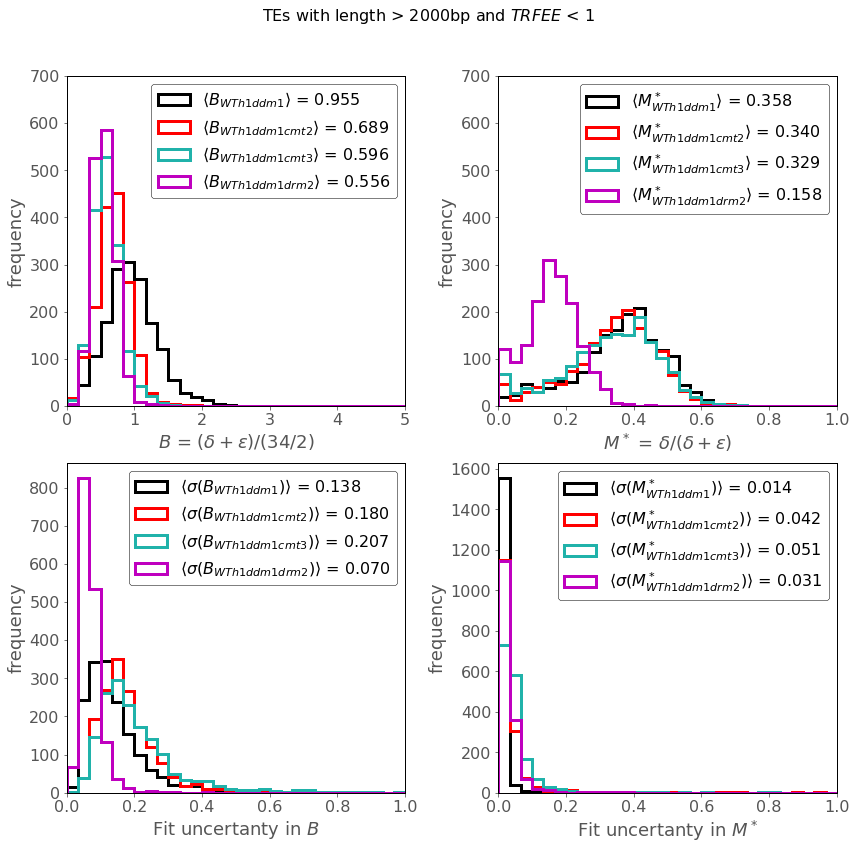

In [63]:


fig, ax = plt.subplots(2,2,figsize=(12,12))

for spine in ['left','right','top','bottom']:
    ax[0,0].spines[spine].set_color('k')
    ax[0,1].spines[spine].set_color('k')
    ax[1,0].spines[spine].set_color('k')
    ax[1,1].spines[spine].set_color('k')
ax[0,0].set_facecolor('white')
ax[0,1].set_facecolor('white')
ax[1,0].set_facecolor('white')
ax[1,1].set_facecolor('white')



ax[0,0].hist(TE_WTh1ddm1_fits_df['B_fit'].tolist(), 30, normed=False, range=(0,5), histtype='step',
              linewidth=3, color='k',
               label=r'$\langle B_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['B_fit'].tolist())))
ax[0,1].hist(TE_WTh1ddm1_fits_df['M_star_fit'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='k',
               label=r'$\langle M^*_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['M_star_fit'].tolist())))

ax[0,0].hist(TE_WTh1ddm1cmt2_fits_df['B_fit'].tolist(), 30, normed=False, range=(0,5), histtype='step',
              linewidth=3, color='r',
               label=r'$\langle B_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['B_fit'].tolist())))
ax[0,1].hist(TE_WTh1ddm1cmt2_fits_df['M_star_fit'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='r',
               label=r'$\langle M^*_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['M_star_fit'].tolist())))

ax[0,0].hist(TE_WTh1ddm1cmt3_fits_df['B_fit'].tolist(), 30, normed=False, range=(0,5), histtype='step',
              linewidth=3, color='lightseagreen',
               label=r'$\langle B_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['B_fit'].tolist())))
ax[0,1].hist(TE_WTh1ddm1cmt3_fits_df['M_star_fit'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='lightseagreen',
               label=r'$\langle M^*_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['M_star_fit'].tolist())))

ax[0,0].hist(TE_WTh1ddm1drm2_fits_df['B_fit'].tolist(), 30, normed=False, range=(0,5), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle B_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['B_fit'].tolist())))
ax[0,1].hist(TE_WTh1ddm1drm2_fits_df['M_star_fit'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle M^*_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['M_star_fit'].tolist())))




ax[1,0].hist(TE_WTh1ddm1_fits_df['B_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='k',
               label=r'$\langle \sigma (B_{WTh1ddm1})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['B_fit_err'].tolist())))
ax[1,1].hist(TE_WTh1ddm1_fits_df['M_star_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='k',
               label=r'$\langle \sigma (M^*_{WTh1ddm1})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['M_star_fit_err'].tolist())))

ax[1,0].hist(TE_WTh1ddm1cmt2_fits_df['B_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='r',
               label=r'$\langle \sigma (B_{WTh1ddm1cmt2})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['B_fit_err'].tolist())))
ax[1,1].hist(TE_WTh1ddm1cmt2_fits_df['M_star_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='r',
               label=r'$\langle \sigma (M^*_{WTh1ddm1cmt2})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['M_star_fit_err'].tolist())))

ax[1,0].hist(TE_WTh1ddm1cmt3_fits_df['B_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='lightseagreen',
               label=r'$\langle \sigma (B_{WTh1ddm1cmt3})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['B_fit_err'].tolist())))
ax[1,1].hist(TE_WTh1ddm1cmt3_fits_df['M_star_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='lightseagreen',
               label=r'$\langle \sigma (M^*_{WTh1ddm1cmt3})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['M_star_fit_err'].tolist())))

ax[1,0].hist(TE_WTh1ddm1drm2_fits_df['B_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle \sigma (B_{WTh1ddm1drm2})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['B_fit_err'].tolist())))
ax[1,1].hist(TE_WTh1ddm1drm2_fits_df['M_star_fit_err'].tolist(), 30, normed=False, range=(0,1), histtype='step',
              linewidth=3, color='m',
               label=r'$\langle \sigma (M^*_{WTh1ddm1drm2})\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['M_star_fit_err'].tolist())))


if tot_err_thresh_value > 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (tot_err_thresh_value*10)
elif tot_err_thresh_value == 0:
    TRFEE_label = ' and $TRFEE$ < %d' % (1)


fig.suptitle(data_type+TRFEE_label, fontsize=16)







ax[0,0].set_xlabel("$B$ = $(\delta + \epsilon)/(34/2)$", fontsize=18)
ax[0,1].set_xlabel("$M^*$ = $\delta/(\delta+\epsilon)$", fontsize=18)

ax[1,0].set_xlabel("Fit uncertanty in $B$", fontsize=18)
ax[1,1].set_xlabel("Fit uncertanty in $M^*$", fontsize=18)




ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))

ax[0,0].set_ylabel("frequency", fontsize=18)
ax[0,1].set_ylabel("frequency", fontsize=18)

ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(6))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))

ax[1,0].set_ylabel("frequency", fontsize=18)
ax[1,1].set_ylabel("frequency", fontsize=18)



ax[0,0].set_xlim([0, 5])
ax[0,0].set_ylim([0., 700])
ax[0,1].set_xlim([0, 1])
ax[0,1].set_ylim([0., 700])

ax[1,0].set_xlim([0, 1])
ax[1,1].set_xlim([0, 1])


ax[0,0].tick_params(axis='both', which='major', labelsize=16)
ax[0,1].tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax[0,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

leg_01 = ax[0,1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_01.get_frame().set_edgecolor('k')



ax[1,0].tick_params(axis='both', which='major', labelsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=16)

leg_10 = ax[1,0].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_10.get_frame().set_edgecolor('k')

leg_11 = ax[1,1].legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_11.get_frame().set_edgecolor('k')



plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("DecayConstDist.png")

In [64]:
print(len(TE_WTh1ddm1_fits_df['delta'].tolist()))
print(len( TE_WTh1ddm1_fits_df.loc[ (TE_WTh1ddm1_fits_df['B_fit'] <= 0.7) ].delta.tolist() ))
print(len( TE_WTh1ddm1_fits_df.loc[ (TE_WTh1ddm1_fits_df['B_fit'] > 0.7) & 
                                   (TE_WTh1ddm1_fits_df['B_fit'] <= 1.1) ].delta.tolist() ))
print(len( TE_WTh1ddm1_fits_df.loc[ (TE_WTh1ddm1_fits_df['B_fit'] > 1.1) ].delta.tolist() ))


1617
391
710
516


In [65]:
print('two sided paired t-tests')
TE_WTh1ddm1_fits_df.sort_index(inplace=True)
TE_WTh1ddm1cmt2_fits_df = TE_WTh1ddm1cmt2_fits_df.sort_index()
TE_WTh1ddm1cmt3_fits_df = TE_WTh1ddm1cmt3_fits_df.sort_index()
TE_WTh1ddm1drm2_fits_df = TE_WTh1ddm1drm2_fits_df.sort_index()


# version 0.14.0?

print('epsilon distribtuions')
print()
print('WTh1ddm1 vs WTh1ddm1cmt2')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 
                            TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(), 
                            nan_policy='raise'))
print('WTh1ddm1 vs WTh1ddm1cmt3')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 
                            TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(), 
                            nan_policy='raise'))
print('WTh1ddm1 vs WTh1ddm1drm2')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 
                            TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(), 
                            nan_policy='raise'))
print()
print()
print('delta distribtuions')
print()
print('WTh1ddm1 vs WTh1ddm1cmt2')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['delta'].tolist(), 
                            TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), 
                            nan_policy='raise'))
print('WTh1ddm1 vs WTh1ddm1cmt3')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['delta'].tolist(), 
                            TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), 
                            nan_policy='raise'))
print('WTh1ddm1 vs WTh1ddm1drm2')
print(scipy.stats.ttest_rel(TE_WTh1ddm1_fits_df['delta'].tolist(), 
                            TE_WTh1ddm1drm2_fits_df['delta'].tolist(), 
                            nan_policy='raise'))

two sided paired t-tests
epsilon distribtuions

WTh1ddm1 vs WTh1ddm1cmt2
Ttest_relResult(statistic=39.196339342122776, pvalue=9.4864231068946233e-237)
WTh1ddm1 vs WTh1ddm1cmt3
Ttest_relResult(statistic=31.596029457121176, pvalue=5.0405809905641655e-171)
WTh1ddm1 vs WTh1ddm1drm2
Ttest_relResult(statistic=33.644037657450916, pvalue=1.5668125138706168e-188)


delta distribtuions

WTh1ddm1 vs WTh1ddm1cmt2
Ttest_relResult(statistic=36.106532331892808, pvalue=7.9786708433802474e-210)
WTh1ddm1 vs WTh1ddm1cmt3
Ttest_relResult(statistic=38.87361151986417, pvalue=6.2356268346604261e-234)
WTh1ddm1 vs WTh1ddm1drm2
Ttest_relResult(statistic=65.016518681244349, pvalue=0.0)


In [66]:

print(TE_h1ddm1_fits_df.loc['AT4TE16390','B_fit'] )
print(TE_h1ddm1_fits_df.loc['AT4TE16390',:])

1.25669258967
M_0_fit           6.832387e-09
M_0_fit_err       8.760937e-01
B_fit             1.256693e+00
B_fit_err         4.577549e+00
M_star_fit        1.738905e-01
M_star_fit_err    2.981469e-02
B_M_star_cov     -6.722088e-02
M_star_M_0_cov    9.728492e-03
M_0_B_cov        -3.828952e+00
tot_err_est       2.172239e+01
err_min_size      1.000000e+01
delta             1.285453e-02
delta_err         4.577774e-02
epsilon           6.106857e-02
epsilon_err       2.235383e-01
d_plus_e          7.392309e-02
d_plus_e_err      2.692676e-01
WT1_xval                   NaN
WT1_xval_err               NaN
WT2_xval                   NaN
WT2_xval_err               NaN
Name: AT4TE16390, dtype: float64


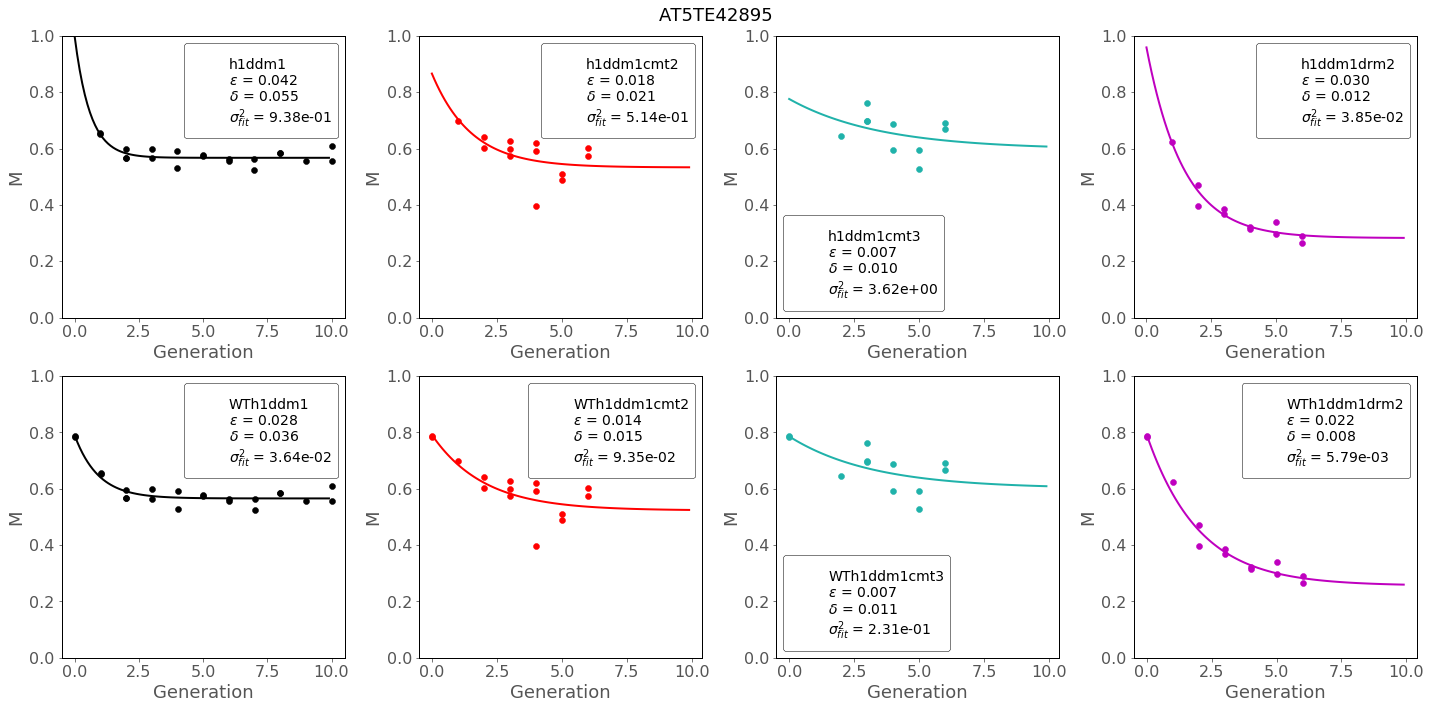

In [67]:
# plot methylation data for specific IDs... 

#selected_ID = 'AT1TE28175'
#selected_ID = 'AT1TE28830'
#selected_ID = 'AT1TE29570'
#selected_ID = 'AT1TE30195'

#selected_ID = "AT4TE13485"

###selected_ID = 'AT4TE16390'

#selected_ID = 'AT4TE17765'
########selected_ID = 'AT1TE19130'

##selected_ID = 'AT1TE43910'


selected_ID_list = TE_h1ddm1_fits_df.loc[(TE_h1ddm1_fits_df['err_min_size'] < 1)].sort_values(by=['delta'],ascending=True).index.tolist()
selected_ID = selected_ID_list[-3]

gen_number_array_temp = [[gen_number_h1ddm1, gen_number_h1ddm1cmt2,gen_number_h1ddm1cmt3,gen_number_h1ddm1drm2],
                              [gen_number_WTh1ddm1, gen_number_WTh1ddm1cmt2,gen_number_WTh1ddm1cmt3,gen_number_WTh1ddm1drm2]]
TE_all_mutant_df_array_temp = [[TE_all_h1ddm1_df, TE_all_h1ddm1cmt2_df,TE_all_h1ddm1cmt3_df,TE_all_h1ddm1drm2_df],
                              [TE_all_WTh1ddm1_df, TE_all_WTh1ddm1cmt2_df,TE_all_WTh1ddm1cmt3_df,TE_all_WTh1ddm1drm2_df]]
TE_mutant_fits_df_array_temp = [[TE_h1ddm1_fits_df, TE_h1ddm1cmt2_fits_df,TE_h1ddm1cmt3_fits_df,TE_h1ddm1drm2_fits_df],
                              [TE_WTh1ddm1_fits_df, TE_WTh1ddm1cmt2_fits_df,TE_WTh1ddm1cmt3_fits_df,TE_WTh1ddm1drm2_fits_df]]
mutant_label_array_temp = [['h1ddm1','h1ddm1cmt2','h1ddm1cmt3','h1ddm1drm2'],
                              ['WTh1ddm1','WTh1ddm1cmt2','WTh1ddm1cmt3','WTh1ddm1drm2']]
color_label = ['k','r','lightseagreen','m']

fig, ax = plt.subplots(2,4,figsize=(20,10))

for i_x in range(4):
    for i_y in range(2):

        gen_number_mutant = gen_number_array_temp[i_y][i_x]
        TE_all_mutant_df = TE_all_mutant_df_array_temp[i_y][i_x]
        TE_mutant_fits_df = TE_mutant_fits_df_array_temp[i_y][i_x]
        mutant_label = mutant_label_array_temp[i_y][i_x]

        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')


        ax[i_y,i_x].scatter(gen_number_mutant, TE_all_mutant_df.loc[selected_ID,:].tolist(), 
                color=color_label[i_x], label= '\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.2e' 
                   % (mutant_label,TE_mutant_fits_df.loc[selected_ID,'epsilon'],
                      TE_mutant_fits_df.loc[selected_ID,'delta'],
                     TE_mutant_fits_df.loc[selected_ID,'tot_err_est'])  )


        ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_mutant_fits_df.loc[selected_ID,'M_0_fit'], 
                                              TE_mutant_fits_df.loc[selected_ID,'B_fit'], 
                                                TE_mutant_fits_df.loc[selected_ID,'M_star_fit']) 
                                     for i_ in np.arange(0,10,0.1)],linewidth=2, color=color_label[i_x])



        ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
        ax[i_y,i_x].set_ylabel('M', fontsize=18)
        ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

        leg_00 = ax[i_y,i_x].legend(fontsize=14, markerscale=0, ncol=1,facecolor='white', framealpha=1)
        leg_00.get_frame().set_edgecolor('k')

        ax[i_y,i_x].set_ylim([0,1])

fig.suptitle(selected_ID, fontsize=18)
        
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()
fig.savefig("Fig4.png")

In [68]:
selected_ID = 'AT4TE16390'
print(TE_h1ddm1drm2_fits_df.loc[selected_ID,:] )

M_0_fit                2.254616e-09
M_0_fit_err            3.812059e+00
B_fit                  2.187291e+00
B_fit_err              2.873579e+01
M_star_fit             1.318600e-01
M_star_fit_err         2.221278e-02
B_M_star_cov          -3.266888e-01
M_star_M_0_cov         3.928445e-02
M_0_B_cov             -1.083960e+02
tot_err_est            8.402778e+02
err_min_size           1.000000e+02
delta                  1.696566e-02
delta_err              2.214392e-01
epsilon                1.116985e-01
epsilon_err            1.468917e+00
d_plus_e               1.286642e-01
d_plus_e_err           1.690340e+00
WT1_xval                        NaN
WT1_xval_err                    NaN
WT2_xval                        NaN
WT2_xval_err                    NaN
relative_delta         1.319820e+00
relative_epsilon       2.778134e-01
relative_B_fit         1.740514e+00
relative_M_star_fit    7.582932e-01
Name: AT4TE16390, dtype: float64


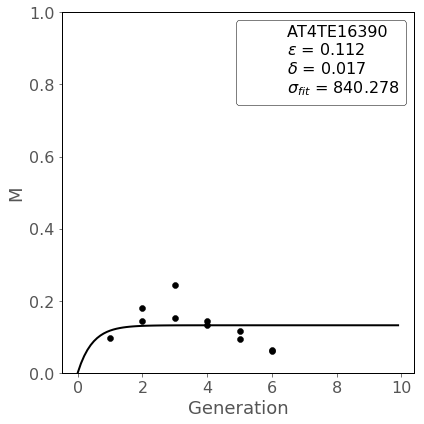

In [69]:
# plot methylation data for specific IDs... 


selected_ID = 'AT4TE16390'


fig, ax = plt.subplots(1,1,figsize=(6.0,6.0))

for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')

ax.set_facecolor('white')


ax.scatter(gen_number_h1ddm1drm2, TE_all_h1ddm1drm2_df.loc[selected_ID,:].tolist(), 
        color='k', label= '%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma_{fit}$ = %.3f' 
           % (selected_ID,TE_h1ddm1drm2_fits_df.loc[selected_ID,'epsilon'],
              TE_h1ddm1drm2_fits_df.loc[selected_ID,'delta'],
             TE_h1ddm1drm2_fits_df.loc[selected_ID,'tot_err_est'])  )


ax.plot( np.arange(0,10,0.1),  [exp_func(i_, TE_h1ddm1drm2_fits_df.loc[selected_ID,'M_0_fit'], 
                                      TE_h1ddm1drm2_fits_df.loc[selected_ID,'B_fit'], 
                                        TE_h1ddm1drm2_fits_df.loc[selected_ID,'M_star_fit']) 
                             for i_ in np.arange(0,10,0.1)],linewidth=2, color='k')
        


ax.set_xlabel('Generation', fontsize=18)
ax.set_ylabel('M', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax.legend(fontsize=16, markerscale=0, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

ax.set_ylim([0,1])

plt.tight_layout()
plt.show()
fig.savefig("Fig5.png")

1617
30 0
[['AT4TE14990' 'AT1TE49570' 'AT1TE49540' 'AT1TE50260' 'AT1TE49510'
  'AT1TE50220']
 ['AT1TE50615' 'AT1TE49480' 'AT1TE49845' 'AT1TE50145' 'AT1TE49425'
  'AT1TE50105']
 ['AT2TE21480' 'AT1TE50860' 'AT1TE44690' 'AT1TE50650' 'AT3TE62025'
  'AT1TE50685']
 ['AT1TE50495' 'AT4TE18330' 'AT4TE16565' 'AT2TE21450' 'AT1TE50250'
  'AT1TE49850']
 ['AT1TE50575' 'AT1TE47720' 'AT1TE50020' 'AT1TE49715' 'AT1TE50175'
  'AT4TE14895']]


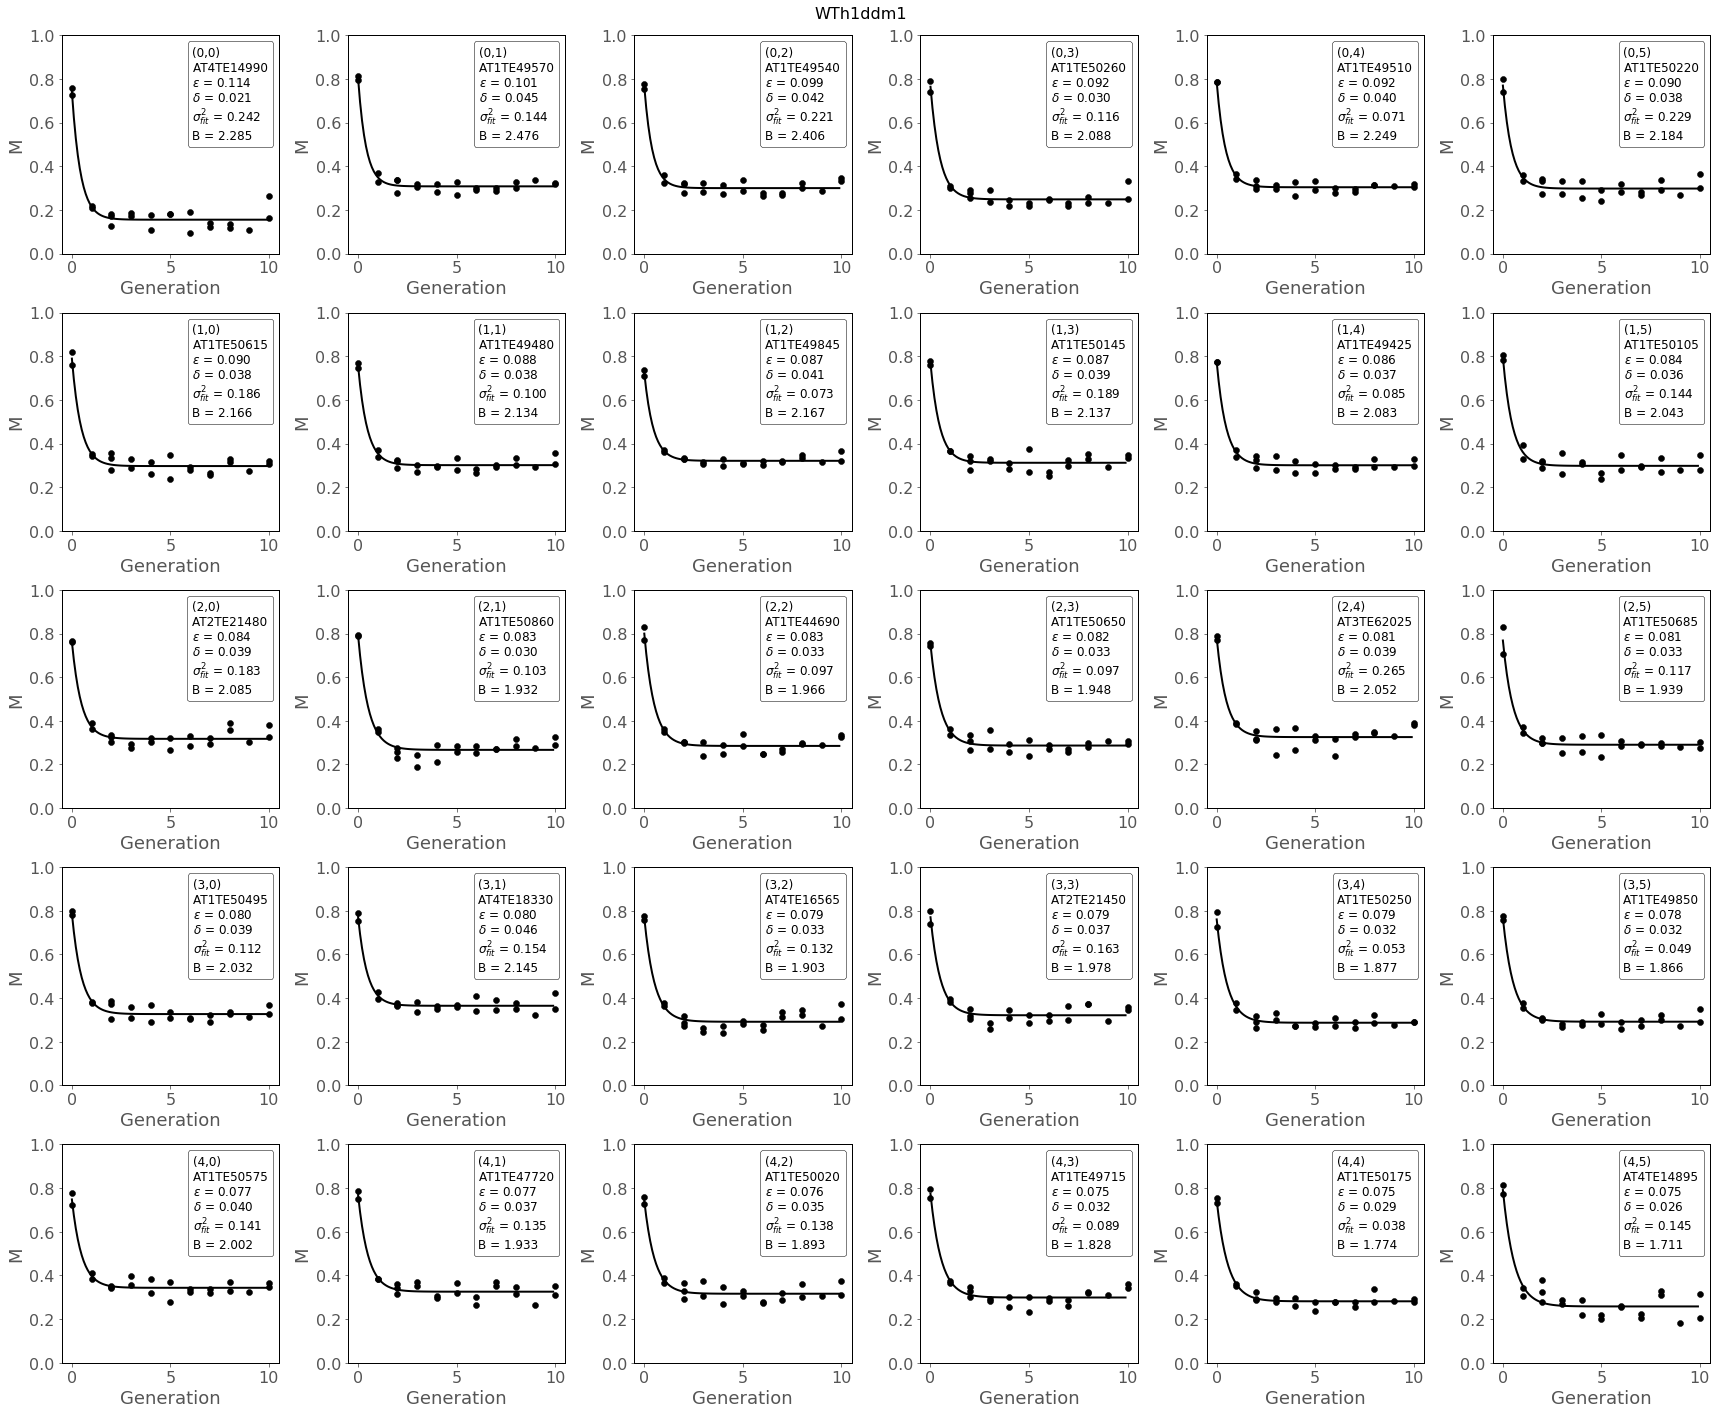

In [70]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1'
line_col = 'k'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

#print(TE_WTh1ddm1_fits_df.loc[(TE_WTh1ddm1_fits_df['err_min_size'] < 1)].sort_values(by=['delta'],ascending=True).head())

selected_ID_list = TE_WTh1ddm1_fits_df.loc[(TE_WTh1ddm1_fits_df['err_min_size'] < 1)].sort_values(by=['epsilon'],ascending=False).index.tolist()
print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
print(len(selected_ID_list), ID_set*N_x*N_y)
selected_ID_list.extend( [selected_ID_list[-1]]*(30-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')


        ax[i_y,i_x].scatter(gen_number_WTh1ddm1, TE_all_WTh1ddm1_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                   % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                      TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'delta'],
                     TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                     TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


        ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                              TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                     for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



        ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
        ax[i_y,i_x].set_ylabel('M', fontsize=18)
        ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

        leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
        leg_00.get_frame().set_edgecolor('k')

        ax[i_y,i_x].set_ylim([0,1])
        
fig.suptitle(mutant, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid"+".png")

In [71]:
# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1_df

#print(TE_all_WTh1ddm1_df.head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].mean(axis=1).head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1).head())

selected_ID_list = TE_WTh1ddm1_fits_df.loc[(TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].mean(axis=1) <= 
                                            TE_all_WTh1ddm1_df[['h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1))].index.tolist()
print(selected_ID_list)

['AT1TE71775', 'AT1TE71950', 'AT2TE00010', 'AT4TE14895', 'AT4TE18560', 'AT4TE18605', 'AT4TE19055']


In [72]:
print(TE_all_WTh1ddm1_df.loc['AT1TE71950'])

wt_f3_1         0.895257
wt_f4_1         0.868595
h1ddm1_f2_1     0.682170
h1ddm1_f2_2     0.000000
h1ddm1_f3_1     0.337813
h1ddm1_f3_2     0.367470
h1ddm1_f3_3     0.666667
h1ddm1_f4_1     0.338718
h1ddm1_f4_2     0.266263
h1ddm1_f5_1     0.214256
h1ddm1_f5_2     0.165615
h1ddm1_f6_1     0.323640
h1ddm1_f6_2     0.235008
h1ddm1_f7_1     0.126764
h1ddm1_f7_2     0.181390
h1ddm1_f8_1     0.161992
h1ddm1_f8_2     0.158160
h1ddm1_f9_1     0.138546
h1ddm1_f9_2     0.128836
h1ddm1_f10_1    0.090456
h1ddm1_f11_1    0.093581
h1ddm1_f11_2    0.104521
Name: AT1TE71950, dtype: float64


['AT1TE71775', 'AT1TE71950', 'AT2TE00010', 'AT4TE14895', 'AT4TE18560', 'AT4TE18605', 'AT4TE19055']
7
[['AT1TE71775' 'AT1TE71950' 'AT2TE00010' 'AT4TE14895' 'AT4TE18560'
  'AT4TE18605']
 ['AT4TE19055' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']]


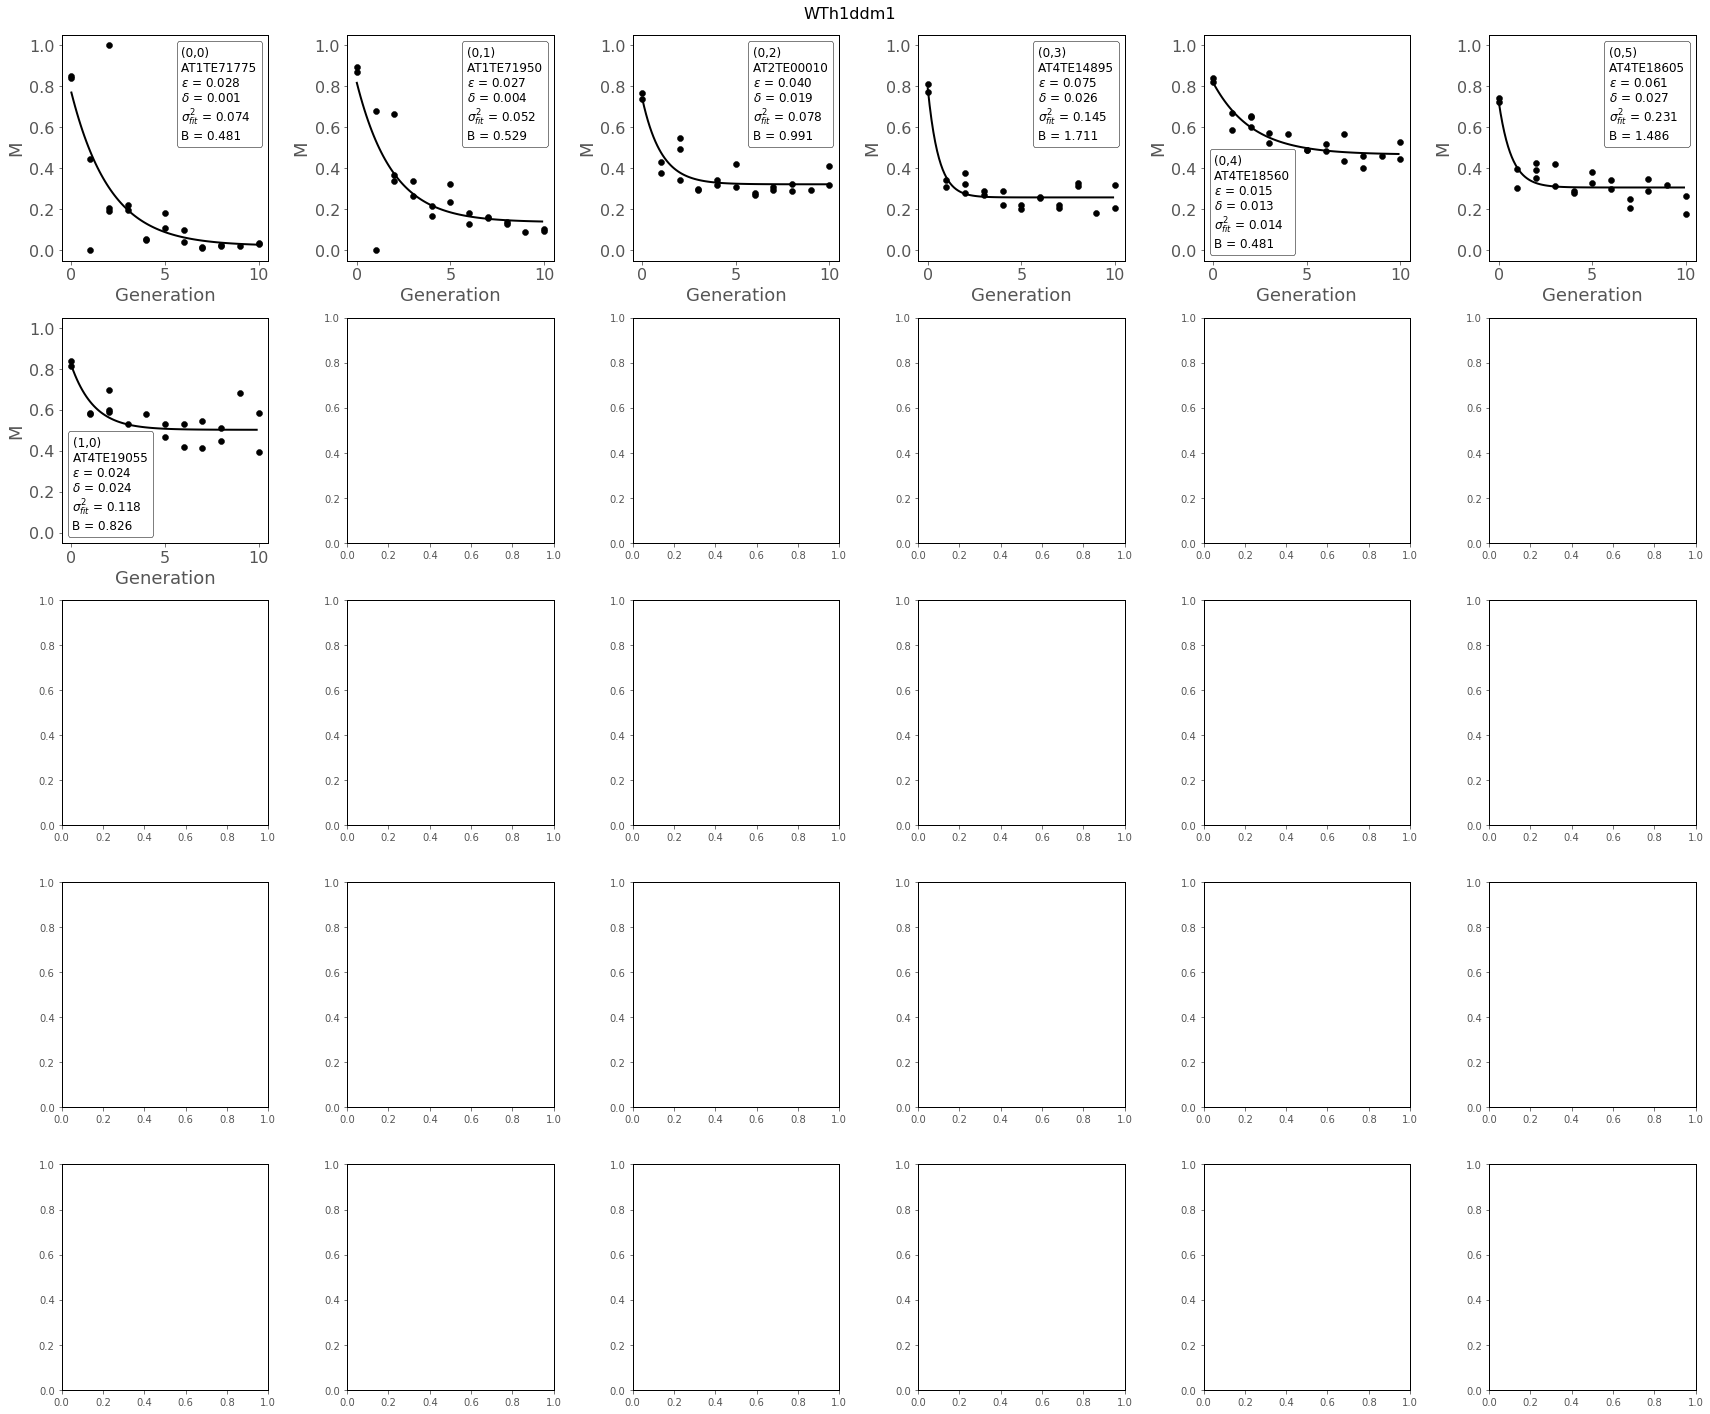

In [73]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1'
line_col = 'k'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1_df

#print(TE_all_WTh1ddm1_df.head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].mean(axis=1).head())
#print(TE_all_WTh1ddm1_df[['h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1).head())

selected_ID_list = TE_WTh1ddm1_fits_df.loc[ ((TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2']].mean(axis=1) <= 
                                            TE_all_WTh1ddm1_df[['h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1))) &
                                          (TE_WTh1ddm1_fits_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)

print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1, TE_all_WTh1ddm1_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1_fits_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2ltF3_WTh1ddm1"+".png")

In [74]:
print(TE_all_WTh1ddm1cmt2_df.head())

             wt_f3_1   wt_f4_1  h1ddm1cmt2_f2_1  h1ddm1cmt2_f3_1  \
ID                                                                 
AT1TE08240  0.847934  0.870149         0.786498         0.697917   
AT1TE09080  0.854895  0.838132         0.600238         0.536296   
AT1TE12295  0.823329  0.822638         0.730022         0.630189   
AT1TE14085  0.849762  0.820555         0.605494         0.350022   
AT1TE15170  0.770115  0.812825         0.720490         0.600760   

            h1ddm1cmt2_f3_2  h1ddm1cmt2_f4_1  h1ddm1cmt2_f4_2  \
ID                                                              
AT1TE08240         0.679619         0.633843         0.658524   
AT1TE09080         0.531321         0.490884         0.523163   
AT1TE12295         0.648321         0.582567         0.570238   
AT1TE14085         0.488060         0.333469         0.321084   
AT1TE15170         0.618905         0.573072         0.586229   

            h1ddm1cmt2_f4_3  h1ddm1cmt2_f5_1  h1ddm1cmt2_f5_2  \
ID

['AT1TE46770', 'AT1TE56505', 'AT2TE11400', 'AT3TE47875', 'AT4TE18755']
5
[['AT1TE46770' 'AT1TE56505' 'AT2TE11400' 'AT3TE47875' 'AT4TE18755' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']]


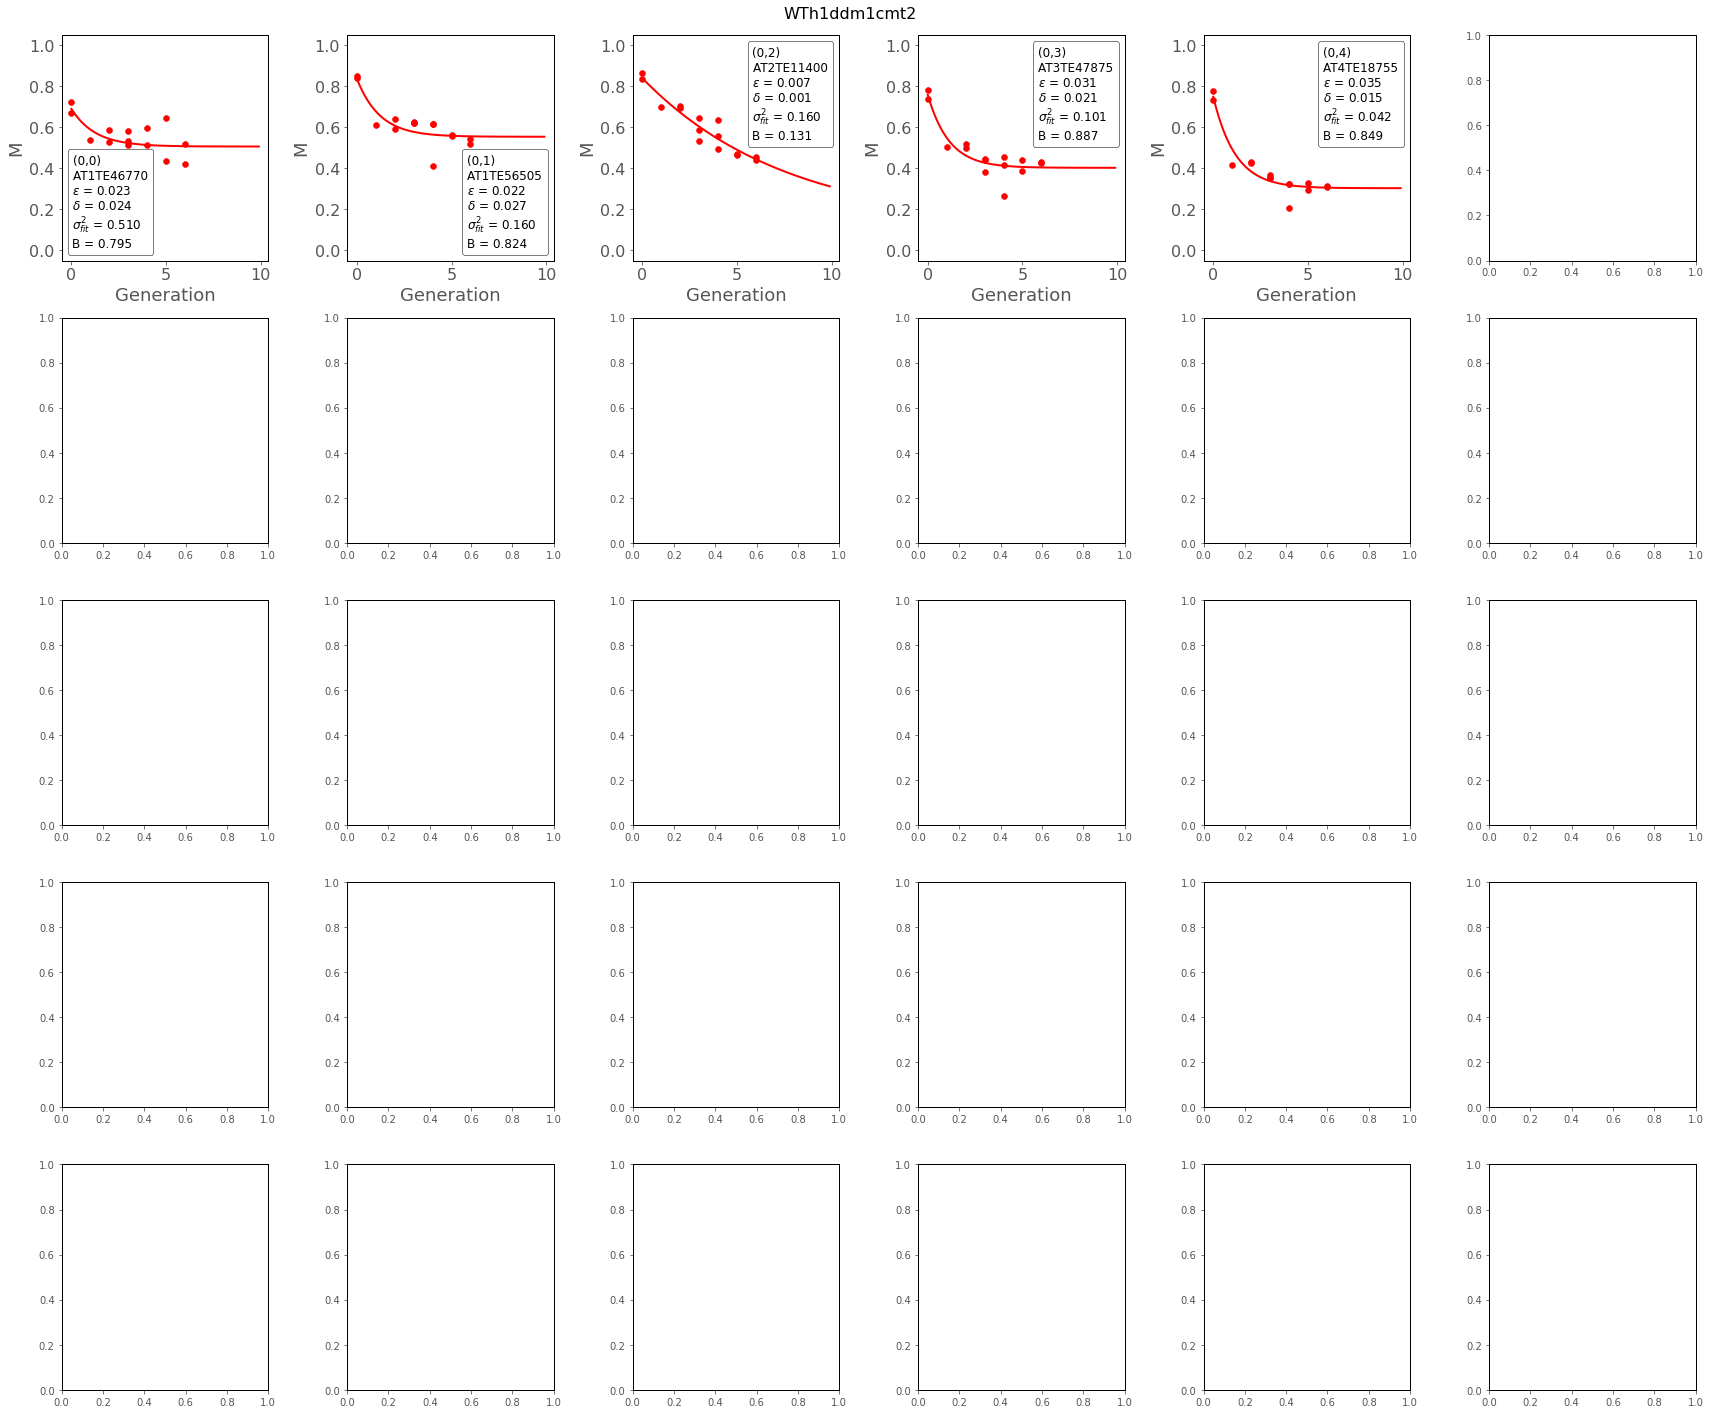

In [75]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1cmt2'
line_col = 'r'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1cmt2_df

#print(TE_all_WTh1ddm1cmt2_df.head())

selected_ID_list = TE_WTh1ddm1cmt2_fits_df.loc[ ((TE_all_WTh1ddm1cmt2_df[['h1ddm1cmt2_f2_1']].mean(axis=1) <= 
                                            TE_all_WTh1ddm1cmt2_df[['h1ddm1cmt2_f3_1','h1ddm1cmt2_f3_2']].mean(axis=1))) &
                                          (TE_WTh1ddm1cmt2_fits_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)

print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1cmt2, TE_all_WTh1ddm1cmt2_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2ltF3_WTh1ddm1cmt2"+".png")

In [76]:
print(TE_all_WTh1ddm1cmt3_df.head())

             wt_f3_1   wt_f4_1  h1ddm1cmt3_f3_1  h1ddm1cmt3_f4_1  \
ID                                                                 
AT1TE08240  0.847934  0.870149         0.597052         0.661631   
AT1TE09080  0.854895  0.838132         0.562819         0.425865   
AT1TE12295  0.823329  0.822638         0.462947         0.458365   
AT1TE14085  0.849762  0.820555         0.301418         0.318681   
AT1TE15170  0.770115  0.812825         0.535797         0.567164   

            h1ddm1cmt3_f4_2  h1ddm1cmt3_f4_3  h1ddm1cmt3_f5_1  \
ID                                                              
AT1TE08240         0.546358         0.565114         0.500750   
AT1TE09080         0.442871         0.477162         0.368583   
AT1TE12295         0.393750         0.468274         0.367239   
AT1TE14085         0.248494         0.255420         0.250563   
AT1TE15170         0.529197         0.495238         0.369091   

            h1ddm1cmt3_f5_2  h1ddm1cmt3_f6_1  h1ddm1cmt3_f6_2  \
ID

['AT1TE38210', 'AT1TE39515', 'AT1TE42395', 'AT1TE43605', 'AT1TE45360', 'AT1TE46685', 'AT1TE46765', 'AT1TE46770', 'AT1TE47340', 'AT1TE47605', 'AT1TE48735', 'AT1TE49955', 'AT1TE55000', 'AT1TE70805', 'AT1TE76620', 'AT2TE06885', 'AT2TE06955', 'AT2TE08385', 'AT2TE08785', 'AT2TE09360', 'AT2TE10500', 'AT2TE10915', 'AT2TE10965', 'AT2TE11500', 'AT2TE11770', 'AT2TE13635', 'AT2TE15655', 'AT2TE15880', 'AT2TE15995', 'AT2TE16190', 'AT2TE16530', 'AT2TE16580', 'AT2TE16635', 'AT2TE16660', 'AT2TE16695', 'AT2TE16865', 'AT2TE16890', 'AT2TE17110', 'AT2TE17380', 'AT2TE17420', 'AT2TE17565', 'AT2TE17610', 'AT2TE18410', 'AT2TE18415', 'AT2TE19240', 'AT2TE19445', 'AT2TE19590', 'AT2TE19615', 'AT2TE19850', 'AT2TE20140', 'AT2TE20260', 'AT2TE20445', 'AT2TE20835', 'AT2TE21025', 'AT2TE21440', 'AT2TE21750', 'AT2TE22335', 'AT2TE23120', 'AT2TE23180', 'AT2TE24335', 'AT2TE24460', 'AT2TE26315', 'AT2TE28325', 'AT2TE32120', 'AT2TE34410', 'AT2TE37050', 'AT2TE42810', 'AT2TE69630', 'AT3TE20780', 'AT3TE22200', 'AT3TE38565', 'AT3T

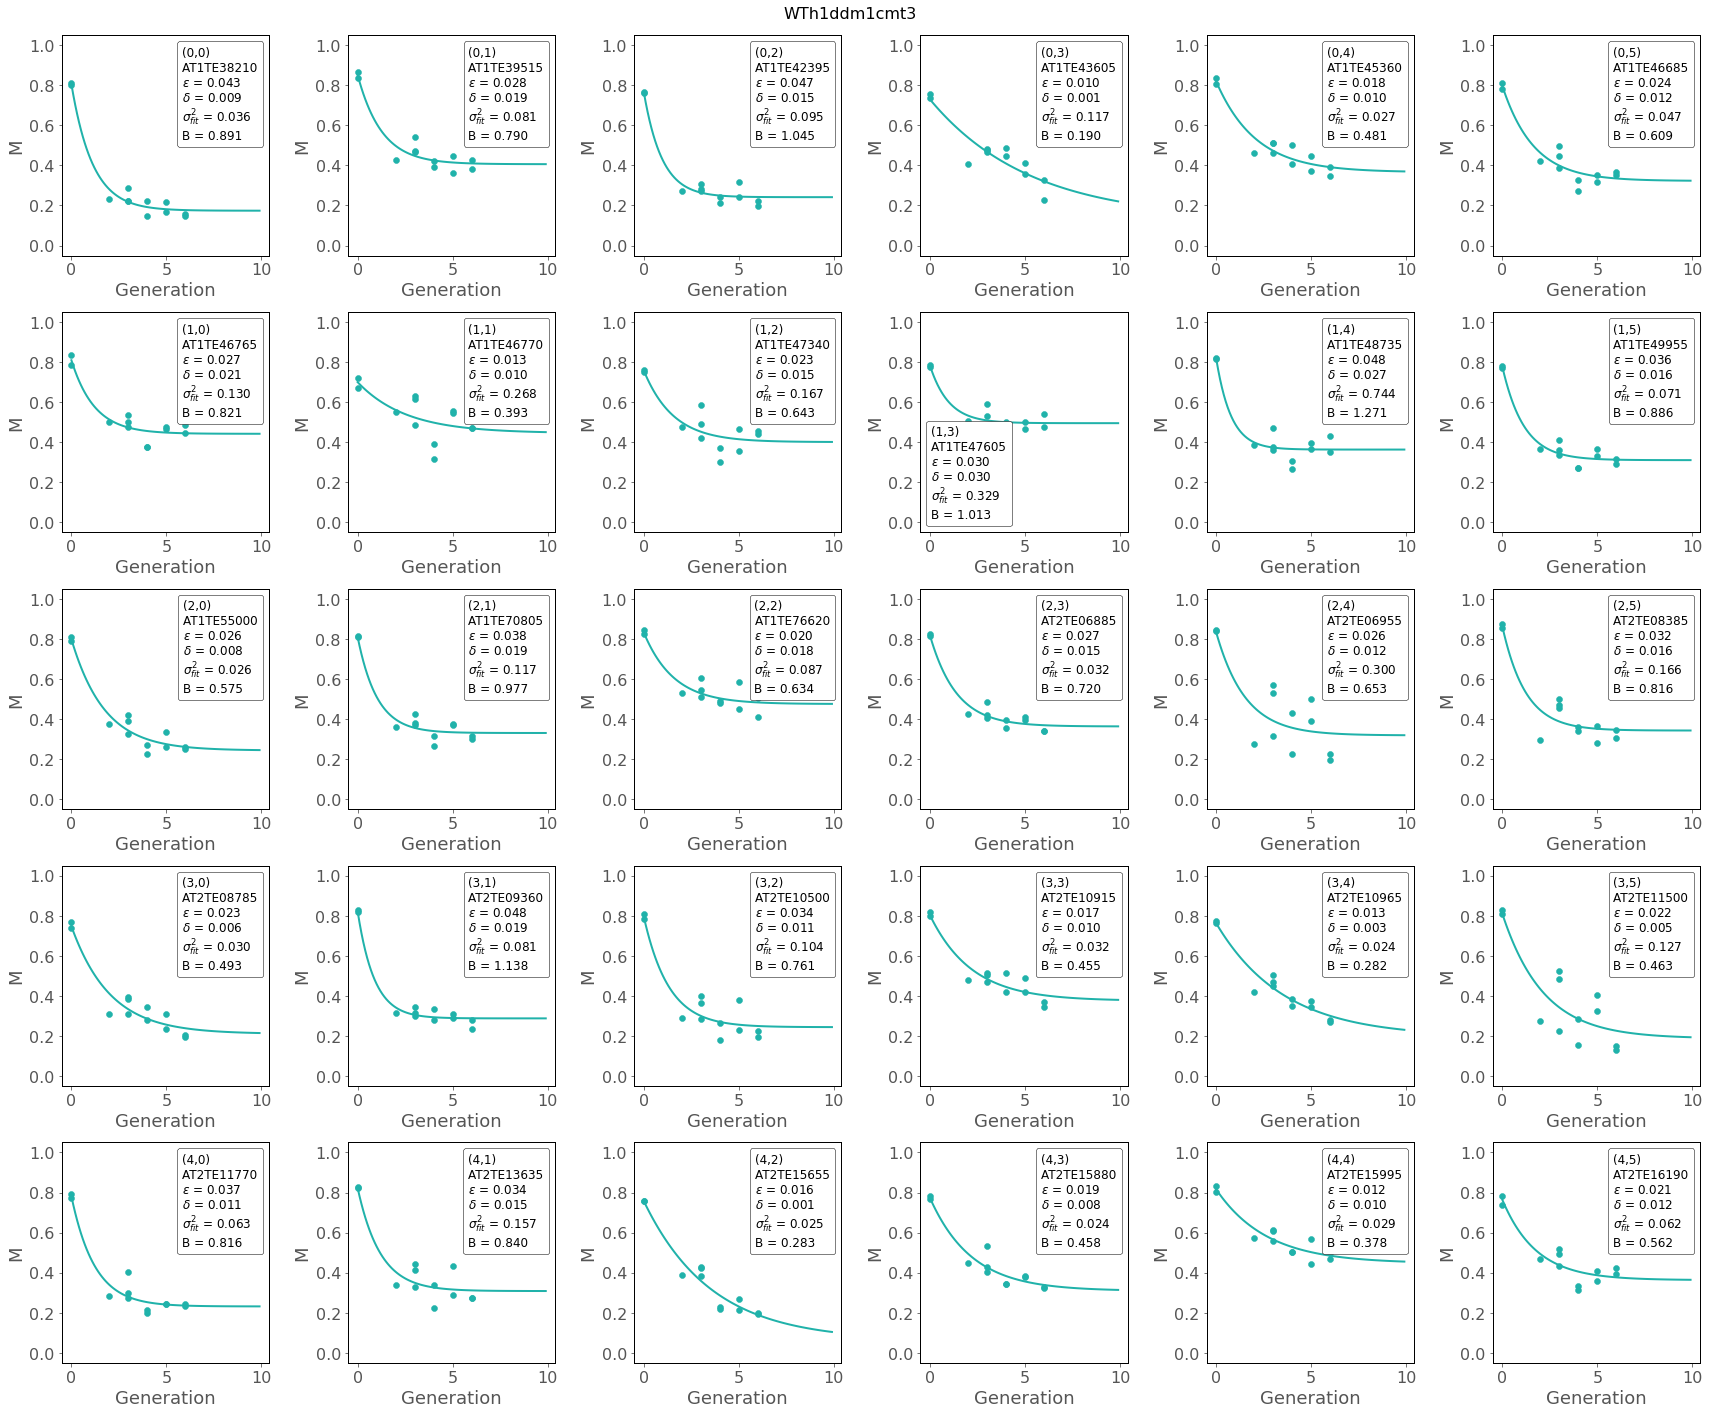

In [77]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1cmt3'
line_col = 'lightseagreen'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1cmt3_df

#print(TE_all_WTh1ddm1cmt3_df.head())

selected_ID_list = TE_WTh1ddm1cmt3_fits_df.loc[ ((TE_all_WTh1ddm1cmt3_df[['h1ddm1cmt3_f3_1']].mean(axis=1) <= 
                                            TE_all_WTh1ddm1cmt3_df[['h1ddm1cmt3_f4_1','h1ddm1cmt3_f4_2','h1ddm1cmt3_f4_3']].mean(axis=1))) &
                                          (TE_WTh1ddm1cmt3_fits_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)

print(len(selected_ID_list), (ID_set+1)*N_x*N_y)
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1cmt3, TE_all_WTh1ddm1cmt3_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2ltF3_WTh1ddm1cmt3"+".png")

['AT4TE14990']
1
[['AT4TE14990' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']]


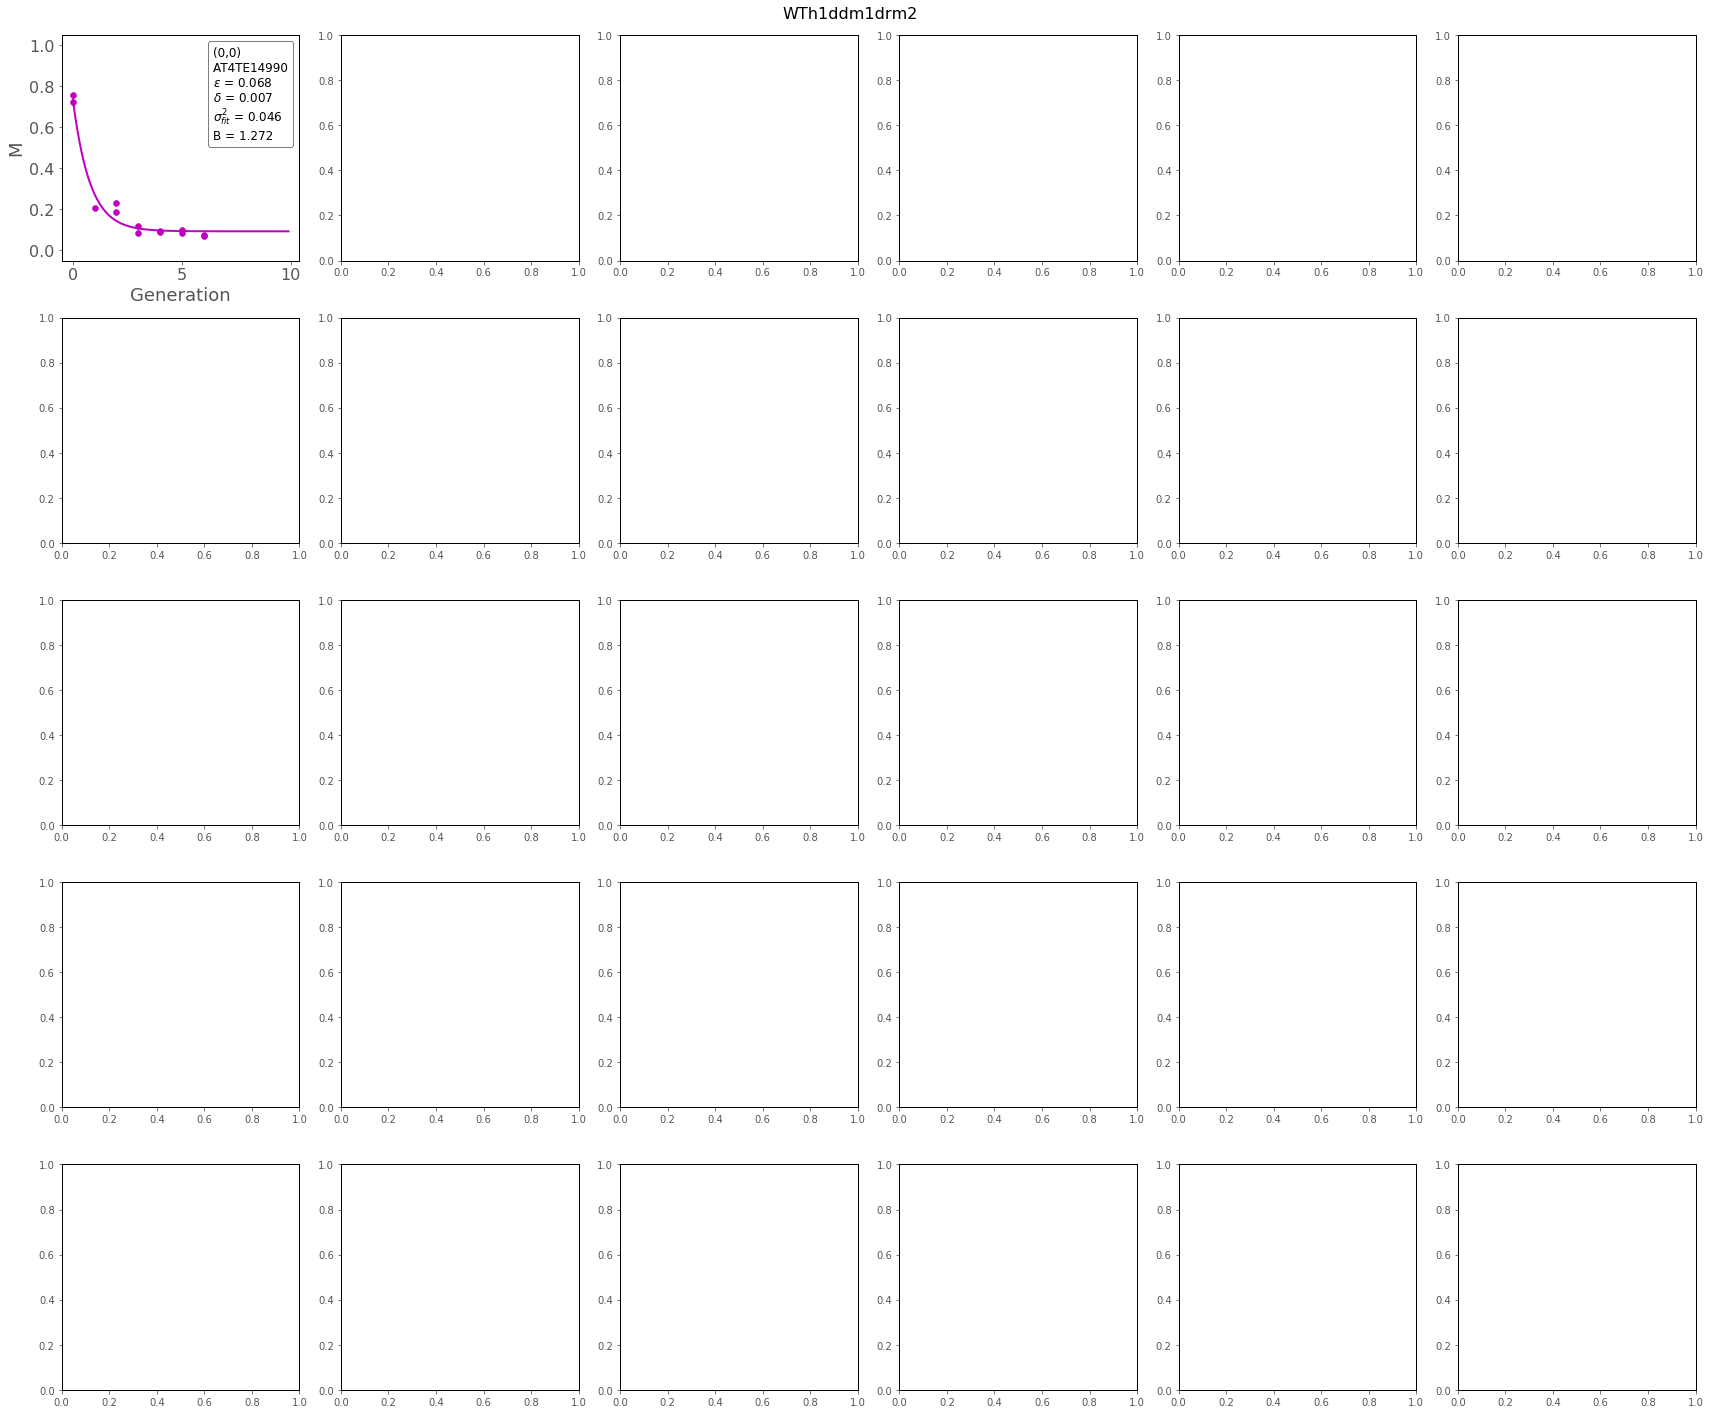

In [78]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1drm2'
line_col = 'm'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1drm2_df

#print(TE_all_WTh1ddm1drm2_df.head())

selected_ID_list = TE_WTh1ddm1drm2_fits_df.loc[ ((TE_all_WTh1ddm1drm2_df[['h1ddm1drm2_f2_1']].mean(axis=1) <= 
                                            TE_all_WTh1ddm1drm2_df[['h1ddm1drm2_f3_1','h1ddm1drm2_f3_2']].mean(axis=1))) &
                                          (TE_WTh1ddm1drm2_fits_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)

print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1drm2, TE_all_WTh1ddm1drm2_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant, fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2ltF3_WTh1ddm1drm2"+".png")

['AT1TE47750', 'AT1TE50365', 'AT1TE51825', 'AT1TE52125', 'AT1TE52740', 'AT2TE12425', 'AT2TE19555', 'AT2TE21455', 'AT2TE23670', 'AT2TE24385', 'AT3TE50655', 'AT3TE50660', 'AT3TE54185', 'AT3TE54985', 'AT3TE57355', 'AT3TE57360', 'AT4TE10185', 'AT4TE17100', 'AT4TE17765', 'AT4TE18165', 'AT4TE19030', 'AT5TE32880', 'AT5TE37665', 'AT5TE40575', 'AT5TE40830', 'AT5TE42355', 'AT5TE43300', 'AT5TE43980', 'AT5TE47105', 'AT5TE47500', 'AT5TE47515']
31
[['AT1TE47750' 'AT1TE50365' 'AT1TE51825' 'AT1TE52125' 'AT1TE52740'
  'AT2TE12425']
 ['AT2TE19555' 'AT2TE21455' 'AT2TE23670' 'AT2TE24385' 'AT3TE50655'
  'AT3TE50660']
 ['AT3TE54185' 'AT3TE54985' 'AT3TE57355' 'AT3TE57360' 'AT4TE10185'
  'AT4TE17100']
 ['AT4TE17765' 'AT4TE18165' 'AT4TE19030' 'AT5TE32880' 'AT5TE37665'
  'AT5TE40575']
 ['AT5TE40830' 'AT5TE42355' 'AT5TE43300' 'AT5TE43980' 'AT5TE47105'
  'AT5TE47500']]


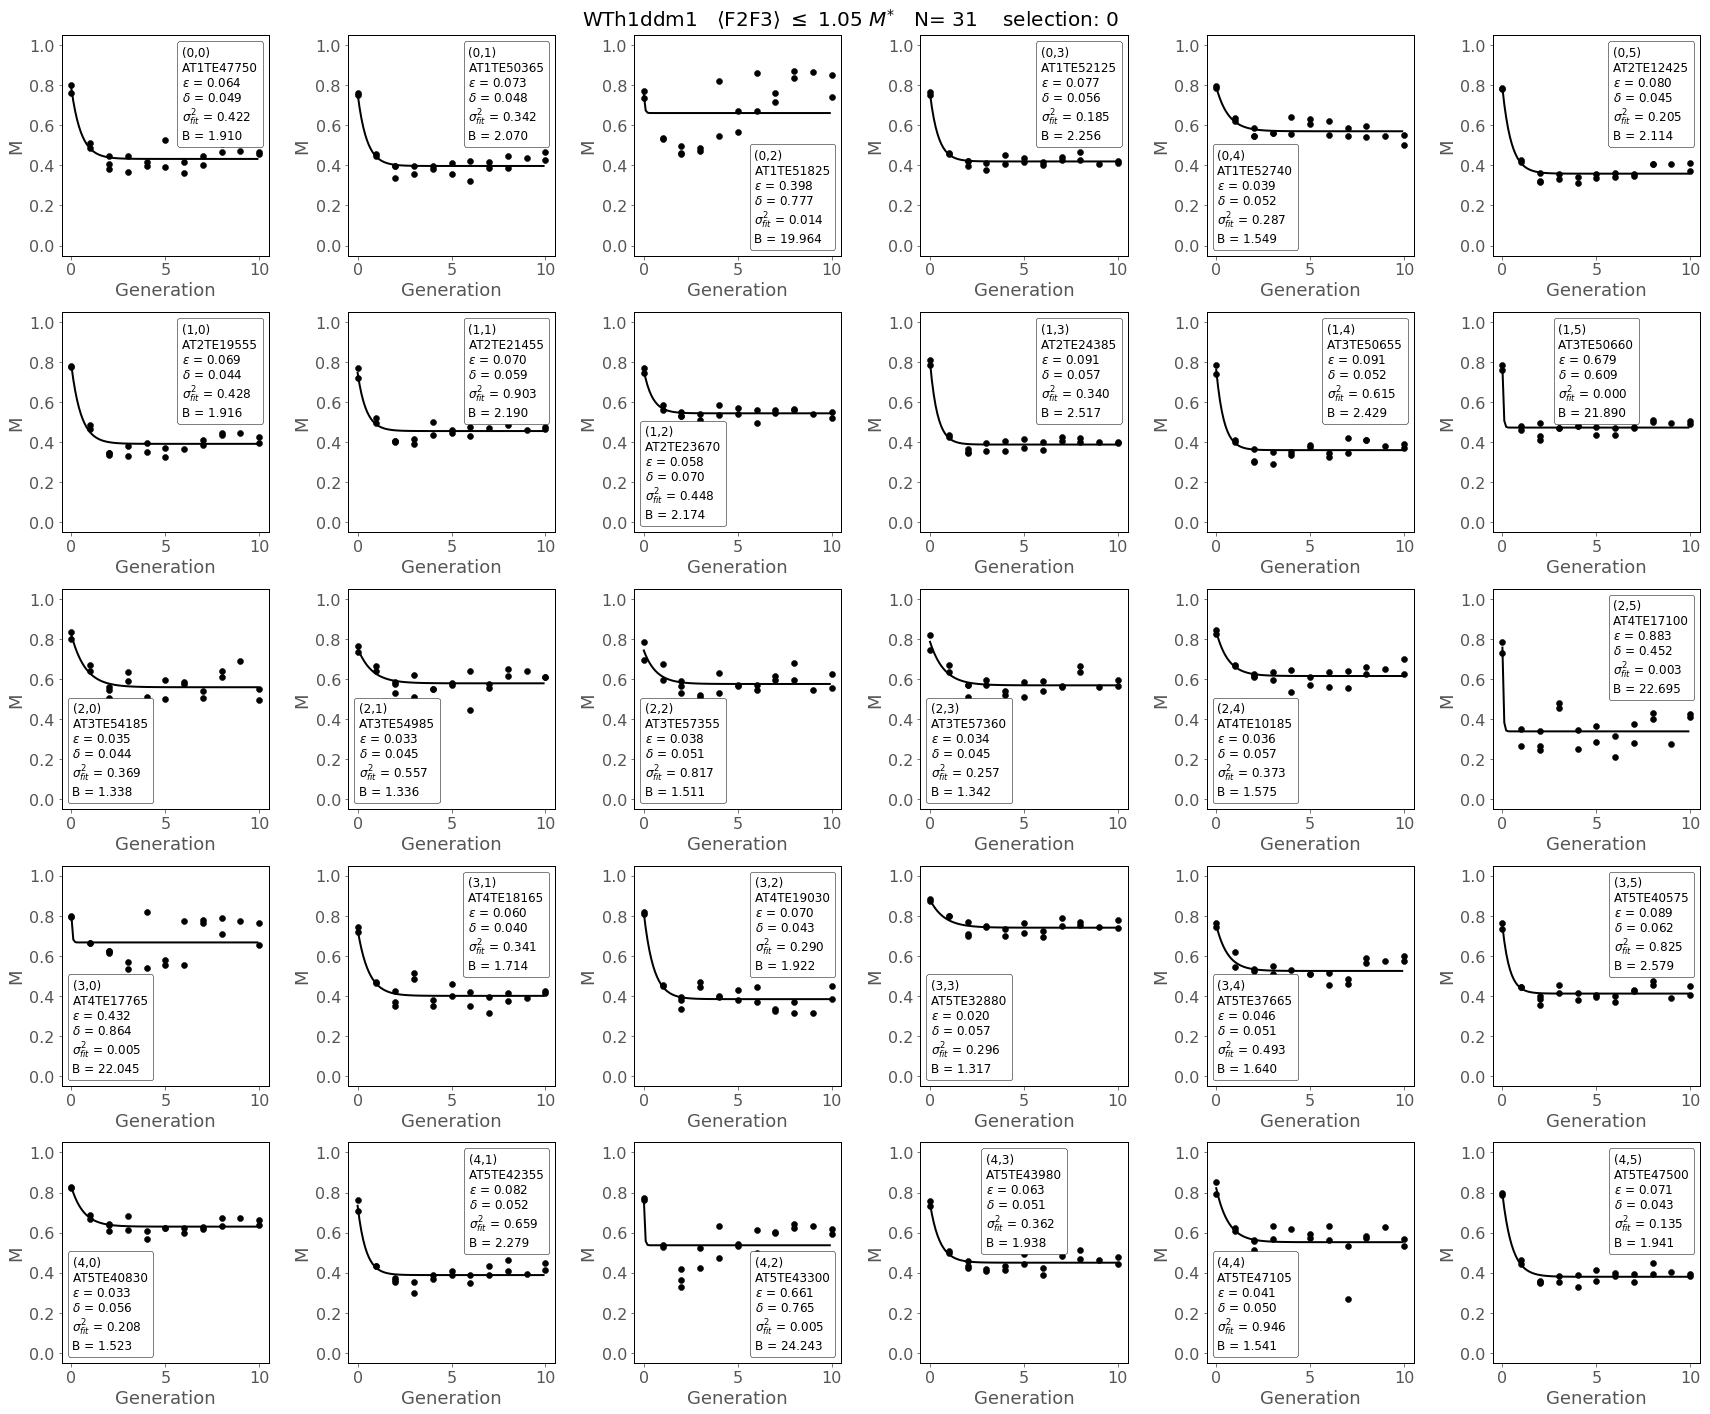

In [91]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1'
line_col = 'k'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1_df

#print(TE_all_WTh1ddm1_df.head())

selected_ID_list = TE_WTh1ddm1_fits_whole_df.loc[ ((TE_all_WTh1ddm1_df[['h1ddm1_f2_1','h1ddm1_f2_2','h1ddm1_f3_1','h1ddm1_f3_2','h1ddm1_f3_3']].mean(axis=1) <= 
                                            TE_WTh1ddm1_fits_whole_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1_fits_whole_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)
selected_ID_list_flat = selected_ID_list.copy()
total_IDs = len(selected_ID_list)
print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1, TE_all_WTh1ddm1_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant+'   '+'$\langle$F2F3$\\rangle$ $\leq$ %.2f $M^{*}$   N= %d    selection: %d' % (steadystate_thresh,total_IDs,ID_set), fontsize=20)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2F3ltMstar_WTh1ddm1"+".png")

In [87]:
# check syntax
print(TE_WTh1ddm1_fits_df.head())
print(TE_WTh1ddm1_fits_df.loc[['AT1TE08240']])

             M_0_fit  M_0_fit_err     B_fit  B_fit_err  M_star_fit  \
ID                                                                   
AT1TE08240  0.867240     0.021443  0.788985   0.122600    0.546217   
AT1TE09080  0.845935     0.015500  1.340958   0.155723    0.474721   
AT1TE12295  0.821972     0.018419  0.984006   0.140728    0.509544   
AT1TE14085  0.833958     0.030480  0.919860   0.115323    0.254534   
AT1TE15170  0.798507     0.025482  0.792128   0.185987    0.545937   

            M_star_fit_err  B_M_star_cov  M_star_M_0_cov  M_0_B_cov  \
ID                                                                    
AT1TE08240        0.009557      0.000696        0.000018   0.001039   
AT1TE09080        0.005819      0.000431        0.000003   0.000574   
AT1TE12295        0.007516      0.000571        0.000008   0.000859   
AT1TE14085        0.012737      0.000815        0.000025   0.001235   
AT1TE15170        0.011336      0.001250        0.000025   0.001869   

           

In [92]:
# double check that none of the list of TEs to manually exclude are still in the final df
print(TE_WTh1ddm1_fits_df.loc[selected_ID_list_flat])

KeyError: "None of [['AT1TE47750', 'AT1TE50365', 'AT1TE51825', 'AT1TE52125', 'AT1TE52740', 'AT2TE12425', 'AT2TE19555', 'AT2TE21455', 'AT2TE23670', 'AT2TE24385', 'AT3TE50655', 'AT3TE50660', 'AT3TE54185', 'AT3TE54985', 'AT3TE57355', 'AT3TE57360', 'AT4TE10185', 'AT4TE17100', 'AT4TE17765', 'AT4TE18165', 'AT4TE19030', 'AT5TE32880', 'AT5TE37665', 'AT5TE40575', 'AT5TE40830', 'AT5TE42355', 'AT5TE43300', 'AT5TE43980', 'AT5TE47105', 'AT5TE47500', 'AT5TE47515']] are in the [index]"

['AT3TE57360', 'AT4TE19780', 'AT5TE40310']
3
[['AT3TE57360' 'AT4TE19780' 'AT5TE40310' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']]


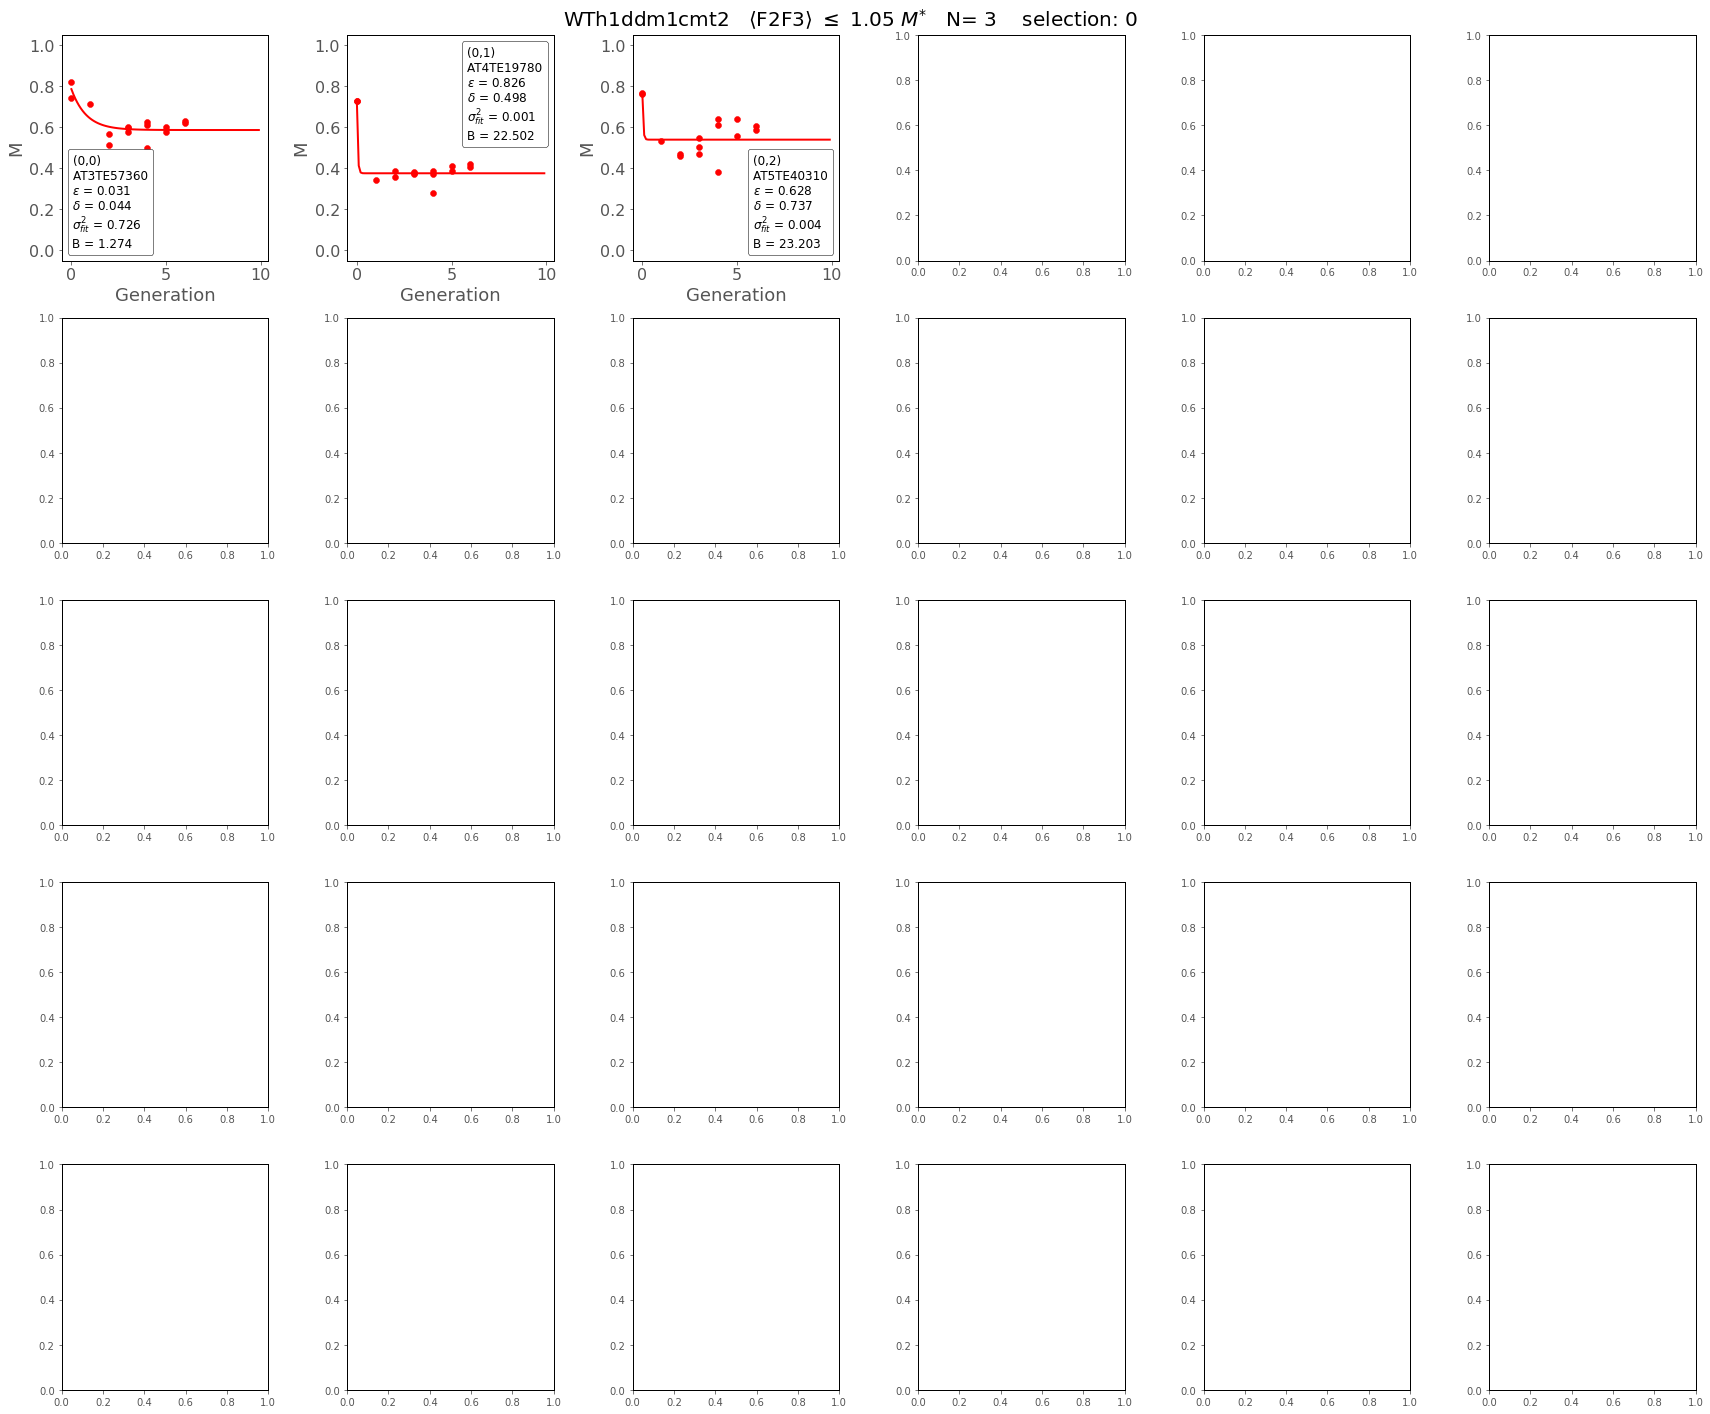

In [100]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1cmt2'
line_col = 'r'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1cmt2_df

#print(TE_all_WTh1ddm1cmt2_df.head())

selected_ID_list = TE_WTh1ddm1cmt2_fits_whole_df.loc[ ((TE_all_WTh1ddm1cmt2_df[['h1ddm1cmt2_f2_1','h1ddm1cmt2_f3_1','h1ddm1cmt2_f3_2']].mean(axis=1) <= 
                                            TE_WTh1ddm1cmt2_fits_whole_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1cmt2_fits_whole_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)
selected_ID_list_flat = selected_ID_list.copy()
total_IDs = len(selected_ID_list)
print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1cmt2, TE_all_WTh1ddm1cmt2_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1cmt2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant+'   '+'$\langle$F2F3$\\rangle$ $\leq$ %.2f $M^{*}$   N= %d    selection: %d' % (steadystate_thresh,total_IDs,ID_set), fontsize=20)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2F3ltMstar_WTh1ddm1cmt2"+".png")

In [101]:
# double check that none of the list of TEs to manually exclude are still in the final df
print(TE_WTh1ddm1cmt2_fits_df.loc[selected_ID_list_flat])

KeyError: "None of [['AT3TE57360', 'AT4TE19780', 'AT5TE40310']] are in the [index]"

['AT1TE25645', 'AT1TE36570', 'AT1TE41860', 'AT1TE43420', 'AT1TE44770', 'AT1TE44980', 'AT1TE46180', 'AT1TE46645', 'AT1TE51830', 'AT1TE52110', 'AT1TE52420', 'AT1TE52860', 'AT1TE52870', 'AT1TE52885', 'AT1TE52985', 'AT1TE56390', 'AT1TE64830', 'AT2TE11370', 'AT2TE12375', 'AT2TE12810', 'AT2TE16710', 'AT2TE16725', 'AT2TE17165', 'AT2TE19200', 'AT2TE19485', 'AT2TE22520', 'AT2TE26275', 'AT2TE27390', 'AT2TE27645', 'AT2TE27880', 'AT2TE29460', 'AT2TE78210', 'AT3TE47220', 'AT3TE51650', 'AT3TE52725', 'AT3TE52805', 'AT3TE53600', 'AT3TE53995', 'AT3TE57275', 'AT3TE60160', 'AT3TE61160', 'AT3TE62570', 'AT3TE63900', 'AT3TE64120', 'AT3TE64435', 'AT4TE09315', 'AT4TE09455', 'AT4TE15195', 'AT4TE16085', 'AT4TE16990', 'AT4TE17120', 'AT4TE20975', 'AT4TE22935', 'AT4TE54750', 'AT5TE39425', 'AT5TE40580', 'AT5TE41980', 'AT5TE44185', 'AT5TE45190', 'AT5TE47160', 'AT5TE50045', 'AT5TE63020', 'AT5TE72490']
63
[['AT1TE25645' 'AT1TE36570' 'AT1TE41860' 'AT1TE43420' 'AT1TE44770'
  'AT1TE44980']
 ['AT1TE46180' 'AT1TE46645' 'AT

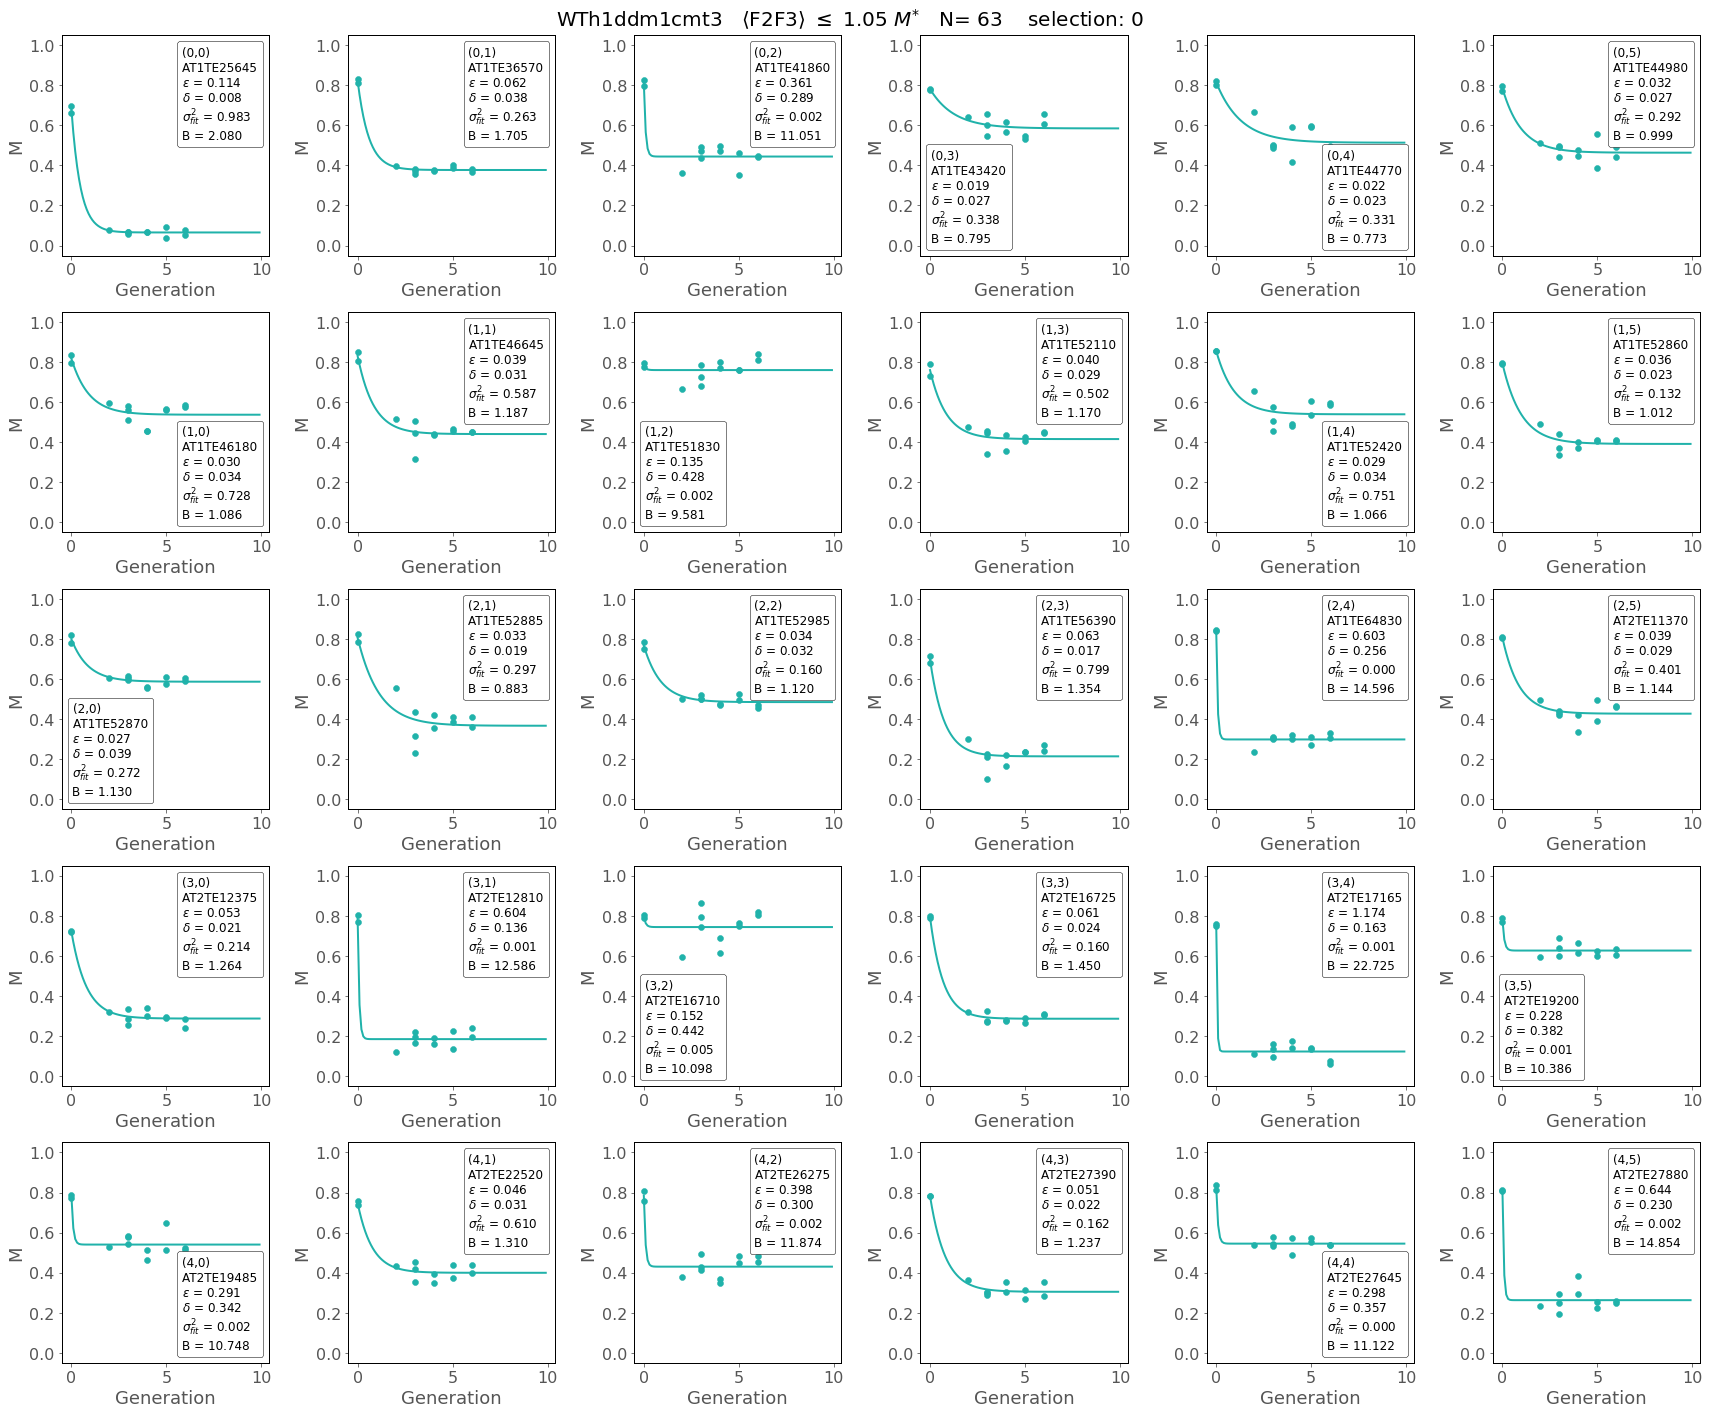

In [103]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1cmt3'
line_col = 'lightseagreen'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1cmt3_df

#print(TE_all_WTh1ddm1cmt3_df.head())

selected_ID_list = TE_WTh1ddm1cmt3_fits_whole_df.loc[ ((TE_all_WTh1ddm1cmt3_df[['h1ddm1cmt3_f3_1','h1ddm1cmt3_f4_1','h1ddm1cmt3_f4_2','h1ddm1cmt3_f4_3']].mean(axis=1) <= 
                                            TE_WTh1ddm1cmt3_fits_whole_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1cmt3_fits_whole_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)
selected_ID_list_flat = selected_ID_list.copy()
total_IDs = len(selected_ID_list)
print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1cmt3, TE_all_WTh1ddm1cmt3_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1cmt3_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant+'   '+'$\langle$F2F3$\\rangle$ $\leq$ %.2f $M^{*}$   N= %d    selection: %d' % (steadystate_thresh,total_IDs,ID_set), fontsize=20)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2F3ltMstar_WTh1ddm1cmt3"+".png")

In [105]:
# double check that none of the list of TEs to manually exclude are still in the final df
print(TE_WTh1ddm1cmt3_fits_df.loc[selected_ID_list_flat])

KeyError: "None of [['AT1TE25645', 'AT1TE36570', 'AT1TE41860', 'AT1TE43420', 'AT1TE44770', 'AT1TE44980', 'AT1TE46180', 'AT1TE46645', 'AT1TE51830', 'AT1TE52110', 'AT1TE52420', 'AT1TE52860', 'AT1TE52870', 'AT1TE52885', 'AT1TE52985', 'AT1TE56390', 'AT1TE64830', 'AT2TE11370', 'AT2TE12375', 'AT2TE12810', 'AT2TE16710', 'AT2TE16725', 'AT2TE17165', 'AT2TE19200', 'AT2TE19485', 'AT2TE22520', 'AT2TE26275', 'AT2TE27390', 'AT2TE27645', 'AT2TE27880', 'AT2TE29460', 'AT2TE78210', 'AT3TE47220', 'AT3TE51650', 'AT3TE52725', 'AT3TE52805', 'AT3TE53600', 'AT3TE53995', 'AT3TE57275', 'AT3TE60160', 'AT3TE61160', 'AT3TE62570', 'AT3TE63900', 'AT3TE64120', 'AT3TE64435', 'AT4TE09315', 'AT4TE09455', 'AT4TE15195', 'AT4TE16085', 'AT4TE16990', 'AT4TE17120', 'AT4TE20975', 'AT4TE22935', 'AT4TE54750', 'AT5TE39425', 'AT5TE40580', 'AT5TE41980', 'AT5TE44185', 'AT5TE45190', 'AT5TE47160', 'AT5TE50045', 'AT5TE63020', 'AT5TE72490']] are in the [index]"

['AT4TE16385']
1
[['AT4TE16385' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']
 ['Empty' 'Empty' 'Empty' 'Empty' 'Empty' 'Empty']]


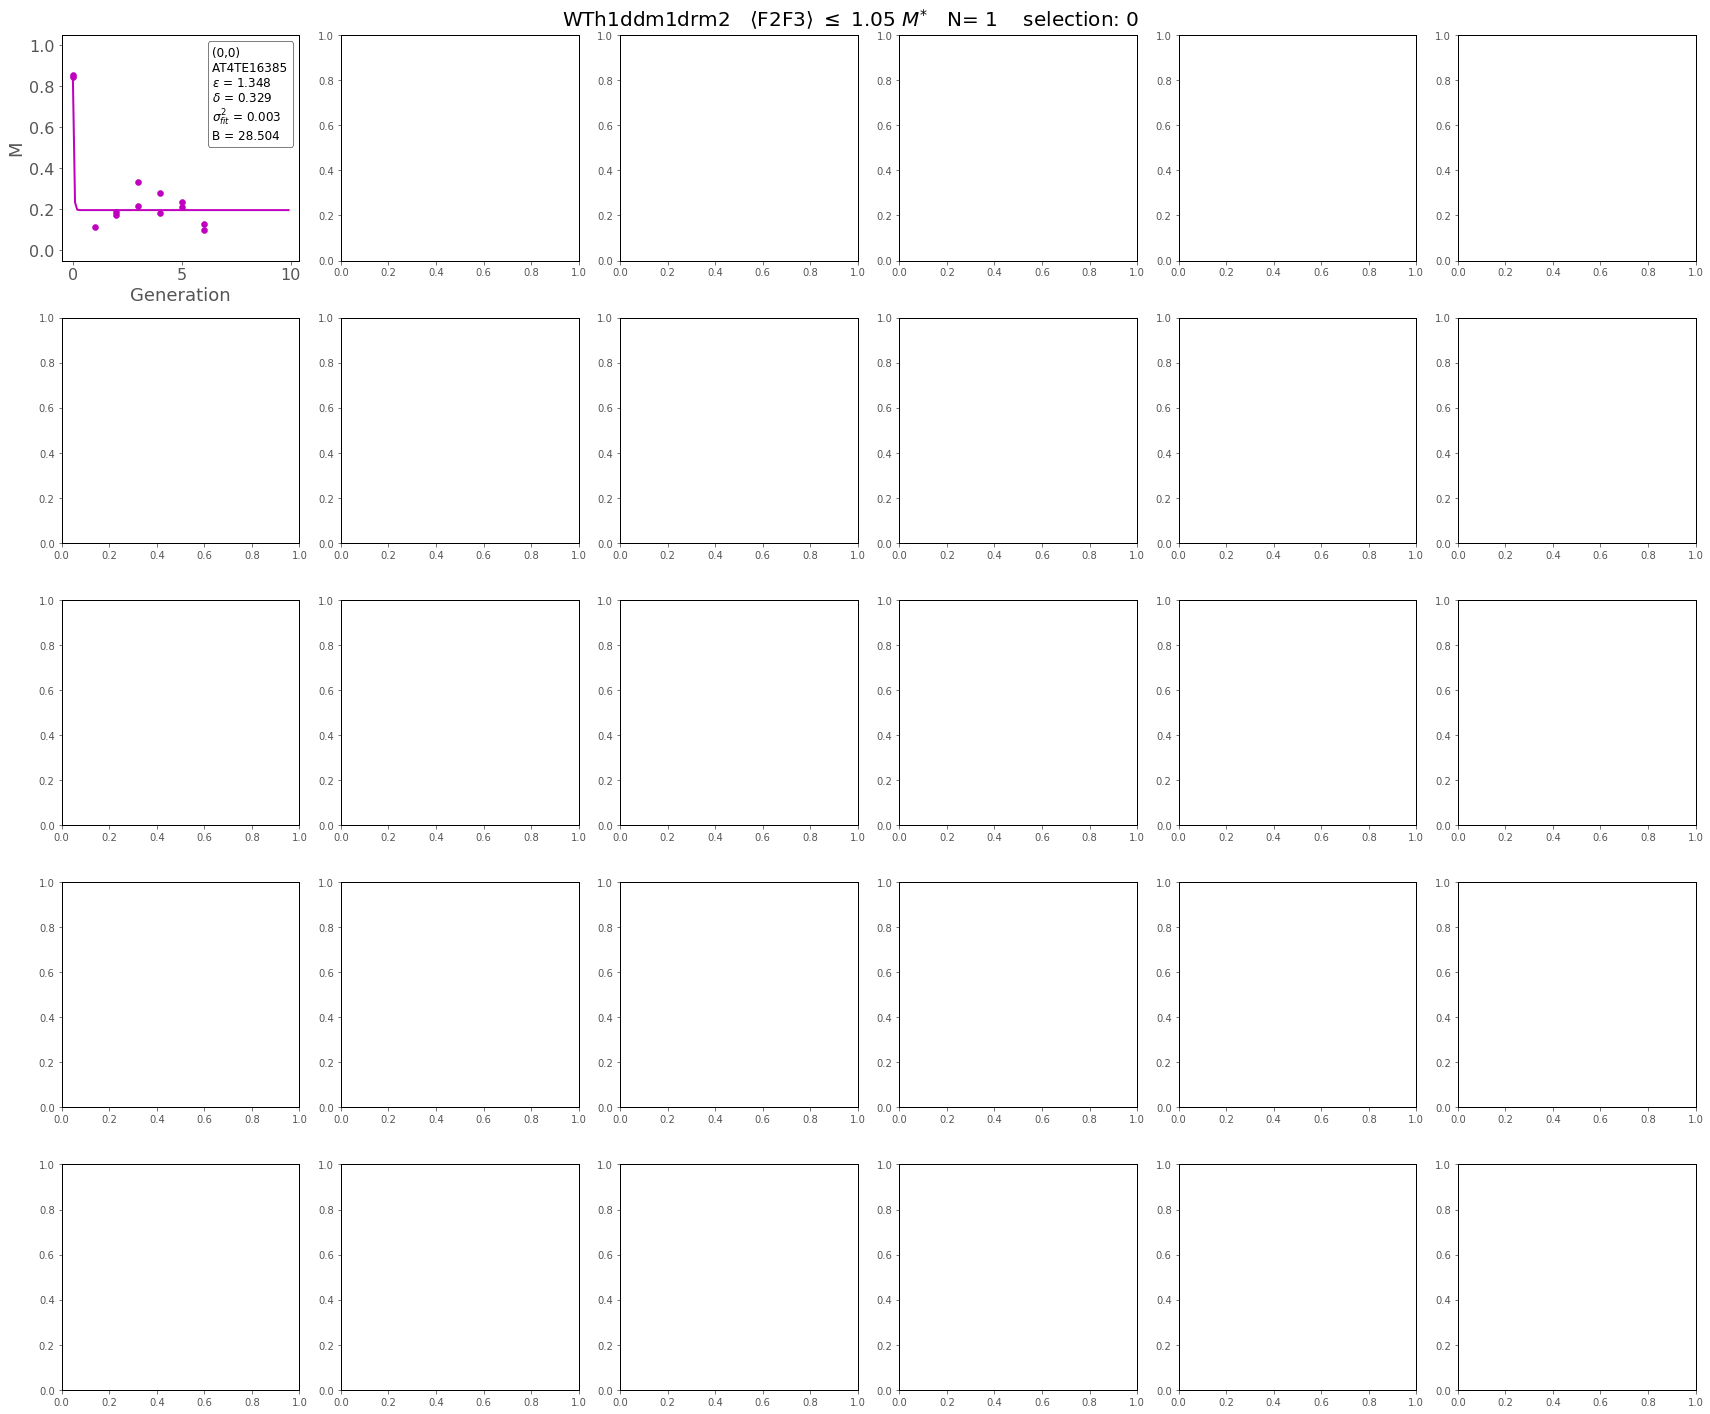

In [106]:
# plot methylation data for specific IDs... 

mutant = 'WTh1ddm1drm2'
line_col = 'm'

# snippet to scan through IDs after ordering on delta 
ID_set = 0

N_x = 6
N_y = 5

# code snippet to compare <F2> with <F3> 
# TE_all_WTh1ddm1drm2_df

#print(TE_all_WTh1ddm1drm2_df.head())

selected_ID_list = TE_WTh1ddm1drm2_fits_whole_df.loc[ ((TE_all_WTh1ddm1drm2_df[['h1ddm1drm2_f2_1','h1ddm1drm2_f3_1','h1ddm1drm2_f3_2']].mean(axis=1) <= 
                                            TE_WTh1ddm1drm2_fits_whole_df['M_star_fit']*steadystate_thresh)) &
                                          (TE_WTh1ddm1drm2_fits_whole_df['err_min_size'] < 1)].index.tolist()
print(selected_ID_list)
selected_ID_list_flat = selected_ID_list.copy()
total_IDs = len(selected_ID_list)
print(len(selected_ID_list))
selected_ID_list = selected_ID_list[ID_set*N_x*N_y:(ID_set+1)*N_x*N_y]
if len(selected_ID_list) < N_x*N_y:
    selected_ID_list.extend( ['Empty']*(N_x*N_y-len(selected_ID_list)) )

selected_ID_list = np.array(selected_ID_list).reshape([N_y,N_x])
print(selected_ID_list)

fig, ax = plt.subplots(N_y,N_x,figsize=(4.*N_x,4.*N_y))

for i_x in range(N_x):
    for i_y in range(N_y):
        for spine in ['left','right','top','bottom']:
            ax[i_y,i_x].spines[spine].set_color('k')

        ax[i_y,i_x].set_facecolor('white')

        if selected_ID_list[i_y,i_x] != 'Empty':
            ax[i_y,i_x].scatter(gen_number_WTh1ddm1drm2, TE_all_WTh1ddm1drm2_df.loc[selected_ID_list[i_y,i_x],:].tolist(), 
                    color=line_col, label= '(%d,%d)\n%s\n$\epsilon$ = %.3f\n$\delta$ = %.3f\n$\sigma^2_{fit}$ = %.3f\nB = %.3f' 
                       % (i_y,i_x,selected_ID_list[i_y,i_x],TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'epsilon'],
                          TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'delta'],
                         TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'tot_err_est'],
                         TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'])  )


            ax[i_y,i_x].plot( np.arange(0,10,0.1),  [exp_func(i_, TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_0_fit'], 
                                                  TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'B_fit'], 
                                                    TE_WTh1ddm1drm2_fits_whole_df.loc[selected_ID_list[i_y,i_x],'M_star_fit']) 
                                         for i_ in np.arange(0,10,0.1)],linewidth=2, color=line_col)



            ax[i_y,i_x].set_xlabel('Generation', fontsize=18)
            ax[i_y,i_x].set_ylabel('M', fontsize=18)
            ax[i_y,i_x].tick_params(axis='both', which='major', labelsize=16)

            leg_00 = ax[i_y,i_x].legend(fontsize=12, markerscale=0, ncol=1,facecolor='white', framealpha=1, handlelength=-0.8)
            leg_00.get_frame().set_edgecolor('k')

            ax[i_y,i_x].set_ylim([-0.05,1.05])
            
        
fig.suptitle(mutant+'   '+'$\langle$F2F3$\\rangle$ $\leq$ %.2f $M^{*}$   N= %d    selection: %d' % (steadystate_thresh,total_IDs,ID_set), fontsize=20)

plt.tight_layout()
fig.subplots_adjust(top=0.96)

plt.show()
fig.savefig("Egs_Grid_F2F3ltMstar_WTh1ddm1drm2"+".png")

In [107]:
# double check that none of the list of TEs to manually exclude are still in the final df
print(TE_WTh1ddm1drm2_fits_df.loc[selected_ID_list_flat])

KeyError: "None of [['AT4TE16385']] are in the [index]"

In [108]:

print(gen_number_WTh1ddm1cmt3)
TE_all_WTh1ddm1cmt3_df.head()
print(TE_all_WTh1ddm1cmt3_df.loc['AT1TE28175',:].tolist())

[0, 0, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6]
[0.830482115, 0.840659341, 0.152173913, 0.23671497600000002, 0.295454545, 0.435100548, 0.247154472, 0.251521298, 0.23571428600000002, 0.144927536, 0.21084953899999997, 0.19068736100000003]


In [109]:
print(Mean_WTh1ddm1cmt3_fits_df.head())

            M_0_fit  M_0_fit_err     B_fit  B_fit_err  M_star_fit  \
ID                                                                  
mean_meth  0.795752     0.014337  0.598926   0.084418    0.361889   

           M_star_fit_err  B_M_star_cov  M_star_M_0_cov  M_0_B_cov  \
ID                                                                   
mean_meth        0.015938      0.001192        0.000016   0.000237   

           tot_err_est  err_min_size    delta  delta_err   epsilon  \
ID                                                                   
mean_meth     0.007586             0  0.01275   0.002309  0.022481   

           epsilon_err  d_plus_e  d_plus_e_err  
ID                                              
mean_meth     0.002684  0.035231      0.004966  


In [110]:
# write out to files


#TE_h1ddm1_fits_df.to_csv('h1ddm1_fits_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1_fits_df.to_csv('WTh1ddm1_fits_21_10_15.tsv', sep='\t')

#TE_h1ddm1cmt2_fits_df.to_csv('h1ddm1cmt2_fits_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1cmt2_fits_df.to_csv('WTh1ddm1cmt2_fits_21_10_15.tsv', sep='\t')

#TE_h1ddm1cmt3_fits_df.to_csv('h1ddm1cmt3_fits_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1cmt3_fits_df.to_csv('WTh1ddm1cmt3_fits_21_10_15.tsv', sep='\t')

#TE_h1ddm1drm2_fits_df.to_csv('h1ddm1drm2_fits_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1drm2_fits_df.to_csv('WTh1ddm1drm2_fits_21_10_15.tsv', sep='\t')

# write Means out to files

#Mean_h1ddm1_fits_df.to_csv('Mean_h1ddm1_fits_21_10_15.tsv', sep='\t')
#Mean_WTh1ddm1_fits_df.to_csv('Mean_WTh1ddm1_fits_21_10_15.tsv', sep='\t')

#Mean_h1ddm1cmt2_fits_df.to_csv('Mean_h1ddm1cmt2_fits_21_10_15.tsv', sep='\t')
#Mean_WTh1ddm1cmt2_fits_df.to_csv('Mean_WTh1ddm1cmt2_fits_21_10_15.tsv', sep='\t')

#Mean_h1ddm1cmt3_fits_df.to_csv('Mean_h1ddm1cmt3_fits_21_10_15.tsv', sep='\t')
#Mean_WTh1ddm1cmt3_fits_df.to_csv('Mean_WTh1ddm1cmt3_fits_21_10_15.tsv', sep='\t')

#Mean_h1ddm1drm2_fits_df.to_csv('Mean_h1ddm1drm2_fits_21_10_15.tsv', sep='\t')
#Mean_WTh1ddm1drm2_fits_df.to_csv('Mean_WTh1ddm1drm2_fits_21_10_15.tsv', sep='\t')



In [111]:

#TE_WTh1ddm1_fits_whole_df.to_csv('WTh1ddm1_fits_whole_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1cmt2_fits_whole_df.to_csv('WTh1ddm1cmt2_fits_whole_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1cmt3_fits_whole_df.to_csv('WTh1ddm1cmt3_fits_whole_21_10_15.tsv', sep='\t')
#TE_WTh1ddm1drm2_fits_whole_df.to_csv('WTh1ddm1drm2_fits_whole_21_10_15.tsv', sep='\t')

In [113]:
# load in the 'quadrant' files listing which TEs are grouped

Extreme_IDs_h1d1_df = pd.read_csv('extremes_of_h1d1_delta_and_epsilon.txt', sep='\t', engine='python')
Extreme_IDs_h1d1_df = Extreme_IDs_h1d1_df.set_index('ID')
Extreme_IDs_h1d1_df = Extreme_IDs_h1d1_df.rename(columns={'delta_epsilon_quintiles_paste': 'ID_code'})
#print(Extreme_IDs_h1d1_df.head())
#print()
Extreme_IDs_h1d1d2_df = pd.read_csv('extremes_of_h1d1d2_delta_and_epsilon.txt', sep='\t', engine='python')
Extreme_IDs_h1d1d2_df = Extreme_IDs_h1d1d2_df.set_index('ID')
Extreme_IDs_h1d1d2_df = Extreme_IDs_h1d1d2_df.rename(columns={'d2_delta_epsilon_quintiles_paste': 'ID_code'})
#print(Extreme_IDs_h1d1d2_df.head())


#print(len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 11].index.tolist() ) )
#print(len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 15].index.tolist() ) )
#print(len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 51].index.tolist() ) )
#print(len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 55].index.tolist() ) )
#print()
#print( len(TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 11].index.tolist() ] ) )
#print( len(TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 15].index.tolist() ] ) )
#print( len(TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 51].index.tolist() ] ) )
#print( len(TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 55].index.tolist() ] ) )


In [114]:
#print(TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 11].index.tolist() ].mean(axis=0))
#print(Mean_WTh1ddm1_df)
Mean_WTh1ddm1_df.loc['dLow_eLow'] = TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 11].index.tolist() ].mean(axis=0).tolist()
#print(Mean_WTh1ddm1_df)
Mean_WTh1ddm1_df.loc['dLow_eHigh'] = TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 15].index.tolist() ].mean(axis=0).tolist()
Mean_WTh1ddm1_df.loc['dHigh_eLow'] = TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 51].index.tolist() ].mean(axis=0).tolist()
Mean_WTh1ddm1_df.loc['dHigh_eHigh'] = TE_all_WTh1ddm1_df.loc[ Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 55].index.tolist() ].mean(axis=0).tolist()
#print(Mean_WTh1ddm1_df)

print('dLow_eLow', len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 11].index.tolist()))
print('dLow_eHigh', len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 15].index.tolist()))
print('dHigh_eLow', len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 51].index.tolist()))
print('dHigh_eHigh', len(Extreme_IDs_h1d1_df.loc[Extreme_IDs_h1d1_df['ID_code'] == 55].index.tolist()))

dLow_eLow 147
dLow_eHigh 17
dHigh_eLow 13
dHigh_eHigh 149


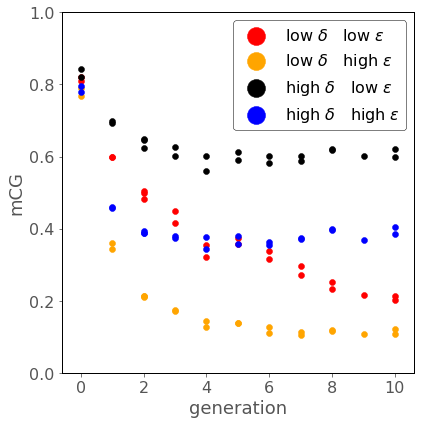

In [115]:
# plot methylation data for specific groups... 



fig, ax = plt.subplots(1,1,figsize=(6.0,6.0))

for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')

ax.set_facecolor('white')


ax.scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dLow_eLow'].tolist(),color='r', label= 'low $\delta$   low $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dLow_eHigh'].tolist(),color='orange', label= 'low $\delta$   high $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dHigh_eLow'].tolist(),color='k', label= 'high $\delta$   low $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dHigh_eHigh'].tolist(),color='b', label= 'high $\delta$   high $\epsilon$' )


#ax.plot( np.arange(0,10,0.1),  [exp_func(i_, TE_h1ddm1drm2_fits_df.loc[selected_ID,'M_0_fit'], 
#                                      TE_h1ddm1drm2_fits_df.loc[selected_ID,'B_fit'], 
#                                        TE_h1ddm1drm2_fits_df.loc[selected_ID,'M_star_fit']) 
#                             for i_ in np.arange(0,10,0.1)],linewidth=2, color='k')
        


ax.set_xlabel('generation', fontsize=18)
ax.set_ylabel('mCG', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax.legend(fontsize=16, markerscale=3, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

ax.set_ylim([0,1])

plt.tight_layout()
plt.show()

In [116]:
print(Mean_WTh1ddm1_fits_df)

            M_0_fit  M_0_fit_err     B_fit  B_fit_err  M_star_fit  \
ID                                                                  
mean_meth  0.793653     0.008272  0.890497   0.041837    0.376952   

           M_star_fit_err  B_M_star_cov  M_star_M_0_cov  M_0_B_cov  \
ID                                                                   
mean_meth          0.0035      0.000082        0.000002   0.000125   

           tot_err_est  err_min_size     delta  delta_err   epsilon  \
ID                                                                    
mean_meth     0.001831             0  0.019746   0.001042  0.032637   

           epsilon_err  d_plus_e  d_plus_e_err  
ID                                              
mean_meth     0.001438  0.052382      0.002461  


In [117]:
#print(TE_all_WTh1ddm1drm2_df.loc[ Extreme_IDs_h1d1d2_df.loc[Extreme_IDs_h1d1d2_df['ID_code'] == 11].index.tolist() ].mean(axis=0))
#print(Mean_WTh1ddm1drm2_df)
Mean_WTh1ddm1drm2_df.loc['dLow_eLow'] = TE_all_WTh1ddm1drm2_df.loc[ Extreme_IDs_h1d1d2_df.loc[Extreme_IDs_h1d1d2_df['ID_code'] == 11].index.tolist() ].mean(axis=0).tolist()
#print(Mean_WTh1ddm1drm2_df)
Mean_WTh1ddm1drm2_df.loc['dLow_eHigh'] = TE_all_WTh1ddm1drm2_df.loc[ Extreme_IDs_h1d1d2_df.loc[Extreme_IDs_h1d1d2_df['ID_code'] == 15].index.tolist() ].mean(axis=0).tolist()
Mean_WTh1ddm1drm2_df.loc['dHigh_eLow'] = TE_all_WTh1ddm1drm2_df.loc[ Extreme_IDs_h1d1d2_df.loc[Extreme_IDs_h1d1d2_df['ID_code'] == 51].index.tolist() ].mean(axis=0).tolist()
Mean_WTh1ddm1drm2_df.loc['dHigh_eHigh'] = TE_all_WTh1ddm1drm2_df.loc[ Extreme_IDs_h1d1d2_df.loc[Extreme_IDs_h1d1d2_df['ID_code'] == 55].index.tolist() ].mean(axis=0).tolist()
#print(Mean_WTh1ddm1drm2_df)

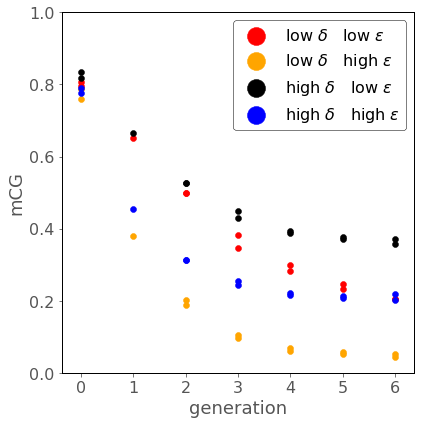

In [118]:
# plot methylation data for specific groups... 



fig, ax = plt.subplots(1,1,figsize=(6.0,6.0))

for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')

ax.set_facecolor('white')


ax.scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dLow_eLow'].tolist(),color='r', label= 'low $\delta$   low $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dLow_eHigh'].tolist(),color='orange', label= 'low $\delta$   high $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dHigh_eLow'].tolist(),color='k', label= 'high $\delta$   low $\epsilon$' )
ax.scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dHigh_eHigh'].tolist(),color='b', label= 'high $\delta$   high $\epsilon$' )


#ax.plot( np.arange(0,10,0.1),  [exp_func(i_, TE_h1ddm1drm2drm2_fits_df.loc[selected_ID,'M_0_fit'], 
#                                      TE_h1ddm1drm2drm2_fits_df.loc[selected_ID,'B_fit'], 
#                                        TE_h1ddm1drm2drm2_fits_df.loc[selected_ID,'M_star_fit']) 
#                             for i_ in np.arange(0,10,0.1)],linewidth=2, color='k')
        


ax.set_xlabel('generation', fontsize=18)
ax.set_ylabel('mCG', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)

leg_00 = ax.legend(fontsize=16, markerscale=3, loc='upper right', ncol=1,facecolor='white', framealpha=1)
leg_00.get_frame().set_edgecolor('k')

ax.set_ylim([0,1])

plt.tight_layout()
plt.show()

In [119]:
def quadrant_mutant_analysis(Mean_mutant_df,  gen_number_mutant, tot_err_thresh):
    
    # find fit for mean values all
    # variables: 
    # fits_list_mutant
    # fits_IDs_mutant
    # no_fits_IDs_mutant
    # Mean_mutant_df
    # gen_number_mutant
    # Mean_mutant_fits_df

    fits_list_mutant = []
    fits_IDs_mutant = []

    no_fits_IDs_mutant = []

    for i_ in range(0,len(Mean_mutant_df)):

        #print(i_, Mean_mutant_df.index[i_])
        M_in_temp = np.array(Mean_mutant_df.iloc[i_,0:len(gen_number_mutant)].tolist())

        try:
            M_0_fit_temp, B_fit_temp, M_star_fit_temp, M_0_fit_err_temp, B_fit_err_temp, \
            M_star_fit_err_temp, B_M_star_cov_temp, Mean_mutant_fit_cov_matrix = func_exp_fit(np.array(gen_number_mutant), 
                                                                  M_in_temp)

        except RuntimeError:
            no_fits_IDs_mutant.append(Mean_mutant_df.index[i_])

        else:
            M_star_M_0_cov_temp = Mean_mutant_fit_cov_matrix[2,0]
            M_0_B_cov_temp = Mean_mutant_fit_cov_matrix[0,1]
            fits_list_mutant.append( [M_0_fit_temp, M_0_fit_err_temp, B_fit_temp, B_fit_err_temp, \
                               M_star_fit_temp, M_star_fit_err_temp, B_M_star_cov_temp,M_star_M_0_cov_temp,M_0_B_cov_temp] )
            fits_IDs_mutant.append( Mean_mutant_df.index[i_] )
            
    print(len(Mean_mutant_df),len(fits_list_mutant),len(no_fits_IDs_mutant),
            len(fits_list_mutant)+len(no_fits_IDs_mutant))

    Mean_mutant_fits_df = pd.DataFrame(fits_list_mutant, columns=['M_0_fit','M_0_fit_err', 'B_fit','B_fit_err', 
                                                                     'M_star_fit','M_star_fit_err', 'B_M_star_cov',
                                                                       'M_star_M_0_cov','M_0_B_cov'],
                                      index=fits_IDs_mutant)
    Mean_mutant_fits_df = Mean_mutant_fits_df.rename_axis("ID")

    
    Mean_mutant_fits_df['tot_err_est'] = \
        Mean_mutant_fits_df.apply(lambda i_: tot_err_est(i_.M_0_fit, i_.M_0_fit_err, 
        i_.B_fit, i_.B_fit_err, i_.M_star_fit, i_.M_star_fit_err), axis=1)

    Mean_mutant_fits_df['err_min_size'] = Mean_mutant_fits_df.apply(assign_err_size, axis=1)    
    
    
    # find epsilon and delta values
    # for Mean df

    # delta = 2*B_fit*C_fit/n_cc
    # epsilon + delta = 2*B_fit/n_cc

    delta_list_Meanmp = []
    epsilon_list_Meanmp = []
    delta_err_list_Meanmp = []
    epsilon_err_list_Meanmp = []
    d_plus_e_err_list_Meanmp = []

    df_index_B_fit = Mean_mutant_fits_df.columns.get_loc("B_fit")
    df_index_M_star_fit = Mean_mutant_fits_df.columns.get_loc("M_star_fit")

    df_index_B_fit_err = Mean_mutant_fits_df.columns.get_loc("B_fit_err")
    df_index_M_star_fit_err = Mean_mutant_fits_df.columns.get_loc("M_star_fit_err")
    df_index_B_M_star_cov = Mean_mutant_fits_df.columns.get_loc("B_M_star_cov")


    for i_ in range(0,len(Mean_mutant_fits_df)):

        delta_list_Meanmp.append(2.*Mean_mutant_fits_df.iloc[i_,df_index_B_fit]*
                          Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit]/n_cc)
        epsilon_list_Meanmp.append(2.*Mean_mutant_fits_df.iloc[i_,df_index_B_fit]/
                                          n_cc - delta_list_Meanmp[-1])

        delta_err_Meanmp, epsilon_err_Meanmp, d_plus_e_err_Meanmp = delta_epsilon_errors(n_cc, Mean_mutant_fits_df.iloc[i_,df_index_B_fit], 
                    Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit], Mean_mutant_fits_df.iloc[i_,df_index_B_fit_err], 
                    Mean_mutant_fits_df.iloc[i_,df_index_M_star_fit_err], Mean_mutant_fits_df.iloc[i_,df_index_B_M_star_cov])

        delta_err_list_Meanmp.append(delta_err_Meanmp)
        epsilon_err_list_Meanmp.append(epsilon_err_Meanmp)
        d_plus_e_err_list_Meanmp.append(d_plus_e_err_Meanmp)

        #if epsilon_list_Meanmp[-1] < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon', epsilon_list_Meanmp[-1], i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])
        #if epsilon_err_Meanmp < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('epsilon_err', epsilon_err_Meanmp, i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])

        #if delta_list_Meanmp[-1] < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta', delta_list_Meanmp[-1], i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])
        #if delta_err_Meanmp < 0 and Mean_mutant_fits_df.iloc[i_,8] < 10:
        #    print('delta_err', delta_err_Meanmp, i_, Mean_mutant_fits_df.iloc[i_,8], Mean_mutant_fits_df.iloc[i_,7])

    Mean_mutant_fits_df = Mean_mutant_fits_df.assign(
        delta=delta_list_Meanmp, delta_err=delta_err_list_Meanmp, 
        epsilon = epsilon_list_Meanmp, epsilon_err=epsilon_err_list_Meanmp)



    # CalculaMean delta + epsilon
    Mean_mutant_fits_df['d_plus_e'] = Mean_mutant_fits_df[
        'delta'].add(Mean_mutant_fits_df['epsilon'], axis = 0) 

    Mean_mutant_fits_df = Mean_mutant_fits_df.assign(d_plus_e_err=d_plus_e_err_list_Meanmp)

    #print(Mean_mutant_fits_df.head())
    
    
    # filter using tot_err_thresh
    TE_mutant_fits_errthresh_df = TE_mutant_fits_df.loc[TE_mutant_fits_df['err_min_size'] <= tot_err_thresh ]
    
    
    

    
    
    # create data points to plot the exp. fits. for the mean of TEs

    x_gens = np.linspace(0, 12.5, num=141, endpoint=True)
    
    # make dictionary of fit_curves
    ID_codes_list = Mean_mutant_fits_df.index.tolist()[1:]

    Mean_mutant_fit_curve_dict = {}
    
    for ID_code_ in ID_codes_list:
        
        Mean_mutant_fit_curve = []
    
        Mean_mutant_fit_curve = [exp_func(i_, Mean_mutant_fits_df.loc[ID_code_,'M_0_fit'], 
                                          Mean_mutant_fits_df.loc[ID_code_,'B_fit'], 
                                            Mean_mutant_fits_df.loc[ID_code_,'M_star_fit']) for i_ in x_gens]
        
        Mean_mutant_fit_curve_dict[ID_code_] = Mean_mutant_fit_curve


#    M_0_temp = Mean_mutant_fits_df.loc['mean_meth','M_0_fit']
#    B_temp = Mean_mutant_fits_df.loc['mean_meth','B_fit']
#    M_star_temp = Mean_mutant_fits_df.loc['mean_meth','M_star_fit']
#    Mean_mutant_fit_cov_matrix_temp = Mean_mutant_fit_cov_matrix
    
#    M_WT_temp = Mean_WT_df.loc['mean_meth','wt_f3_1']
#    Mean_WT_mutant_xval_1, Mean_WT_mutant_ncc_val_1, Mean_WT_mutant_xval_err_1, Mean_WT_mutant_ncc_val_err_1 = \
#    cacl_Mean_WT_xval(M_WT_temp, M_0_temp, B_temp, M_star_temp, Mean_mutant_fit_cov_matrix_temp, n_cc)
    
#    M_WT_temp = Mean_WT_df.loc['mean_meth','wt_f4_1']
#    Mean_WT_mutant_xval_2, Mean_WT_mutant_ncc_val_2, Mean_WT_mutant_xval_err_2, Mean_WT_mutant_ncc_val_err_2 = \
#    cacl_Mean_WT_xval(M_WT_temp, M_0_temp, B_temp, M_star_temp, Mean_mutant_fit_cov_matrix_temp, n_cc)
    
    return Mean_mutant_fits_df, x_gens, Mean_mutant_fit_curve_dict



In [120]:
# fit WTh1ddm1 quadrants
Mean_WTh1ddm1_quadrant_fits_df, x_gens, Mean_WTh1ddm1_quadrant_fit_curve_dict = quadrant_mutant_analysis(Mean_WTh1ddm1_df,  
                                                                                                     gen_number_WTh1ddm1, tot_err_thresh_value)

#print(Mean_WTh1ddm1_quadrant_fits_df )


5 5 0 5


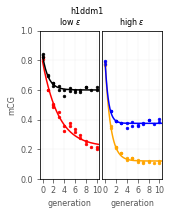

In [121]:
# plot methylation data for specific groups... 
from matplotlib import ticker


fig, ax = plt.subplots(1,2,figsize=(2.5,3.0))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[0].spines[spine].set_linewidth(0.8)
    ax[1].spines[spine].set_linewidth(0.8)

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')

ax[0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax[1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)

ax[0].scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dLow_eLow'].tolist(),color='r',s=8)
ax[1].scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dLow_eHigh'].tolist(),color='orange',s=8)
ax[0].scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dHigh_eLow'].tolist(),color='k',s=8)
ax[1].scatter(gen_number_WTh1ddm1, Mean_WTh1ddm1_df.loc['dHigh_eHigh'].tolist(),color='b',s=8)

ax[0].plot(x_gens, Mean_WTh1ddm1_quadrant_fit_curve_dict['dLow_eLow'],color='r')
ax[1].plot(x_gens, Mean_WTh1ddm1_quadrant_fit_curve_dict['dLow_eHigh'],color='orange')
ax[0].plot(x_gens, Mean_WTh1ddm1_quadrant_fit_curve_dict['dHigh_eLow'],color='k')
ax[1].plot(x_gens, Mean_WTh1ddm1_quadrant_fit_curve_dict['dHigh_eHigh'],color='b')


ax[0].set_xlabel('generation', fontsize=8)
ax[0].set_ylabel('mCG', fontsize=8)
ax[0].tick_params(axis='both', which='major', labelsize=8)

ax[1].set_xlabel('generation', fontsize=8)
#ax[1].set_ylabel('mCG', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=8)

ax[0].set_xlim([-0.5,10.5])
ax[0].set_ylim([0,1])

ax[1].set_xlim([-0.5,10.5])
ax[1].set_ylim([0,1])

ax[0].xaxis.set_major_locator(ticker.MaxNLocator(6))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(6))

from matplotlib.ticker import NullFormatter
ax[1].axes.get_yaxis().set_major_formatter(NullFormatter())
ax[1].tick_params('y', length=0, width=0, which='major')

ax[0].set_title('low $\epsilon$', fontsize=8)
ax[1].set_title('high $\epsilon$', fontsize=8)

fig.suptitle('h1ddm1',fontsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
fig.subplots_adjust(top=0.87)
plt.show()
fig.savefig("G3_model.pdf")
fig.savefig("G3_model.png")

In [122]:
# fit WTh1ddm1drm2 quadrants
Mean_WTh1ddm1drm2_quadrant_fits_df, x_gens, Mean_WTh1ddm1drm2_quadrant_fit_curve_dict = quadrant_mutant_analysis(Mean_WTh1ddm1drm2_df,  
                                                                                                     gen_number_WTh1ddm1drm2, tot_err_thresh_value)
print(Mean_WTh1ddm1drm2_df)
#print(Mean_WTh1ddm1drm2_quadrant_fits_df )

5 5 0 5
              wt_f3_1   wt_f4_1  h1ddm1drm2_f2_1  h1ddm1drm2_f3_1  \
mean_meth    0.801791  0.788084         0.542973         0.393479   
dLow_eLow    0.806118  0.796155         0.650556         0.498060   
dLow_eHigh   0.788140  0.760789         0.380729         0.201167   
dHigh_eLow   0.833349  0.817960         0.666708         0.527466   
dHigh_eHigh  0.789410  0.775636         0.453319         0.313345   

             h1ddm1drm2_f3_2  h1ddm1drm2_f4_1  h1ddm1drm2_f4_2  \
mean_meth           0.395341         0.298373         0.277092   
dLow_eLow           0.499795         0.381673         0.347102   
dLow_eHigh          0.187022         0.096430         0.105773   
dHigh_eLow          0.526702         0.450013         0.429595   
dHigh_eHigh         0.312052         0.255295         0.244013   

             h1ddm1drm2_f5_1  h1ddm1drm2_f5_2  h1ddm1drm2_f6_1  \
mean_meth           0.235419         0.243501         0.219656   
dLow_eLow           0.283719         0.298900   

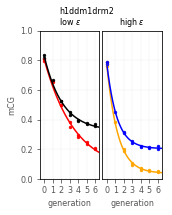

In [123]:
# plot methylation data for specific groups... 
from matplotlib import ticker


fig, ax = plt.subplots(1,2,figsize=(2.5,3.0))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[0].spines[spine].set_linewidth(0.8)
    ax[1].spines[spine].set_linewidth(0.8)

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')

ax[0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax[1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)

ax[0].scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dLow_eLow'].tolist(),color='r',s=8)
ax[1].scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dLow_eHigh'].tolist(),color='orange',s=8)
ax[0].scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dHigh_eLow'].tolist(),color='k',s=8)
ax[1].scatter(gen_number_WTh1ddm1drm2, Mean_WTh1ddm1drm2_df.loc['dHigh_eHigh'].tolist(),color='b',s=8)

ax[0].plot(x_gens, Mean_WTh1ddm1drm2_quadrant_fit_curve_dict['dLow_eLow'],color='r')
ax[1].plot(x_gens, Mean_WTh1ddm1drm2_quadrant_fit_curve_dict['dLow_eHigh'],color='orange')
ax[0].plot(x_gens, Mean_WTh1ddm1drm2_quadrant_fit_curve_dict['dHigh_eLow'],color='k')
ax[1].plot(x_gens, Mean_WTh1ddm1drm2_quadrant_fit_curve_dict['dHigh_eHigh'],color='b')


ax[0].set_xlabel('generation', fontsize=8)
ax[0].set_ylabel('mCG', fontsize=8)
ax[0].tick_params(axis='both', which='major', labelsize=8)

ax[1].set_xlabel('generation', fontsize=8)
#ax[1].set_ylabel('mCG', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=8)

ax[0].set_xlim([-0.5,6.5])
ax[0].set_ylim([0,1])

ax[1].set_xlim([-0.5,6.5])
ax[1].set_ylim([0,1])

ax[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))

from matplotlib.ticker import NullFormatter
ax[1].axes.get_yaxis().set_major_formatter(NullFormatter())
ax[1].tick_params('y', length=0, width=0, which='major')


ax[0].set_title('low $\epsilon$', fontsize=8)
ax[1].set_title('high $\epsilon$', fontsize=8)

fig.suptitle('h1ddm1drm2',fontsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
fig.subplots_adjust(top=0.87)
plt.show()
fig.savefig("G4_model.pdf")
fig.savefig("G4_model.png")

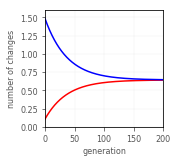

In [124]:
# make example gains and loss curve
N_eg = 100
M_0_eg = 0.9
delta_eg = 0.021
epsilon_eg = 0.033
B_eg = (delta_eg+epsilon_eg)/2.
M_star_eg = delta_eg/(delta_eg+epsilon_eg)

x_cc = np.linspace(0, 200, num=400, endpoint=True)

Gains_number_eg = [N_eg*(1.-exp_func(i_, M_0_eg, B_eg, M_star_eg))*delta_eg/2. for i_ in x_cc]
Losses_number_eg = [N_eg*exp_func(i_, M_0_eg, B_eg, M_star_eg)*epsilon_eg/2. for i_ in x_cc]

# plot methylation data for specific groups... 
from matplotlib import ticker


fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))

for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(0.8)

ax.set_facecolor('white')


ax.grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)


ax.plot(x_cc, Gains_number_eg,color='r')
ax.plot(x_cc, Losses_number_eg,color='b')


ax.set_xlabel('generation', fontsize=8)
ax.set_ylabel('number of changes', fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlim([0,200])
ax.set_ylim([0,1.6])

ax.xaxis.set_major_locator(ticker.MaxNLocator(4))


#ax.set_title('low $\epsilon$', fontsize=14)
#fig.suptitle('h1ddm1drm2',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
fig.subplots_adjust(top=0.87)
plt.show()
fig.savefig("G2_model.pdf")
fig.savefig("G2_model.png")

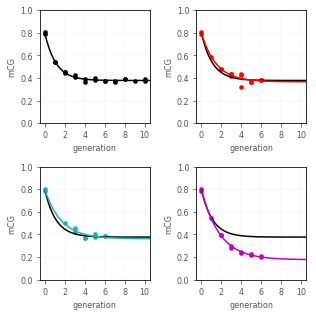

In [125]:
# plot the fits

fig1, ax1 = plt.subplots(2,2,figsize=(4.5,4.5))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
    ax1[0,0].spines[spine].set_linewidth(0.8)
    ax1[0,1].spines[spine].set_linewidth(0.8)
    ax1[1,0].spines[spine].set_linewidth(0.8)
    ax1[1,1].spines[spine].set_linewidth(0.8)
    
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')

ax1[0,0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[1,0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[0,1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[1,1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)

ax1[0,0].scatter(gen_number_WTh1ddm1,Mean_WTh1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k',s=16)
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', 
                 label = 'WTh1ddm1' )


ax1[0,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[0,1].scatter(gen_number_WTh1ddm1cmt2,Mean_WTh1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r',s=16)
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, color='r', 
                 label = 'WTh1ddm1cmt2' )

ax1[1,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[1,0].scatter(gen_number_WTh1ddm1cmt3,Mean_WTh1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen',s=16)
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, color='lightseagreen',
              label = 'WTh1ddm1cmt3' )

ax1[1,1].plot(x_gens, Mean_WTh1ddm1_fit_curve, color='k', linestyle='-',label='WTh1ddm1')
ax1[1,1].scatter(gen_number_WTh1ddm1drm2,Mean_WTh1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m',s=16)
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, color='m', 
                         label = 'WTh1ddm1drm2' )




#leg00 = ax1[0,0].legend(fontsize=8,facecolor='white', framealpha=1)
#leg01 = ax1[0,1].legend(fontsize=8,facecolor='white', framealpha=1)
#leg02 = ax1[1,0].legend(fontsize=8,facecolor='white', framealpha=1)
#leg10 = ax1[1,1].legend(fontsize=8,facecolor='white', framealpha=1)

#leg00.get_frame().set_edgecolor('k')
#leg01.get_frame().set_edgecolor('k')
#leg02.get_frame().set_edgecolor('k')
#leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=8)
ax1[0,1].set_xlabel("generation", fontsize=8)
ax1[1,0].set_xlabel("generation", fontsize=8)
ax1[1,1].set_xlabel("generation", fontsize=8)

ax1[0,0].set_ylabel("mCG", fontsize=8)
ax1[0,1].set_ylabel("mCG", fontsize=8)
ax1[1,0].set_ylabel("mCG", fontsize=8)
ax1[1,1].set_ylabel("mCG", fontsize=8)


ax1[0,0].tick_params(axis='both', which='major', labelsize=8)
ax1[0,1].tick_params(axis='both', which='major', labelsize=8)
ax1[1,0].tick_params(axis='both', which='major', labelsize=8)
ax1[1,1].tick_params(axis='both', which='major', labelsize=8)
ax1[1,1].tick_params(axis='both', which='major', labelsize=8)

ax1[0,0].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[0,1].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(7))

ax1[0,0].set_xlim(-0.5,10.5)
ax1[0,1].set_xlim(-0.5,10.5)
ax1[1,0].set_xlim(-0.5,10.5)
ax1[1,1].set_xlim(-0.5,10.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.92)
plt.show()
fig1.savefig("G1a_model.pdf")
fig1.savefig("G1a_model.png")

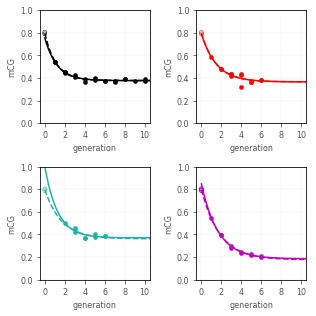

In [126]:
# plot the fits

fig1, ax1 = plt.subplots(2,2,figsize=(4.5,4.5))
Mean_WT_df.loc['mean_meth',:].tolist()

for spine in ['left','right','top','bottom']:
    ax1[0,0].spines[spine].set_color('k')
    ax1[1,0].spines[spine].set_color('k')
    ax1[0,1].spines[spine].set_color('k')
    ax1[1,1].spines[spine].set_color('k')
    ax1[0,0].spines[spine].set_linewidth(0.8)
    ax1[0,1].spines[spine].set_linewidth(0.8)
    ax1[1,0].spines[spine].set_linewidth(0.8)
    ax1[1,1].spines[spine].set_linewidth(0.8)
    
ax1[0,0].set_facecolor('white')
ax1[1,0].set_facecolor('white')
ax1[0,1].set_facecolor('white')
ax1[1,1].set_facecolor('white')

ax1[0,0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[1,0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[0,1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax1[1,1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)

#ax1[0,0].errorbar([Mean_WT_h1ddm1_xval_1, Mean_WT_h1ddm1_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1_xval_err_1,Mean_WT_h1ddm1_xval_err_2] ,color='k' , capsize=4, elinewidth=2)
ax1[0,0].scatter(gen_number_h1ddm1,Mean_h1ddm1_df.loc['mean_meth',:].tolist(),label='',color='k',s=16)
ax1[0,0].plot(x_gens, Mean_h1ddm1_fit_curve, color='k', 
                 label = 'h1ddm1')
ax1[0,0].plot(x_gens, Mean_WTh1ddm1_fit_curve, label='WTh1ddm1', color='k', linestyle='--')
ax1[0,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='k',s=16)


#ax1[0,1].errorbar([Mean_WT_h1ddm1cmt2_xval_1, Mean_WT_h1ddm1cmt2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1cmt2_xval_err_1,Mean_WT_h1ddm1cmt2_xval_err_2] ,color='r' , capsize=4, elinewidth=2)
ax1[0,1].scatter(gen_number_h1ddm1cmt2,Mean_h1ddm1cmt2_df.loc['mean_meth',:].tolist(),label='',color='r',s=16)
ax1[0,1].plot(x_gens, Mean_h1ddm1cmt2_fit_curve, color='r', 
                 label = 'h1ddm1cmt2' )
ax1[0,1].plot(x_gens, Mean_WTh1ddm1cmt2_fit_curve, label='WTh1ddm1cmt2', color='r', linestyle='--')
ax1[0,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='r',s=16)

#ax1[1,0].errorbar([Mean_WT_h1ddm1cmt3_xval_1, Mean_WT_h1ddm1cmt3_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1cmt3_xval_err_1,Mean_WT_h1ddm1cmt3_xval_err_2] ,color='lightseagreen' , capsize=4, elinewidth=2)
ax1[1,0].scatter(gen_number_h1ddm1cmt3,Mean_h1ddm1cmt3_df.loc['mean_meth',:].tolist(),label='',color='lightseagreen',s=16)
ax1[1,0].plot(x_gens, Mean_h1ddm1cmt3_fit_curve, color='lightseagreen', 
                 label = 'h1ddm1cmt3' )
ax1[1,0].plot(x_gens, Mean_WTh1ddm1cmt3_fit_curve, label='WTh1ddm1cmt3', color='lightseagreen', linestyle='--')
ax1[1,0].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='lightseagreen',s=16)


#ax1[1,1].errorbar([Mean_WT_h1ddm1drm2_xval_1, Mean_WT_h1ddm1drm2_xval_2], Mean_WT_df.loc['mean_meth',:].tolist(), 
#xerr = [Mean_WT_h1ddm1drm2_xval_err_1,Mean_WT_h1ddm1drm2_xval_err_2] ,color='m' , capsize=4, elinewidth=2)
ax1[1,1].scatter(gen_number_h1ddm1drm2,Mean_h1ddm1drm2_df.loc['mean_meth',:].tolist(),label='',color='m',s=16)
ax1[1,1].plot(x_gens, Mean_h1ddm1drm2_fit_curve, color='m', 
                 label = 'h1ddm1drm2' )
ax1[1,1].plot(x_gens, Mean_WTh1ddm1drm2_fit_curve, label='WTh1ddm1drm2', color='m', linestyle='--')
ax1[1,1].scatter(gen_number_WT,Mean_WT_df.loc['mean_meth',:].tolist(),label='', 
                 facecolors='none', edgecolors='m',linewidth=1,s=16)




#leg00 = ax1[0,0].legend(fontsize=14,facecolor='white', framealpha=1)
#leg01 = ax1[0,1].legend(fontsize=14,facecolor='white', framealpha=1)
#leg02 = ax1[1,0].legend(fontsize=14,facecolor='white', framealpha=1)
#leg10 = ax1[1,1].legend(fontsize=14,facecolor='white', framealpha=1)

#leg00.get_frame().set_edgecolor('k')
#leg01.get_frame().set_edgecolor('k')
#leg02.get_frame().set_edgecolor('k')
#leg10.get_frame().set_edgecolor('k')

ax1[0,0].set_xlabel("generation", fontsize=8)
ax1[0,1].set_xlabel("generation", fontsize=8)
ax1[1,0].set_xlabel("generation", fontsize=8)
ax1[1,1].set_xlabel("generation", fontsize=8)

ax1[0,0].set_ylabel("mCG", fontsize=8)
ax1[0,1].set_ylabel("mCG", fontsize=8)
ax1[1,0].set_ylabel("mCG", fontsize=8)
ax1[1,1].set_ylabel("mCG", fontsize=8)


ax1[0,0].tick_params(axis='both', which='major', labelsize=8)
ax1[0,1].tick_params(axis='both', which='major', labelsize=8)
ax1[1,0].tick_params(axis='both', which='major', labelsize=8)
ax1[1,1].tick_params(axis='both', which='major', labelsize=8)
ax1[1,1].tick_params(axis='both', which='major', labelsize=8)

ax1[0,0].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[0,1].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[1,0].xaxis.set_major_locator(ticker.MaxNLocator(7))
ax1[1,1].xaxis.set_major_locator(ticker.MaxNLocator(7))

ax1[0,0].set_xlim(-0.5,10.5)
ax1[0,1].set_xlim(-0.5,10.5)
ax1[1,0].set_xlim(-0.5,10.5)
ax1[1,1].set_xlim(-0.5,10.5)

ax1[0,0].set_ylim(0,1)
ax1[0,1].set_ylim(0,1)
ax1[1,0].set_ylim(0,1)
ax1[1,1].set_ylim(0,1)

#fig1.suptitle(data_type, fontsize=16)

plt.tight_layout()
#fig1.subplots_adjust(top=0.92)
plt.show()
fig1.savefig("G1_model.pdf")
fig1.savefig("G1_model.png")

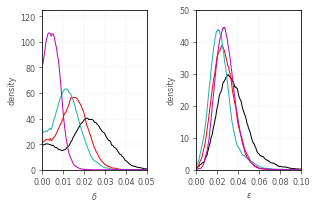

In [127]:
# plot methylation data for specific groups... 
from matplotlib import ticker


fig, ax = plt.subplots(1,2,figsize=(4.5,3.0))

for spine in ['left','right','top','bottom']:
    ax[0].spines[spine].set_color('k')
    ax[1].spines[spine].set_color('k')
    ax[0].spines[spine].set_linewidth(0.8)
    ax[1].spines[spine].set_linewidth(0.8)

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')

ax[0].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)
ax[1].grid(b=True, which='major', color='lightgrey', linestyle=':',linewidth=0.4)




n_bin = 200

hist_range_delta = (0,0.1)
hist_step_delta = (hist_range_delta[1]-hist_range_delta[0])/n_bin
x_hist_vals_delta = np.arange(hist_range_delta[0],hist_range_delta[1],hist_step_delta)
x_hist_vals_delta = x_hist_vals_delta+hist_step_delta/2.

hist_range_epsilon = (0,0.1)
hist_step_epsilon = (hist_range_epsilon[1]-hist_range_epsilon[0])/n_bin
x_hist_vals_epsilon = np.arange(hist_range_epsilon[0],hist_range_epsilon[1],hist_step_epsilon)
x_hist_vals_epsilon = x_hist_vals_epsilon+hist_step_epsilon/2.


hist_delta_WTh1ddm1, bins_vals_delta = np.histogram(TE_WTh1ddm1_fits_df['delta'].tolist(), 
                                                    bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1, bins_vals_epsilon = np.histogram(TE_WTh1ddm1_fits_df['epsilon'].tolist(), 
                                                        bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1cmt2, bins_vals_delta = np.histogram(TE_WTh1ddm1cmt2_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1cmt2, bins_vals_epsilon = np.histogram(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1cmt3, bins_vals_delta = np.histogram(TE_WTh1ddm1cmt3_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1cmt3, bins_vals_epsilon = np.histogram(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

hist_delta_WTh1ddm1drm2, bins_vals_delta = np.histogram(TE_WTh1ddm1drm2_fits_df['delta'].tolist(), 
                                                        bins=n_bin, range=hist_range_delta,normed=True)
hist_epsilon_WTh1ddm1drm2, bins_vals_epsilon = np.histogram(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist(), 
                                                            bins=n_bin, range=hist_range_epsilon,normed=True)

N_window_delta = 15
N_window_epsilon = N_window_delta*2

hist_delta_WTh1ddm1_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1)
hist_epsilon_WTh1ddm1_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1)

hist_delta_WTh1ddm1cmt2_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1cmt2)
hist_epsilon_WTh1ddm1cmt2_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1cmt2)

hist_delta_WTh1ddm1cmt3_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1cmt3)
hist_epsilon_WTh1ddm1cmt3_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1cmt3)

hist_delta_WTh1ddm1drm2_smooth = calc_moving_average(N_window_delta, hist_delta_WTh1ddm1drm2)
hist_epsilon_WTh1ddm1drm2_smooth = calc_moving_average(N_window_epsilon, hist_epsilon_WTh1ddm1drm2)



ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1_smooth, 
              linewidth=1, color='k',
               label=r'$\langle\delta_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1_smooth, 
              linewidth=1, color='k',
               label=r'$\langle\epsilon_{WTh1ddm1}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1cmt2_smooth, 
              linewidth=1, color='r',
               label=r'$\langle\delta_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1cmt2_smooth, 
              linewidth=1, color='r',
               label=r'$\langle\epsilon_{WTh1ddm1cmt2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt2_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1cmt3_smooth, 
              linewidth=1, color='lightseagreen',
               label=r'$\langle\delta_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1cmt3_smooth, 
              linewidth=1, color='lightseagreen',
               label=r'$\langle\epsilon_{WTh1ddm1cmt3}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1cmt3_fits_df['epsilon'].tolist())))

ax[0].plot(x_hist_vals_delta, hist_delta_WTh1ddm1drm2_smooth, 
              linewidth=1, color='m',
               label=r'$\langle\delta_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['delta'].tolist())))
ax[1].plot(x_hist_vals_epsilon, hist_epsilon_WTh1ddm1drm2_smooth, 
              linewidth=1, color='m',
               label=r'$\langle\epsilon_{WTh1ddm1drm2}\rangle$ = %.3f' 
                % (np.mean(TE_WTh1ddm1drm2_fits_df['epsilon'].tolist())))

ax[0].set_xlim([0, 0.05])
ax[0].set_ylim([0., 125])
ax[1].set_xlim([0, 0.1])
ax[1].set_ylim([0., 50])





ax[0].set_xlabel('$\delta$', fontsize=8)
ax[0].set_ylabel('density', fontsize=8)
ax[0].tick_params(axis='both', which='major', labelsize=8)

ax[1].set_xlabel('$\epsilon$', fontsize=8)
ax[1].set_ylabel('density', fontsize=8)
ax[1].tick_params(axis='both', which='major', labelsize=8)

ax[0].xaxis.set_major_locator(ticker.MaxNLocator(6))
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(6))

#from matplotlib.ticker import NullFormatter
#ax[1].axes.get_yaxis().set_major_formatter(NullFormatter())
#ax[1].tick_params('y', length=0, width=0, which='major')



plt.tight_layout()
#plt.subplots_adjust(wspace=0.05)
#fig.subplots_adjust(top=0.87)
plt.show()
fig.savefig("G5_model.pdf")
fig.savefig("G5_model.png")